In [1589]:
import re
import pandas as pd
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt

## Combining the csv's

In [1330]:
file_path = "/Users/mryvi/Documents/Capstone/Election Results/csv"
#list all the files from the directory
file_list = os.listdir(file_path)
file_list

['Austria.csv',
 'Belgium.csv',
 'Bulgaria.csv',
 'Croatia.csv',
 'Cyprus.csv',
 'Czechia.csv',
 'Denmark.csv',
 'Estonia.csv',
 'Finland.csv',
 'France.csv',
 'Germany.csv',
 'Greece.csv',
 'Hungary.csv',
 'Ireland.csv',
 'Italy.csv',
 'Latvia.csv',
 'Lithuania.csv',
 'Luxembourg.csv',
 'Malta.csv',
 'Netherlands.csv',
 'Poland.csv',
 'Portugal.csv',
 'Romania.csv',
 'Slovakia.csv',
 'Slovenia.csv',
 'Spain.csv',
 'Sweden.csv',
 'UK.csv']

In [1331]:
df_append = pd.DataFrame()
#append all files together
for file in file_list:
            data_folder = Path("/Users/mryvi/Documents/Capstone/Election Results/csv")
            df_temp = pd.read_csv(data_folder / file,dtype='str')
            df_append = df_append.append(df_temp, ignore_index=True)
Elections = df_append
Elections

COUNTRY: CODE:                     Party 2014 Parliamentary Group  \
0            Austria    AT                       OVP                        -   
1            Austria    AT                       SPO                        -   
2            Austria    AT                       FPO                        -   
3            Austria    AT                     GRUNE                        -   
4            Austria    AT    NEOS – The New Austria                        -   
...              ...   ...                       ...                      ...   
1108  United Kingdom    UK  Socialist Equality Party              Left-Wing ?   
1109  United Kingdom    UK    Socialist Labour Party              Left-Wing ?   
1110  United Kingdom    UK           The Roman Party                  Unknown   
1111  United Kingdom    UK                 YOURvoice                  Unknown   
1112  United Kingdom    UK                Liberty GB             Right-Wing ?   

       2014 2019 Parliamentary Group  2019 Unnamed: 7 Unnamed: 8  
0         -                      EPP  3455        NaN        NaN  
1         -                      S&D  2389        NaN        NaN  
2         -                       ID  1720        NaN        NaN  
3         -               Greens/EFA  1408        NaN        NaN  
4         -             Renew Europe   844        NaN        NaN  
...     ...                      ...   ...        ...        ...  
1108  5,067                        -     -        NaN        NaN  
1109  4,459                        -     -        NaN        NaN  
1110  2,997                        -     -        NaN        NaN  
1111  2,932                        -     -        NaN        NaN  
1112  2,494                        -     -        NaN        NaN  

[1113 rows x 9 columns]

In [1332]:
Elections = Elections.drop('Unnamed: 7', axis=1)
Elections = Elections.drop('Unnamed: 8', axis=1)

## Make Numeric Values Floats

In [1333]:
Elections = Elections.replace('^-$',np.nan,regex=True)
Elections['2014'] = [re.sub(',','',str(x)) for x in Elections['2014']]
Elections['2014'] = Elections['2014'].astype(float)
Elections['2019'] = [re.sub(',','',str(x)) for x in Elections['2019']]
Elections['2019'] = Elections['2019'].astype(float)
Elections

COUNTRY: CODE:                     Party 2014 Parliamentary Group  \
0            Austria    AT                       OVP                      NaN   
1            Austria    AT                       SPO                      NaN   
2            Austria    AT                       FPO                      NaN   
3            Austria    AT                     GRUNE                      NaN   
4            Austria    AT    NEOS – The New Austria                      NaN   
...              ...   ...                       ...                      ...   
1108  United Kingdom    UK  Socialist Equality Party              Left-Wing ?   
1109  United Kingdom    UK    Socialist Labour Party              Left-Wing ?   
1110  United Kingdom    UK           The Roman Party                  Unknown   
1111  United Kingdom    UK                 YOURvoice                  Unknown   
1112  United Kingdom    UK                Liberty GB             Right-Wing ?   

        2014 2019 Parliamentary Group    2019  
0        NaN                      EPP  3455.0  
1        NaN                      S&D  2389.0  
2        NaN                       ID  1720.0  
3        NaN               Greens/EFA  1408.0  
4        NaN             Renew Europe   844.0  
...      ...                      ...     ...  
1108  5067.0                      NaN     NaN  
1109  4459.0                      NaN     NaN  
1110  2997.0                      NaN     NaN  
1111  2932.0                      NaN     NaN  
1112  2494.0                      NaN     NaN  

[1113 rows x 7 columns]

## Combine Groups Initially

**2014**

In [1334]:
#Parliamentary Groups
Elections['2014 Parliamentary Group'] = [re.sub('ID\*|ID \?|ID','EFDD',str(x)) for x in Elections['2014 Parliamentary Group']]
Elections['2014 Parliamentary Group'] = [re.sub('EPP\*','EPP',str(x)) for x in Elections['2014 Parliamentary Group']]
Elections['2014 Parliamentary Group'] = [re.sub('ECR\*','ECR',str(x)) for x in Elections['2014 Parliamentary Group']]
Elections['2014 Parliamentary Group'] = [re.sub('GUE/NGL\*|Gue/NGL  ','GUE/NGL',str(x)) for x in Elections['2014 Parliamentary Group']]
Elections['2014 Parliamentary Group'] = [re.sub('Renew Europe\*|ALDE\*','ALDE',str(x)) for x in Elections['2014 Parliamentary Group']]
Elections['2014 Parliamentary Group'] = [re.sub('S&D\*|S&D \?','S&D',str(x)) for x in Elections['2014 Parliamentary Group']]
Elections['2014 Parliamentary Group'] = [re.sub('Greens/EFA\*|Greens/EFA \?|Green  \?|Green \?','Greens/EFA',str(x)) for x in Elections['2014 Parliamentary Group']]

In [1335]:
#Ideologies
Elections['2014 Parliamentary Group'] = [re.sub('Right-Wing \?|NI - Right-Wing|Right-Wing\*|RIght-Wing \?|Far-Right\*|NI - Far-Right|Far-Right \?|Right Wing \?','Right-Wing/Far-Right',str(x)) for x in Elections['2014 Parliamentary Group']]
Elections['2014 Parliamentary Group'] = [re.sub('Far-Left \?|Left-Wing \?|Far-Left\*|NI - Left-Wing|Far Left \?|NI - Far -Left|Left-Wing\*','Left-Wing/Far-Left',str(x)) for x in Elections['2014 Parliamentary Group']]
Elections['2014 Parliamentary Group'] = [re.sub('Center\*|Center \?|Center \?|Liberal \?|Liberal\*','Center/Liberal',str(x)) for x in Elections['2014 Parliamentary Group']]
Elections['2014 Parliamentary Group'] = [re.sub('Center-Right\*|Center-Right','Center-Right',str(x)) for x in Elections['2014 Parliamentary Group']]
Elections['2014 Parliamentary Group'] = [re.sub('Center-Left\*|Center-Left \?','Center-Left',str(x)) for x in Elections['2014 Parliamentary Group']]
Elections['2014 Parliamentary Group'] = [re.sub('^NI$|^Unknown$|EFA \?','NI/Unknown',str(x)) for x in Elections['2014 Parliamentary Group']]
Elections['2014 Parliamentary Group'] = [re.sub('Right \?|Right\*','Right?',str(x)) for x in Elections['2014 Parliamentary Group']]
Elections['2014 Parliamentary Group'] = [re.sub('Left \?|Left\*','Left?',str(x)) for x in Elections['2014 Parliamentary Group']]

In [1336]:
Elections['x Parliamentary Group'].unique()

array(['nan', 'EPP', 'S&D', 'Right-Wing/Far-Right', 'Greens/EFA', 'ALDE',
       'NI/Unknown', 'Right?', 'GUE/NGL', 'Center/Liberal', 'ECR',
       'Center-Right', 'Center-Left', 'Left-Wing/Far-Left', 'EPP & ECR',
       'S&D & ALDE', 'EFDD', 'Left?', 'GUE/NGL & Greens/EFA',
       'ALDE & EPP'], dtype=object)

**2019**

In [1337]:
#Parliamentary Groups
Elections['2019 Parliamentary Group'] = [re.sub('Renew Europe|ALDE\*|RE\*|ALDE','RE',str(x)) for x in Elections['2019 Parliamentary Group']]
Elections['2019 Parliamentary Group'] = [re.sub('RE\*','RE',str(x)) for x in Elections['2019 Parliamentary Group']]
Elections['2019 Parliamentary Group'] = [re.sub('Greens/EFA\*|Greens/EFA \?|Green \?','Greens/EFA',str(x)) for x in Elections['2019 Parliamentary Group']]
Elections['2019 Parliamentary Group'] = [re.sub('EPP\*|EPP  ','EPP',str(x)) for x in Elections['2019 Parliamentary Group']]
Elections['2019 Parliamentary Group'] = [re.sub('ECR\*','ECR',str(x)) for x in Elections['2019 Parliamentary Group']]
Elections['2019 Parliamentary Group'] = [re.sub('ID\*','ID',str(x)) for x in Elections['2019 Parliamentary Group']]
Elections['2019 Parliamentary Group'] = [re.sub('GUE/NGL\*','GUE/NGL',str(x)) for x in Elections['2019 Parliamentary Group']]
Elections['2019 Parliamentary Group'] = [re.sub('S&D\*','S&D',str(x)) for x in Elections['2019 Parliamentary Group']]

In [1338]:
#Ideologies
Elections['2019 Parliamentary Group'] = [re.sub('Left-Wing \?|Left-Wing\*$|Far-Left\*|Far-Left \?|Far-Left\*|Far Left \?|NI - Far -Left','Left-Wing/Far-Left',str(x)) for x in Elections['2019 Parliamentary Group']]
Elections['2019 Parliamentary Group'] = [re.sub('Center\*|Liberal \?|Center \?','Center/Liberal',str(x)) for x in Elections['2019 Parliamentary Group']]
Elections['2019 Parliamentary Group'] = [re.sub('Far Right\*|Right-Wing\*|Far-Right\*|Right-Wing \?|Far-Right \?|NI - Far-Right|NI - Right-Wing','Right-Wing/Far-Right',str(x)) for x in Elections['2019 Parliamentary Group']]
Elections['2019 Parliamentary Group'] = [re.sub('Center-Right\*|Center-Right \?','Center-Right',str(x)) for x in Elections['2019 Parliamentary Group']]
Elections['2019 Parliamentary Group'] = [re.sub('Center-Left\*|Center-Left \?','Center-Left',str(x)) for x in Elections['2019 Parliamentary Group']]
Elections['2019 Parliamentary Group'] = [re.sub('^NI$|^Unknown$|^EFA \?$|^NI - Regionalist$','NI/Unknown',str(x)) for x in Elections['2019 Parliamentary Group']]
Elections['2019 Parliamentary Group'] = [re.sub('Left \?|Left\*','Left?',str(x)) for x in Elections['2019 Parliamentary Group']]
Elections['2019 Parliamentary Group'] = [re.sub('Right \?','Right?',str(x)) for x in Elections['2019 Parliamentary Group']]

In [1339]:
Elections['2019 Parliamentary Group'].unique()

array(['EPP', 'S&D', 'ID', 'Greens/EFA', 'RE', 'NI/Unknown', 'nan', 'ECR',
       'GUE/NGL', 'Center/Liberal', 'Right-Wing/Far-Right',
       'Center-Right', 'Center-Left', 'Left-Wing/Far-Left',
       'RE & Greens/EFA', 'Left?', 'Greens/EFA & NI', 'Right?',
       'Left-Wing* & Pirate*', 'EPP & ECR', 'EPP & S&D', 'EPP & RE',
       'GUE/NGL & Greens/EFA', 'GUE/NGL & Greens/EFA & NI'], dtype=object)

## Find Percentages for 2014 and 2019, drop other numeric columns

In [1340]:
Elections['Total Votes 2014'] = Elections.assign(group=Elections['CODE:'].sum()).groupby('CODE:')['2014'].transform('sum')
Elections['Percent 2014'] = Elections['2014'] / Elections['Total Votes 2014']
Elections['Total Votes 2019'] = Elections.assign(group=Elections['CODE:'].sum()).groupby('CODE:')['2019'].transform('sum')
Elections['Percent 2019'] = Elections['2019'] / Elections['Total Votes 2019']
Elections = Elections.drop('2014', axis=1)
Elections = Elections.drop('Total Votes 2014', axis=1)
Elections = Elections.drop('2019', axis=1)
Elections = Elections.drop('Total Votes 2019', axis=1)

## Copy Data Set and Further Combine Groups

In [1028]:
Elections2 = Elections.copy()

In [1029]:
#2014
Elections2['2014 Parliamentary Group'] = [re.sub('Right-Wing/Far-Right|^ECR$|^EFDD$','ECR/EFDD',str(x)) for x in Elections2['2014 Parliamentary Group']]
Elections2['2014 Parliamentary Group'] = [re.sub('Center/Liberal','ALDE',str(x)) for x in Elections2['2014 Parliamentary Group']]
Elections2['2014 Parliamentary Group'] = [re.sub('Center-Right','EPP',str(x)) for x in Elections2['2014 Parliamentary Group']]
Elections2['2014 Parliamentary Group'] = [re.sub('Center-Left','S&D',str(x)) for x in Elections2['2014 Parliamentary Group']]
Elections2['2014 Parliamentary Group'] = [re.sub('Left-Wing/Far-Left','GUE/NGL',str(x)) for x in Elections2['2014 Parliamentary Group']]

In [1030]:
Elections2['2014 Parliamentary Group'].unique()

array(['nan', 'EPP', 'S&D', 'ECR/EFDD', 'Greens/EFA', 'ALDE',
       'NI/Unknown', 'Right?', 'GUE/NGL', 'EPP & ECR', 'S&D & ALDE',
       'Left?', 'GUE/NGL & Greens/EFA', 'ALDE & EPP'], dtype=object)

In [1031]:
#2019 Elections2['2019 Parliamentary Group'] = [re.sub('Right-Wing/Far-Right|^ECR$|^ID$','ECR/ID',str(x)) for x in Elections2['2019 Parliamentary Group']]
Elections2['2019 Parliamentary Group'] = [re.sub('Center/Liberal','RE',str(x)) for x in Elections2['2019 Parliamentary Group']]
Elections2['2019 Parliamentary Group'] = [re.sub('Center-Right','EPP',str(x)) for x in Elections2['2019 Parliamentary Group']]
Elections2['2019 Parliamentary Group'] = [re.sub('Center-Left','S&D',str(x)) for x in Elections2['2019 Parliamentary Group']]
Elections2['2019 Parliamentary Group'] = [re.sub('Left-Wing/Far-Left','GUE/NGL',str(x)) for x in Elections2['2019 Parliamentary Group']]

In [1032]:
Elections2['2019 Parliamentary Group'].unique()

array(['EPP', 'S&D', 'ECR/ID', 'Greens/EFA', 'RE', 'NI/Unknown', 'nan',
       'GUE/NGL', 'RE & Greens/EFA', 'Left?', 'Greens/EFA & NI', 'Right?',
       'Left-Wing* & Pirate*', 'EPP & ECR', 'EPP & S&D', 'EPP & RE',
       'GUE/NGL & Greens/EFA', 'GUE/NGL & Greens/EFA & NI'], dtype=object)

## Separate into Columns

In [1297]:
Elections3 = Elections2.copy()

#2014
Elections3['ECR/EFDD 2014'] = Elections3['Percent 2014'].where((Elections3['2014 Parliamentary Group'] == "ECR/EFDD")|(Elections3['Party'] =="LA DROITE")|(Elections3['Party'] =="Alliance for Croatia")|(Elections3['Party'] =="Union Populaire Républicaine (UPR)")|(Elections3['Party'] =="Christian Slovak National Party")|(Elections3['Party'] =="Individual Freedom Party (P–LIB)"))
Elections3['EPP 2014'] = Elections3['Percent 2014'].where(Elections3['2014 Parliamentary Group'] == "EPP")
Elections3['ALDE 2014'] = Elections3['Percent 2014'].where(Elections3['2014 Parliamentary Group'] == "ALDE")
Elections3['Greens/EFA 2014'] = Elections3['Percent 2014'].where((Elections3['2014 Parliamentary Group'] == "Greens/EFA")|(Elections3['Party'] == "Europe Citoyenne (EC)"))
Elections3['S&D 2014'] = Elections3['Percent 2014'].where(Elections3['2014 Parliamentary Group'] == "S&D")
Elections3['GUE/NGL 2014'] = Elections3['Percent 2014'].where((Elections3['2014 Parliamentary Group'] == "GUE/NGL")|(Elections3['Party'] == "National Health Action Party")|(Elections3['Party'] == "PH - PARTIDO HUMANISTA"))
Elections3['NI/Unknown 2014'] = Elections3['Percent 2014'].where((Elections3['2014 Parliamentary Group'] == "NI/Unknown")|(Elections3['Party'] == "Cannabis sans Frontières (CSF)"))
Elections3['Animal 2014'] = Elections3['Percent 2014'].where(((Elections3['Party'] == "Animals' Party")&(Elections3['CODE:'] == "SE"))|((Elections3['Party'] == "Animal Welfare Party")&(Elections3['CODE:'] == "UK")))
Elections3['S&D OR GUE/NGL 2014'] = Elections3['Percent 2014'].where((Elections3['Party'] == "I.Fem - INICIATIVA FEMINISTA")|(Elections3['Party'] == "Féministes pour une Europe solidaire (FPES)"))
Elections3['EPP & ECR 2014'] = Elections3['Percent 2014'].where(Elections3['2014 Parliamentary Group'] == "EPP & ECR")
Elections3['S&D & ALDE 2014'] = Elections3['Percent 2014'].where(Elections3['2014 Parliamentary Group'] == "S&D & ALDE")
Elections3['GUE/NGL & Greens/EFA 2014'] = Elections3['Percent 2014'].where(Elections3['2014 Parliamentary Group'] == "GUE/NGL & Greens/EFA")
Elections3['ALDE & EPP 2014'] = Elections3['Percent 2014'].where(Elections3['2014 Parliamentary Group'] == "ALDE & EPP")

#2019
Elections3['ECR/ID 2019'] = Elections3['Percent 2019'].where((Elections3['2019 Parliamentary Group'] == "ECR/ID")|(Elections3['Party'] =="Bündnis C"))
Elections3['EPP 2019'] = Elections3['Percent 2019'].where((Elections3['2019 Parliamentary Group'] == "EPP")|(Elections3['Party'] =="Slovak Conservative Party"))
Elections3['RE 2019'] = Elections3['Percent 2019'].where(Elections3['2019 Parliamentary Group'] == "RE")
Elections3['Greens/EFA 2019'] = Elections3['Percent 2019'].where(Elections3['2019 Parliamentary Group'] == "Greens/EFA")
Elections3['S&D 2019'] = Elections3['Percent 2019'].where(Elections3['2019 Parliamentary Group'] == "S&D")
Elections3['GUE/NGL 2019'] = Elections3['Percent 2019'].where((Elections3['2019 Parliamentary Group'] == "GUE/NGL")|((Elections3['Party'] == "Feminist Party")&(Elections3['CODE:'] == "FI"))|(Elections3['Party'] == "PH - PARTIDO HUMANISTA"))
Elections3['NI/Unknown 2019'] = Elections3['Percent 2019'].where(Elections3['2019 Parliamentary Group'] == "NI/Unknown")
Elections3['Right? 2019'] = Elections3['Percent 2019'].where((Elections3['Party'] =="We Social Conservatives"))
Elections3['S&D OR GUE/NGL 2019'] = Elections3['Percent 2019'].where((Elections3['Party'] == "UNE EUROPE AU SERVICE DES PEUPLES")|(Elections3['Party'] == "Die Humanisten")|(Elections3['Party'] == "DIE FRAUEN")|(Elections3['Party'] == "BGE")|(Elections3['Party'] == "Tolerance and Coexistence Party")|(Elections3['Party'] == "I.Fem - INICIATIVA FEMINISTA")|((Elections3['Party'] == "Women's Equality Party")&(Elections3['CODE:'] == "UK")))
Elections3['Animal 2019'] = Elections3['Percent 2019'].where(((Elections3['Party'] == "Animal Justice Party")&(Elections3['CODE:'] == "FI"))|((Elections3['Party'] == "Animals' Party")&(Elections3['CODE:'] == "SE"))|((Elections3['Party'] == "Animal Welfare Party")&(Elections3['CODE:'] == "UK")))
Elections3['RE & Greens/EFA 2019'] = Elections3['Percent 2019'].where(Elections3['2019 Parliamentary Group'] == "RE & Greens/EFA")
Elections3['Greens/EFA & NI 2019'] = Elections3['Percent 2019'].where(Elections3['2019 Parliamentary Group'] == "Greens/EFA & NI")
Elections3['Left-Wing & Pirate 2019'] = Elections3['Percent 2019'].where(Elections3['2019 Parliamentary Group'] == "Left-Wing* & Pirate*")
Elections3['EPP & ECR 2019'] = Elections3['Percent 2019'].where(Elections3['2019 Parliamentary Group'] == "EPP & ECR")
Elections3['EPP & S&D 2019'] = Elections3['Percent 2019'].where(Elections3['2019 Parliamentary Group'] == "EPP & S&D")
Elections3['EPP & RE 2019'] = Elections3['Percent 2019'].where(Elections3['2019 Parliamentary Group'] == "EPP & RE")
Elections3['GUE/NGL & Greens/EFA 2019'] = Elections3['Percent 2019'].where(Elections3['2019 Parliamentary Group'] == "GUE/NGL & Greens/EFA")
Elections3['GUE/NGL & Greens/EFA & NI 2019'] = Elections3['Percent 2019'].where(Elections3['2019 Parliamentary Group'] == "GUE/NGL & Greens/EFA & NI")

Elections3

COUNTRY: CODE:                     Party 2014 Parliamentary Group  \
0            Austria    AT                       OVP                      nan   
1            Austria    AT                       SPO                      nan   
2            Austria    AT                       FPO                      nan   
3            Austria    AT                     GRUNE                      nan   
4            Austria    AT    NEOS – The New Austria                      nan   
...              ...   ...                       ...                      ...   
1108  United Kingdom    UK  Socialist Equality Party                  GUE/NGL   
1109  United Kingdom    UK    Socialist Labour Party                  GUE/NGL   
1110  United Kingdom    UK           The Roman Party               NI/Unknown   
1111  United Kingdom    UK                 YOURvoice               NI/Unknown   
1112  United Kingdom    UK                Liberty GB                 ECR/EFDD   

     2019 Parliamentary Group  Percent 2014  Percent 2019  ECR/EFDD 2014  \
0                         EPP           NaN        0.3455            NaN   
1                         S&D           NaN        0.2389            NaN   
2                      ECR/ID           NaN        0.1720            NaN   
3                  Greens/EFA           NaN        0.1408            NaN   
4                          RE           NaN        0.0844            NaN   
...                       ...           ...           ...            ...   
1108                      nan      0.000308           NaN            NaN   
1109                      nan      0.000271           NaN            NaN   
1110                      nan      0.000182           NaN            NaN   
1111                      nan      0.000178           NaN            NaN   
1112                      nan      0.000152           NaN       0.000152   

      EPP 2014  ALDE 2014  ...  S&D OR GUE/NGL 2019  Animal 2019  \
0          NaN        NaN  ...                  NaN          NaN   
1          NaN        NaN  ...                  NaN          NaN   
2          NaN        NaN  ...                  NaN          NaN   
3          NaN        NaN  ...                  NaN          NaN   
4          NaN        NaN  ...                  NaN          NaN   
...        ...        ...  ...                  ...          ...   
1108       NaN        NaN  ...                  NaN          NaN   
1109       NaN        NaN  ...                  NaN          NaN   
1110       NaN        NaN  ...                  NaN          NaN   
1111       NaN        NaN  ...                  NaN          NaN   
1112       NaN        NaN  ...                  NaN          NaN   

      RE & Greens/EFA 2019  Greens/EFA & NI 2019  Left-Wing & Pirate 2019  \
0                      NaN                   NaN                      NaN   
1                      NaN                   NaN                      NaN   
2                      NaN                   NaN                      NaN   
3                      NaN                   NaN                      NaN   
4                      NaN                   NaN                      NaN   
...                    ...                   ...                      ...   
1108                   NaN                   NaN                      NaN   
1109                   NaN                   NaN                      NaN   
1110                   NaN                   NaN                      NaN   
1111                   NaN                   NaN                      NaN   
1112                   NaN                   NaN                      NaN   

      EPP & ECR 2019  EPP & S&D 2019  EPP & RE 2019  \
0                NaN             NaN            NaN   
1                NaN             NaN            NaN   
2                NaN             NaN            NaN   
3                NaN             NaN            NaN   
4                NaN             NaN            NaN   
...              ...             ...            ...   

## Combine by Country

In [1404]:
Elections4 = Elections3.copy()
Elections4 = Elections4.groupby(['CODE:','COUNTRY:']).sum()
Elections4 = Elections4.drop('Percent 2014', axis=1)
Elections4 = Elections4.drop('Percent 2019', axis=1)
Elections4['Total'] = Elections4.sum(axis=1)
Elections4

ECR/EFDD 2014  EPP 2014  ALDE 2014  Greens/EFA 2014  \
CODE: COUNTRY:                                                              
AT    Austria              0.213655  0.269835   0.081380         0.145238   
BE    Belgium              0.238081  0.169615   0.240508         0.110454   
BG    Bulgaria             0.178260  0.368563   0.172689         0.011500   
CY    Cyprus               0.026870  0.377469   0.067779         0.000000   
CZ    Czechia              0.197295  0.264271   0.163775         0.090577   
DE    Germany              0.096128  0.353605   0.048225         0.129858   
DK    Denmark              0.266127  0.091476   0.261023         0.109503   
EE    Estonia              0.052984  0.139318   0.494105         0.135026   
EL    Greece               0.176882  0.227248   0.020851         0.023479   
ES    Spain                0.019706  0.269044   0.099743         0.078648   
FI    Finland              0.129395  0.278287   0.264215         0.100470   
FR    France               0.298494  0.208054   0.114410         0.117299   
HR    Croatia              0.080093  0.000000   0.023970         0.098089   
HU    Hungary              0.000000  0.514764   0.000000         0.122863   
IE    Ireland              0.153525  0.222829   0.155870         0.051957   
IT    Italy                0.309742  0.216939   0.013819         0.009112   
LT    Lithuania            0.242992  0.174275   0.308450         0.101683   
LU    Luxembourg           0.075300  0.376576   0.147751         0.192413   
LV    Latvia               0.230120  0.490620   0.021397         0.064283   
MT    Malta                0.030875  0.400177   0.000802         0.029454   
NL    Netherlands          0.083812  0.188716   0.276277         0.080503   
PL    Poland               0.403185  0.389287   0.000000         0.003180   
PT    Portugal             0.014694  0.299479   0.077213         0.042070   
RO    Romania              0.038782  0.435176   0.068189         0.003440   
SE    Sweden               0.100071  0.196182   0.164265         0.176590   
SI    Slovenia             0.040316  0.413865   0.102146         0.137123   
SK    Slovakia             0.238040  0.333417   0.066672         0.004679   
UK    United Kingdom       0.543439  0.001702   0.069849         0.108451   

                      S&D 2014  GUE/NGL 2014  NI/Unknown 2014  Animal 2014  \
CODE: COUNTRY:                                                               
AT    Austria         0.240894      0.000000         0.048998     0.000000   
BE    Belgium         0.191183      0.035130         0.015029     0.000000   
BG    Bulgaria        0.229566      0.006355         0.033067     0.000000   
CY    Cyprus          0.185150      0.279699         0.063033     0.000000   
CZ    Czechia         0.143649      0.120176         0.020258     0.000000   
DE    Germany         0.272649      0.094431         0.005105     0.000000   
DK    Denmark         0.191174      0.080698         0.000000     0.000000   
EE    Estonia         0.166284      0.000688         0.011595     0.000000   
EL    Greece          0.146287      0.352269         0.052984     0.000000   
ES    Spain           0.237264      0.110015         0.024718     0.000000   
FI    Finland         0.123116      0.096631         0.007886     0.000000   
FR    France          0.168819      0.082282         0.009213     0.000000   
HR    Croatia         0.034020      0.006759         0.043602     0.000000   
HU    Hungary         0.206440      0.000000         0.155933     0.000000   
IE    Ireland         0.074957      0.302557         0.038304     0.000000   
IT    Italy           0.408149      0.040383         0.001857     0.000000   
LT    Lithuania       0.172600      0.000000         0.000000     0.000000   
LU    Luxembourg      0.117263      0.072530         0.018167     0.000000   
LV    Latvia          0.134741      0.015483         0.043356     0.000000   
MT    Malta           0.533895      0.000000         0.004796     0.00000

## Removing Extra Columns by Adding them to Others

In [1408]:
Elections5 = Elections4.copy()
#2014

Elections5['EPP 2014'] = Elections5['EPP 2014'] + (5/6)*Elections5['EPP & ECR 2014']
Elections5['ECR/EFDD 2014'] = Elections5['ECR/EFDD 2014'] + (1/6)*Elections5['EPP & ECR 2014']
Elections5 = Elections5.drop('EPP & ECR 2014', axis=1)

Elections5['S&D 2014'] = Elections5['S&D 2014'] + (1/2)*Elections5['S&D & ALDE 2014']
Elections5['ALDE 2014'] = Elections5['ALDE 2014'] + (1/2)*Elections5['S&D & ALDE 2014']
Elections5 = Elections5.drop('S&D & ALDE 2014', axis=1)

Elections5['GUE/NGL 2014'] = Elections5['GUE/NGL 2014'] + (5/6)*Elections5['GUE/NGL & Greens/EFA 2014']
Elections5['Greens/EFA 2014'] = Elections5['Greens/EFA 2014'] + (1/6)*Elections5['GUE/NGL & Greens/EFA 2014']
Elections5 = Elections5.drop('GUE/NGL & Greens/EFA 2014', axis=1)

Elections5['ALDE 2014'] = Elections5['ALDE 2014'] + (2/3)*Elections5['ALDE & EPP 2014']
Elections5['EPP 2014'] = Elections5['EPP 2014'] + (1/3)*Elections5['ALDE & EPP 2014']
Elections5 = Elections5.drop('ALDE & EPP 2014', axis=1)

Elections5['Greens/EFA 2014'] = Elections5['Greens/EFA 2014'] + (1/2)*Elections5['Animal 2014']
Elections5['GUE/NGL 2014'] = Elections5['GUE/NGL 2014'] + (1/2)*Elections5['Animal 2014']
Elections5 = Elections5.drop('Animal 2014', axis=1)

Elections5['S&D 2014'] = Elections5['S&D 2014'] + (1/2)*Elections5['S&D OR GUE/NGL 2014']
Elections5['GUE/NGL 2014'] = Elections5['GUE/NGL 2014'] + (1/2)*Elections5['S&D OR GUE/NGL 2014']
Elections5 = Elections5.drop('S&D OR GUE/NGL 2014', axis=1)

#2019

Elections5['Greens/EFA 2019'] = Elections5['Greens/EFA 2019'] + Elections5['RE & Greens/EFA 2019']
Elections5 = Elections5.drop('RE & Greens/EFA 2019', axis=1)

Elections5['Greens/EFA 2019'] = Elections5['Greens/EFA 2019'] + (1/2)*Elections5['Greens/EFA & NI 2019']
Elections5['GUE/NGL 2019'] = Elections5['GUE/NGL 2019'] + (1/2)*Elections5['Greens/EFA & NI 2019']
Elections5 = Elections5.drop('Greens/EFA & NI 2019', axis=1)

Elections5['Greens/EFA 2019'] = Elections5['Greens/EFA 2019'] + (1/2)*Elections5['Left-Wing & Pirate 2019']
Elections5['GUE/NGL 2019'] = Elections5['GUE/NGL 2019'] + (1/2)*Elections5['Left-Wing & Pirate 2019']
Elections5 = Elections5.drop('Left-Wing & Pirate 2019', axis=1)

Elections5['EPP 2019'] = Elections5['EPP 2019'] + (1/2)*Elections5['EPP & ECR 2019']
Elections5['ECR/ID 2019'] = Elections5['ECR/ID 2019'] + (1/2)*Elections5['EPP & ECR 2019']
Elections5 = Elections5.drop('EPP & ECR 2019', axis=1)

Elections5['EPP 2019'] = Elections5['EPP 2019'] + (17/22)*Elections5['EPP & S&D 2019']
Elections5['S&D 2019'] = Elections5['S&D 2019'] + (5/22)*Elections5['EPP & S&D 2019']
Elections5 = Elections5.drop('EPP & S&D 2019', axis=1)

Elections5['EPP 2019'] = Elections5['EPP 2019'] + (1/2)*Elections5['EPP & RE 2019']
Elections5['RE 2019'] = Elections5['RE 2019'] + (1/2)*Elections5['EPP & RE 2019']
Elections5 = Elections5.drop('EPP & RE 2019', axis=1)

Elections5['GUE/NGL 2019'] = Elections5['GUE/NGL 2019'] + (5/6)*Elections5['GUE/NGL & Greens/EFA 2019']
Elections5['Greens/EFA 2019'] = Elections5['Greens/EFA 2019'] + (1/6)*Elections5['GUE/NGL & Greens/EFA 2019']
Elections5 = Elections5.drop('GUE/NGL & Greens/EFA 2019', axis=1)

Elections5['GUE/NGL 2019'] = Elections5['GUE/NGL 2019'] + (1/3)*Elections5['GUE/NGL & Greens/EFA & NI 2019']
Elections5['Greens/EFA 2019'] = Elections5['Greens/EFA 2019'] + (2/3)*Elections5['GUE/NGL & Greens/EFA & NI 2019']
Elections5 = Elections5.drop('GUE/NGL & Greens/EFA & NI 2019', axis=1)

Elections5['EPP 2019'] = Elections5['EPP 2019'] + (1/3)*Elections5['Right? 2019']
Elections5['ECR/ID 2019'] = Elections5['ECR/ID 2019'] + (2/3)*Elections5['Right? 2019']
Elections5 = Elections5.drop('Right? 2019', axis=1)

Elections5['Greens/EFA 2019'] = Elections5['Greens/EFA 2019'] + (1/2)*Elections5['Animal 2019']
Elections5['GUE/NGL 2019'] = Elections5['GUE/NGL 2019'] + (1/2)*Elections5['Animal 2019']
Elections5 = Elections5.drop('Animal 2019', axis=1)

Elections5['S&D 2019'] = Elections5['S&D 2019'] + (1/2)*Elections5['S&D OR GUE/NGL 2019']
Elections5['GUE/NGL 2019'] = Elections5['GUE/NGL 2019'] + (1/2)*Elections5['S&D OR GUE/NGL 2019']
Elections5 = Elections5.drop('S&D OR GUE/NGL 2019', axis=1)

Elections5.to_csv("/Users/mryvi/Documents/Capstone/FinalElections.csv")

# Other Data

In [1745]:
data = pd.read_csv('/Users/mryvi/Documents/Capstone/Data(One Sheet).csv',dtype='str')

for col in data.iloc[:,2:].columns:
    data[col] = [re.sub('%','',str(x)) for x in data[col]]
    data[col] = [re.sub(',','',str(x)) for x in data[col]]
    data[col] = [re.sub('\$','',str(x)) for x in data[col]]
    data[col] = [re.sub(':','999999999999999',str(x)) for x in data[col]]
    data[col] = data[col].astype(float)
    data[col] = data[col].replace(999999999999999,np.nan)

for col in data.iloc[:,6:72].columns:
    data[col] = data[col] / 100
    
for col in data.iloc[:,89:].columns:
    data[col] = data[col] / 100
    
data = data.drop([0])
data

COUNTRY: CODE:  2013 GDP (PPP) International Dollars  \
1          Belgium    BE                              43755.16   
2         Bulgaria    BG                              16691.70   
3          Czechia    CZ                              30812.68   
4          Denmark    DK                              46829.47   
5          Germany    DE                              44993.67   
6          Estonia    EE                              27464.52   
7          Ireland    IE                              47761.22   
8           Greece    EL                              25895.90   
9            Spain    ES                              32452.66   
10          France    FR                              40951.51   
11         Croatia    HR                              22079.54   
12           Italy    IT                              36288.53   
13          Cyprus    CY                              30236.86   
14          Latvia    LV                              22514.03   
15       Lithuania    LT                              26721.62   
16      Luxembourg    LU                             102112.96   
17         Hungary    HU                              24459.30   
18           Malta    MT                              32560.23   
19     Netherlands    NL                              49314.47   
20         Austria    AT                              47936.68   
21          Poland    PL                              24553.09   
22        Portugal    PT                              27936.01   
23         Romania    RO                              19746.06   
24        Slovenia    SI                              29990.24   
25        Slovakia    SK                              28015.76   
26         Finland    FI                              41587.16   
27          Sweden    SE                              46098.79   
28  United Kingdom    UK                              40232.72   

    2014 GDP (PPP) International Dollars  \
1                               45043.18   
2                               17670.06   
3                               32542.45   
4                               48039.69   
5                               47011.14   
6                               28927.86   
7                               50992.45   
8                               26541.28   
9                               33544.36   
10                              41576.11   
11                              22327.13   
12                              36460.73   
13                              29887.57   
14                              23724.25   
15                              28184.35   
16                             106567.99   
17                              25615.22   
18                              34754.61   
19                              49337.71   
20                              48813.54   
21                              25471.41   
22                              28742.32   
23                              20611.97   
24                              30883.37   
25                              29011.39   
26                              41835.88   
27                              46936.61   
28                              41584.05   

    2018 GDP (PPP) International Dollars  \
1                               52665.78   
2                               22889.87   
3                               41120.36   
4                               57812.09   
5                               55076.88   
6                               36022.42   
7                               85759.36   
8                               29761.28   
9                               41328.35   
10                              48198.44   
11                              28841.68   
12                              43610.31   
13                              41226.29   
14                              30668.56   
15                              36363.00   
16                             119506.21   
17                              32253.94   
18                        

## Finding Percent Changes

In [1746]:
data['GDP (PPP) Percent Change 2013-2014'] = (data['2014 GDP (PPP) International Dollars'] - data['2013 GDP (PPP) International Dollars'])/data['2013 GDP (PPP) International Dollars']
data['GDP (PPP) Percent Change 2018-2019'] = (data['2019 GDP (PPP) International Dollars'] - data['2018 GDP (PPP) International Dollars'])/data['2018 GDP (PPP) International Dollars']
data['Total Immigration Change 2018-2019'] = (data['2019: Total Immigration'] - data['2018: Total Immigration'])/data['2018: Total Immigration']
data['EU27 Immigration Change 2018-2019'] = (data['2019: EU27 Immigration'] - data['2018: EU27 Immigration'])/data['2018: EU27 Immigration']
data['Non-EU27 Immigration Change 2018-2019'] = (data['2019: Non-EU27 Immigration'] - data['2018: Non-EU27 Immigration'])/data['2018: Non-EU27 Immigration']
data['Unknown Immigration Change 2018-2019'] = (data['2019: Unknown Immigration'] - data['2018: Non-EU27 Immigration'])/data['2018: Unknown Immigration']
data['Total Immigration Change 2013-2014'] = (data['2014: Total Immigration'] - data['2013: Total Immigration'])/data['2013: Total Immigration']
data['EU27 Immigration Change 2013-2014'] = (data['2014: EU27 Immigration'] - data['2013: EU27 Immigration'])/data['2013: EU27 Immigration']
data['Non-EU27 Immigration Change 2013-2014'] = (data['2014: Non-EU27 Immigration'] - data['2013: Non-EU27 Immigration'])/data['2013: Non-EU27 Immigration']
data['Unknown Immigration Change 2013-2014'] = (data['2014: Unknown Immigration'] - data['2013: Non-EU27 Immigration'])/data['2013: Unknown Immigration']
data = data.replace(-np.inf, np.nan)

**Combine Both Datasets**

In [1747]:
CombinedData = Elections5.merge(data, on=['COUNTRY:','CODE:'])
CombinedData

COUNTRY: CODE:  ECR/EFDD 2014  EPP 2014  ALDE 2014  Greens/EFA 2014  \
0          Austria    AT       0.213655  0.269835   0.081380         0.145238   
1          Belgium    BE       0.238081  0.169615   0.240508         0.110454   
2         Bulgaria    BG       0.178260  0.368563   0.172689         0.011500   
3           Cyprus    CY       0.026870  0.377469   0.067779         0.000000   
4          Czechia    CZ       0.197295  0.264271   0.163775         0.090577   
5          Germany    DE       0.096128  0.353605   0.048225         0.129858   
6          Denmark    DK       0.266127  0.091476   0.261023         0.109503   
7          Estonia    EE       0.052984  0.139318   0.494105         0.135026   
8           Greece    EL       0.176882  0.227248   0.020851         0.023479   
9            Spain    ES       0.019706  0.287687   0.137029         0.095884   
10         Finland    FI       0.129395  0.278287   0.264215         0.100470   
11          France    FR       0.298494  0.208054   0.114410         0.117299   
12         Croatia    HR       0.149125  0.345159   0.173608         0.098089   
13         Hungary    HU       0.000000  0.514764   0.000000         0.122863   
14         Ireland    IE       0.153525  0.222829   0.155870         0.051957   
15           Italy    IT       0.309742  0.216939   0.013819         0.009112   
16       Lithuania    LT       0.242992  0.174275   0.308450         0.101683   
17      Luxembourg    LU       0.075300  0.376576   0.147751         0.192413   
18          Latvia    LV       0.230120  0.490620   0.021397         0.064283   
19           Malta    MT       0.030875  0.400177   0.000802         0.029454   
20     Netherlands    NL       0.083812  0.188716   0.276277         0.080503   
21          Poland    PL       0.403185  0.389287   0.000000         0.003180   
22        Portugal    PT       0.014694  0.299479   0.077213         0.042070   
23         Romania    RO       0.038782  0.435176   0.068189         0.003440   
24          Sweden    SE       0.100071  0.196182   0.164265         0.177772   
25        Slovenia    SI       0.040316  0.413865   0.102146         0.137123   
26        Slovakia    SK       0.238040  0.333417   0.066672         0.004679   
27  United Kingdom    UK       0.543439  0.001702   0.069849         0.109092   

    S&D 2014  GUE/NGL 2014  NI/Unknown 2014  ECR/ID 2019  ...  \
0   0.240894      0.000000         0.048998     0.172000  ...   
1   0.191183      0.035130         0.015029     0.279110  ...   
2   0.229566      0.006355         0.033067     0.145620  ...   
3   0.185150      0.279699         0.063033     0.086650  ...   
4   0.143649      0.120176         0.020258     0.267096  ...   
5   0.272649      0.094431         0.005105     0.123725  ...   
6   0.191174      0.080698         0.000000     0.107645  ...   
7   0.166284      0.000688         0.011595     0.127264  ...   
8   0.146287      0.352269         0.052984     0.138838  ...   
9   0.238023      0.196953         0.024718     0.063279  ...   
10  0.123116      0.096631         0.007886     0.143010  ...   
11  0.169534      0.082997         0.009213     0.275385  ...   
12  0.183658      0.006759         0.043602     0.179862  ...   
13  0.206440      0.000000         0.155933     0.032893  ...   
14  0.074957      0.302557         0.038304     0.018712  ...   
15  0.408149      0.040383         0.001857     0.411877  ...   
16  0.172600      0.000000         0.000000     0.122385  ...   
17  0.117263      0.072530         0.018167     0.105743  ...   
18  0.134741      0.015483         0.043356     0.178115  ...   
19  0.533895      0.000000         0.004796     0.039180  ...   
20  0.093981      0.138487         0.138223     0.180582  ...   
21  0.130151      0.000000         0.074197     0.499869  ...   
22  0.347540      0.209670         0.009333     0.021281  ...   
23  0.376033      0.040896         0.037484     0.005710  ...   
24  0.297233      0.064332         

In [1748]:
CombinedData.to_csv("/Users/mryvi/Documents/Capstone/AllData.csv")

**Separate Into Two Datasets**

In [1749]:
Columns2014 = list() 
Columns2014.append('CODE:')
Columns2014.append('COUNTRY:')

for col in CombinedData.columns:
    if re.search('2014',col) or re.search('2013',col):
        Columns2014.append(col)

Columns2019 = list() 
Columns2019.append('CODE:')
Columns2019.append('COUNTRY:')

for col in CombinedData.columns:
    if re.search('2019',col) or re.search('2018',col):
        Columns2019.append(col)

In [1750]:
Data2014 = CombinedData.copy()
for col in Data2014.columns:
    if col not in Columns2014:
        Data2014 = Data2014.drop(col,axis=1)
Data2014.to_csv("/Users/mryvi/Documents/Capstone/2014Data.csv")

In [1756]:
Data2019 = CombinedData.copy()
for col in Data2019.columns:
    if col not in Columns2019:
        Data2019 = Data2019.drop(col,axis=1)
Data2019Redo = Data2019.copy()
Data2019Redo = Data2019Redo.rename(columns=lambda x: re.sub('2018','2013',x))
Data2019Redo = Data2019Redo.rename(columns=lambda x: re.sub('2019','2014',x))
Data2019Redo = Data2019Redo.rename(columns=lambda x: re.sub('^RE 2014$','ALDE 2014',x))
Data2019Redo = Data2019Redo.rename(columns=lambda x: re.sub('^ECR/ID 2014$','ECR/EFDD 2014',x))
Data2019Redo = Data2019Redo.rename(columns=lambda x: re.sub('Not satisfied with Life','Not Satisfied with Life',x))
Data2019Redo.to_csv("/Users/mryvi/Documents/Capstone/2019Data.csv")

# Plots

## 2014

**ECR/EFDD**

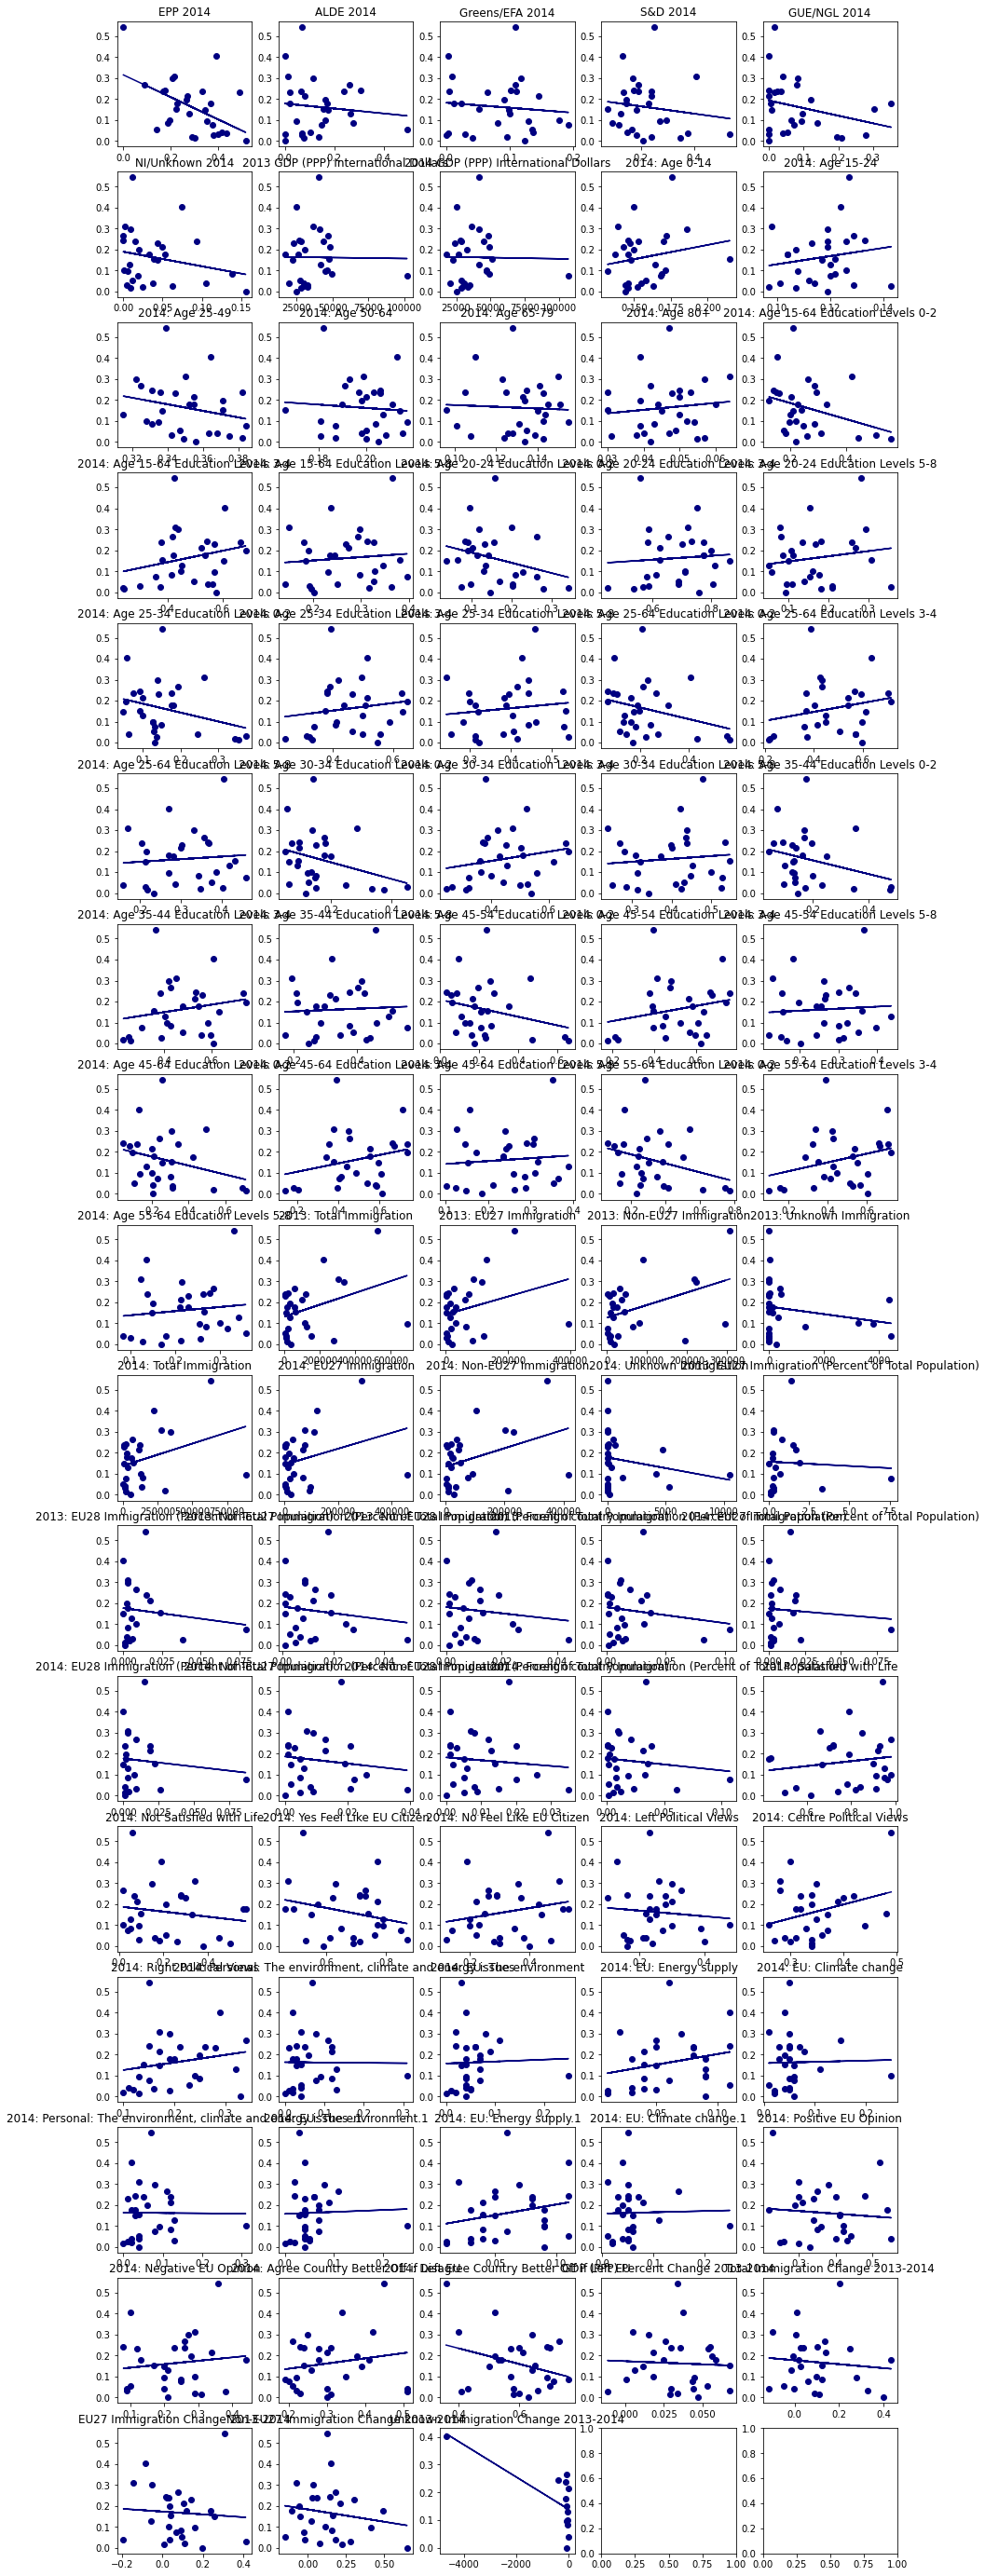

In [1692]:
Data2014Plots = Data2014.copy()

fig, axs = plt.subplots(17, 5, figsize=(15, 50))

x = 0
y = 0

for col in Data2014Plots.columns:
    if col == 'ECR/EFDD 2014' or col == 'COUNTRY:' or col == 'CODE:':
        continue
    axs[x,y].scatter(Data2014Plots[col],Data2014Plots['ECR/EFDD 2014'],color='navy')
    if Data2014Plots[col].isnull().values.any():
        TempData2014Plots = Data2014Plots[['ECR/EFDD 2014', col]]
        TempData2014Plots = TempData2014Plots.dropna()
        a, b = np.polyfit(TempData2014Plots[col], TempData2014Plots['ECR/EFDD 2014'], 1)
        axs[x,y].plot(TempData2014Plots[col], a*TempData2014Plots[col]+b,color='navy')  
    else:
        a, b = np.polyfit(Data2014Plots[col], Data2014Plots['ECR/EFDD 2014'], 1)
        axs[x,y].plot(Data2014Plots[col], a*Data2014Plots[col]+b,color='navy')  
    
    
    y+=1
    if y > 4:
        y = 0
        x+=1

**EPP**

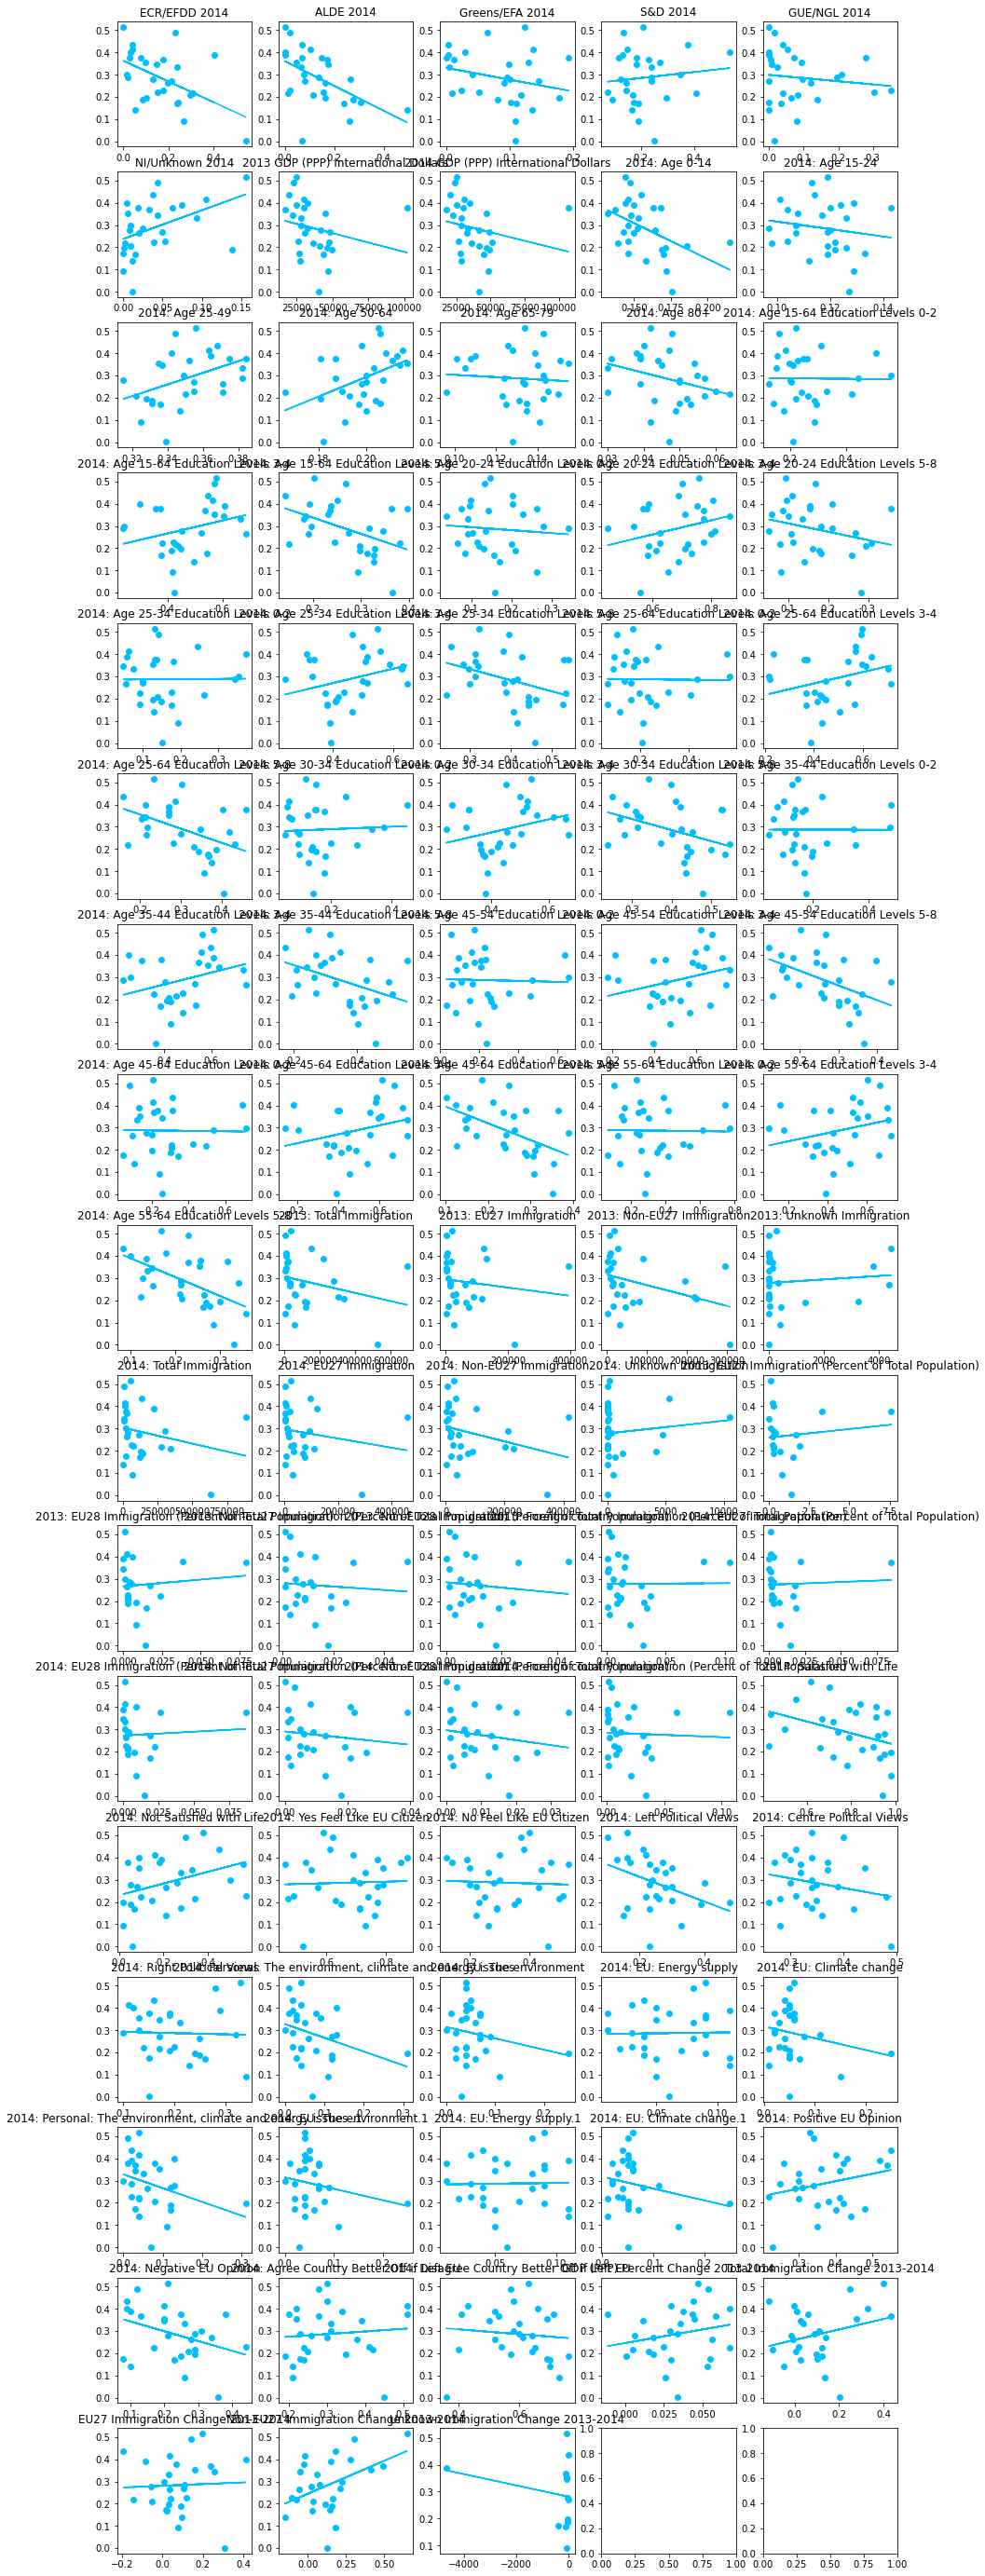

In [1693]:
Data2014Plots = Data2014.copy()

fig, axs = plt.subplots(17, 5, figsize=(15, 50))

x = 0
y = 0

for col in Data2014Plots.columns:
    if col == 'EPP 2014' or col == 'COUNTRY:' or col == 'CODE:':
        continue
    axs[x,y].scatter(Data2014Plots[col],Data2014Plots['EPP 2014'],color='deepskyblue')
    if Data2014Plots[col].isnull().values.any():
        TempData2014Plots = Data2014Plots[['EPP 2014', col]]
        TempData2014Plots = TempData2014Plots.dropna()
        a, b = np.polyfit(TempData2014Plots[col], TempData2014Plots['EPP 2014'], 1)
        axs[x,y].plot(TempData2014Plots[col], a*TempData2014Plots[col]+b,color='deepskyblue')  
    else:
        a, b = np.polyfit(Data2014Plots[col], Data2014Plots['EPP 2014'], 1)
        axs[x,y].plot(Data2014Plots[col], a*Data2014Plots[col]+b,color='deepskyblue')  
    
    axs[x, y].set_title(col)
    y+=1
    if y > 4:
        y = 0
        x+=1

**ALDE**

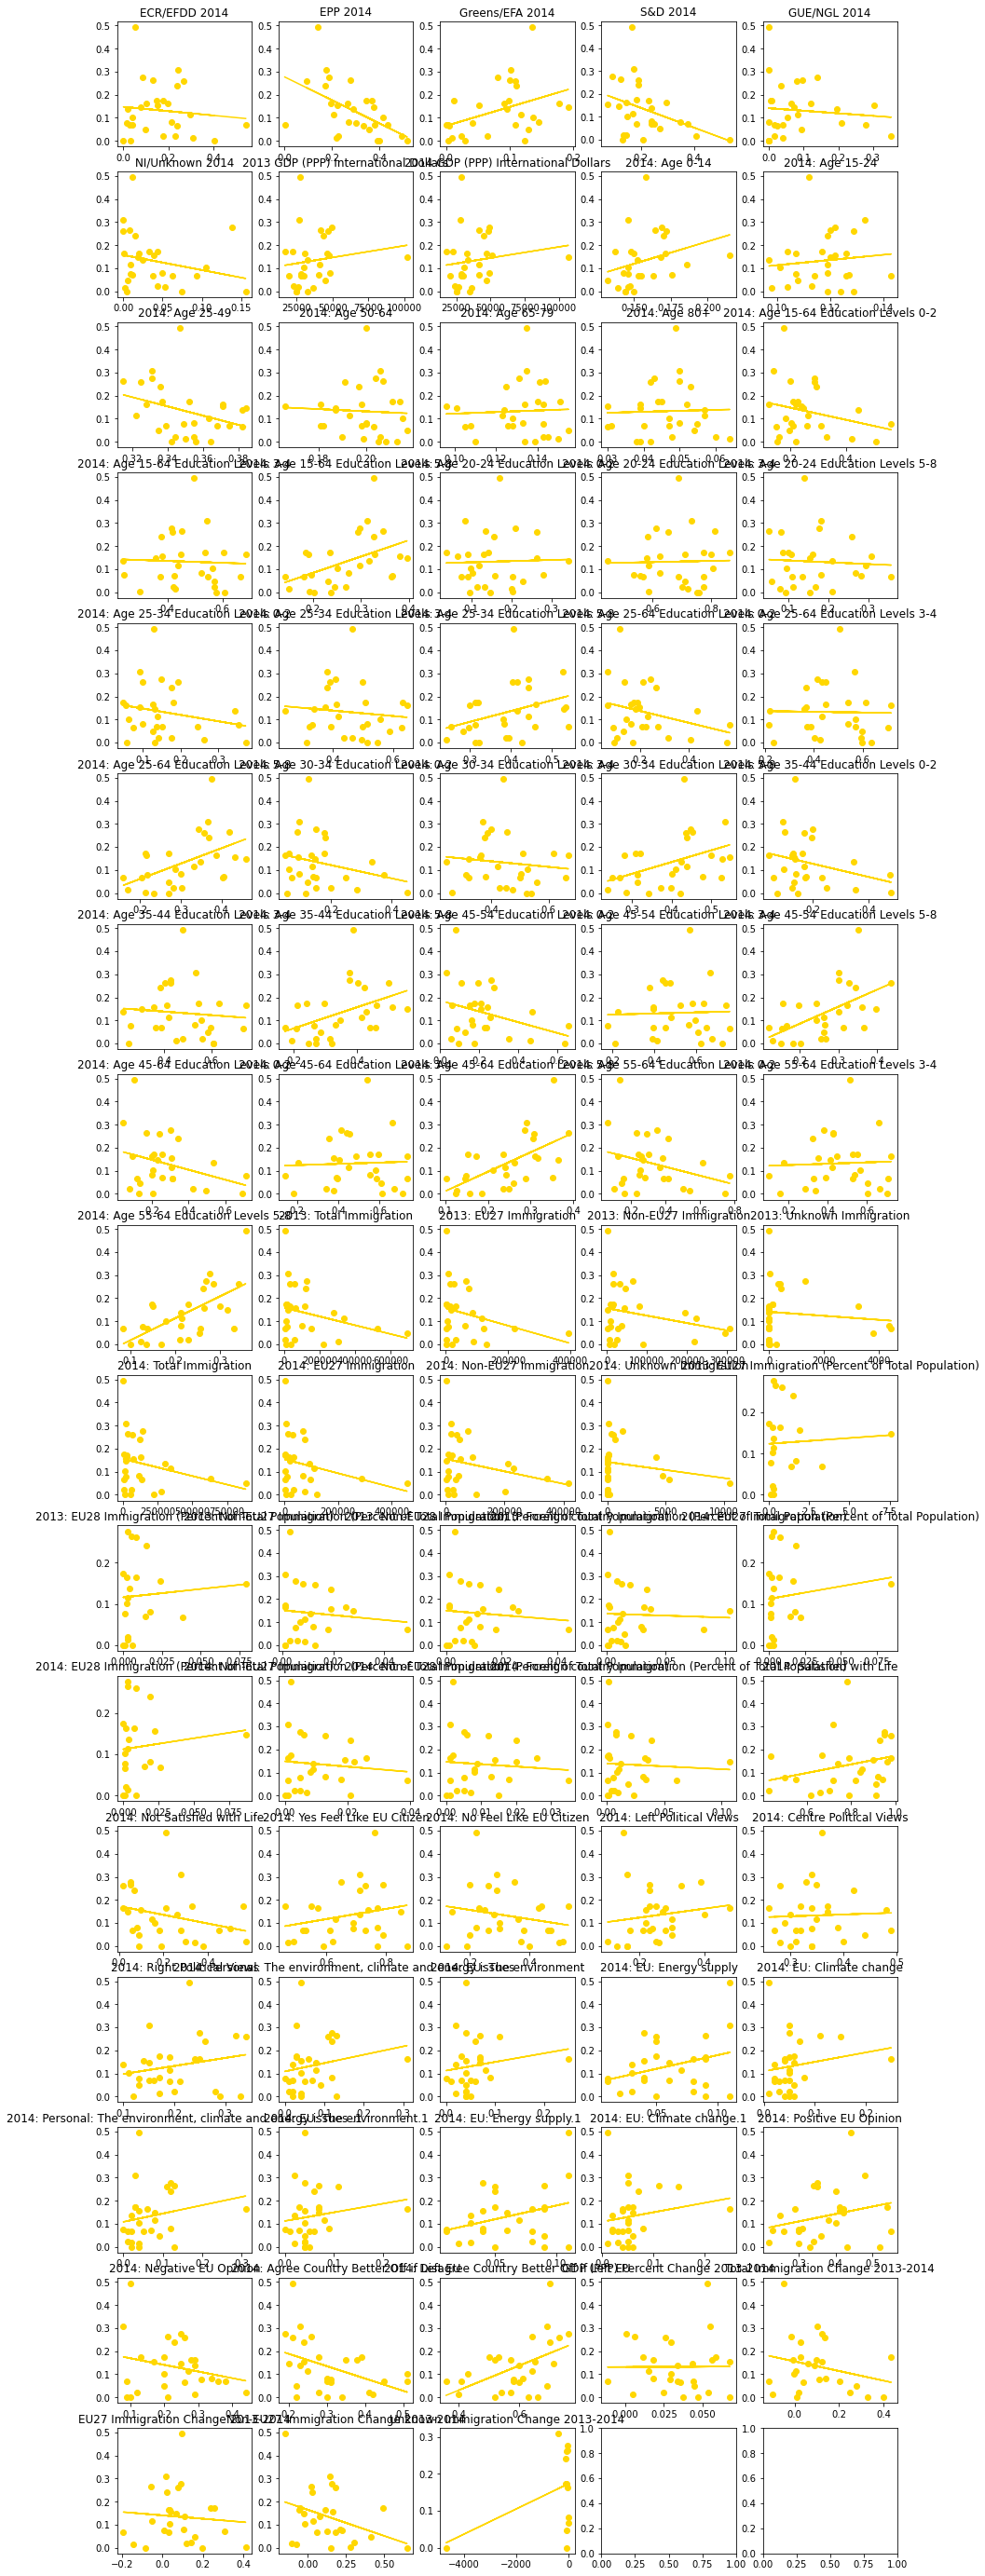

In [1694]:
Data2014Plots = Data2014.copy()

fig, axs = plt.subplots(17, 5, figsize=(15, 50))

x = 0
y = 0

for col in Data2014Plots.columns:
    if col == 'ALDE 2014' or col == 'COUNTRY:' or col == 'CODE:':
        continue
    axs[x,y].scatter(Data2014Plots[col],Data2014Plots['ALDE 2014'],color='gold')
    if Data2014Plots[col].isnull().values.any():
        TempData2014Plots = Data2014Plots[['ALDE 2014', col]]
        TempData2014Plots = TempData2014Plots.dropna()
        a, b = np.polyfit(TempData2014Plots[col], TempData2014Plots['ALDE 2014'], 1)
        axs[x,y].plot(TempData2014Plots[col], a*TempData2014Plots[col]+b,color='gold')  
    else:
        a, b = np.polyfit(Data2014Plots[col], Data2014Plots['ALDE 2014'], 1)
        axs[x,y].plot(Data2014Plots[col], a*Data2014Plots[col]+b,color='gold')  
    
    axs[x, y].set_title(col)
    y+=1
    if y > 4:
        y = 0
        x+=1

**Greens/EFA**

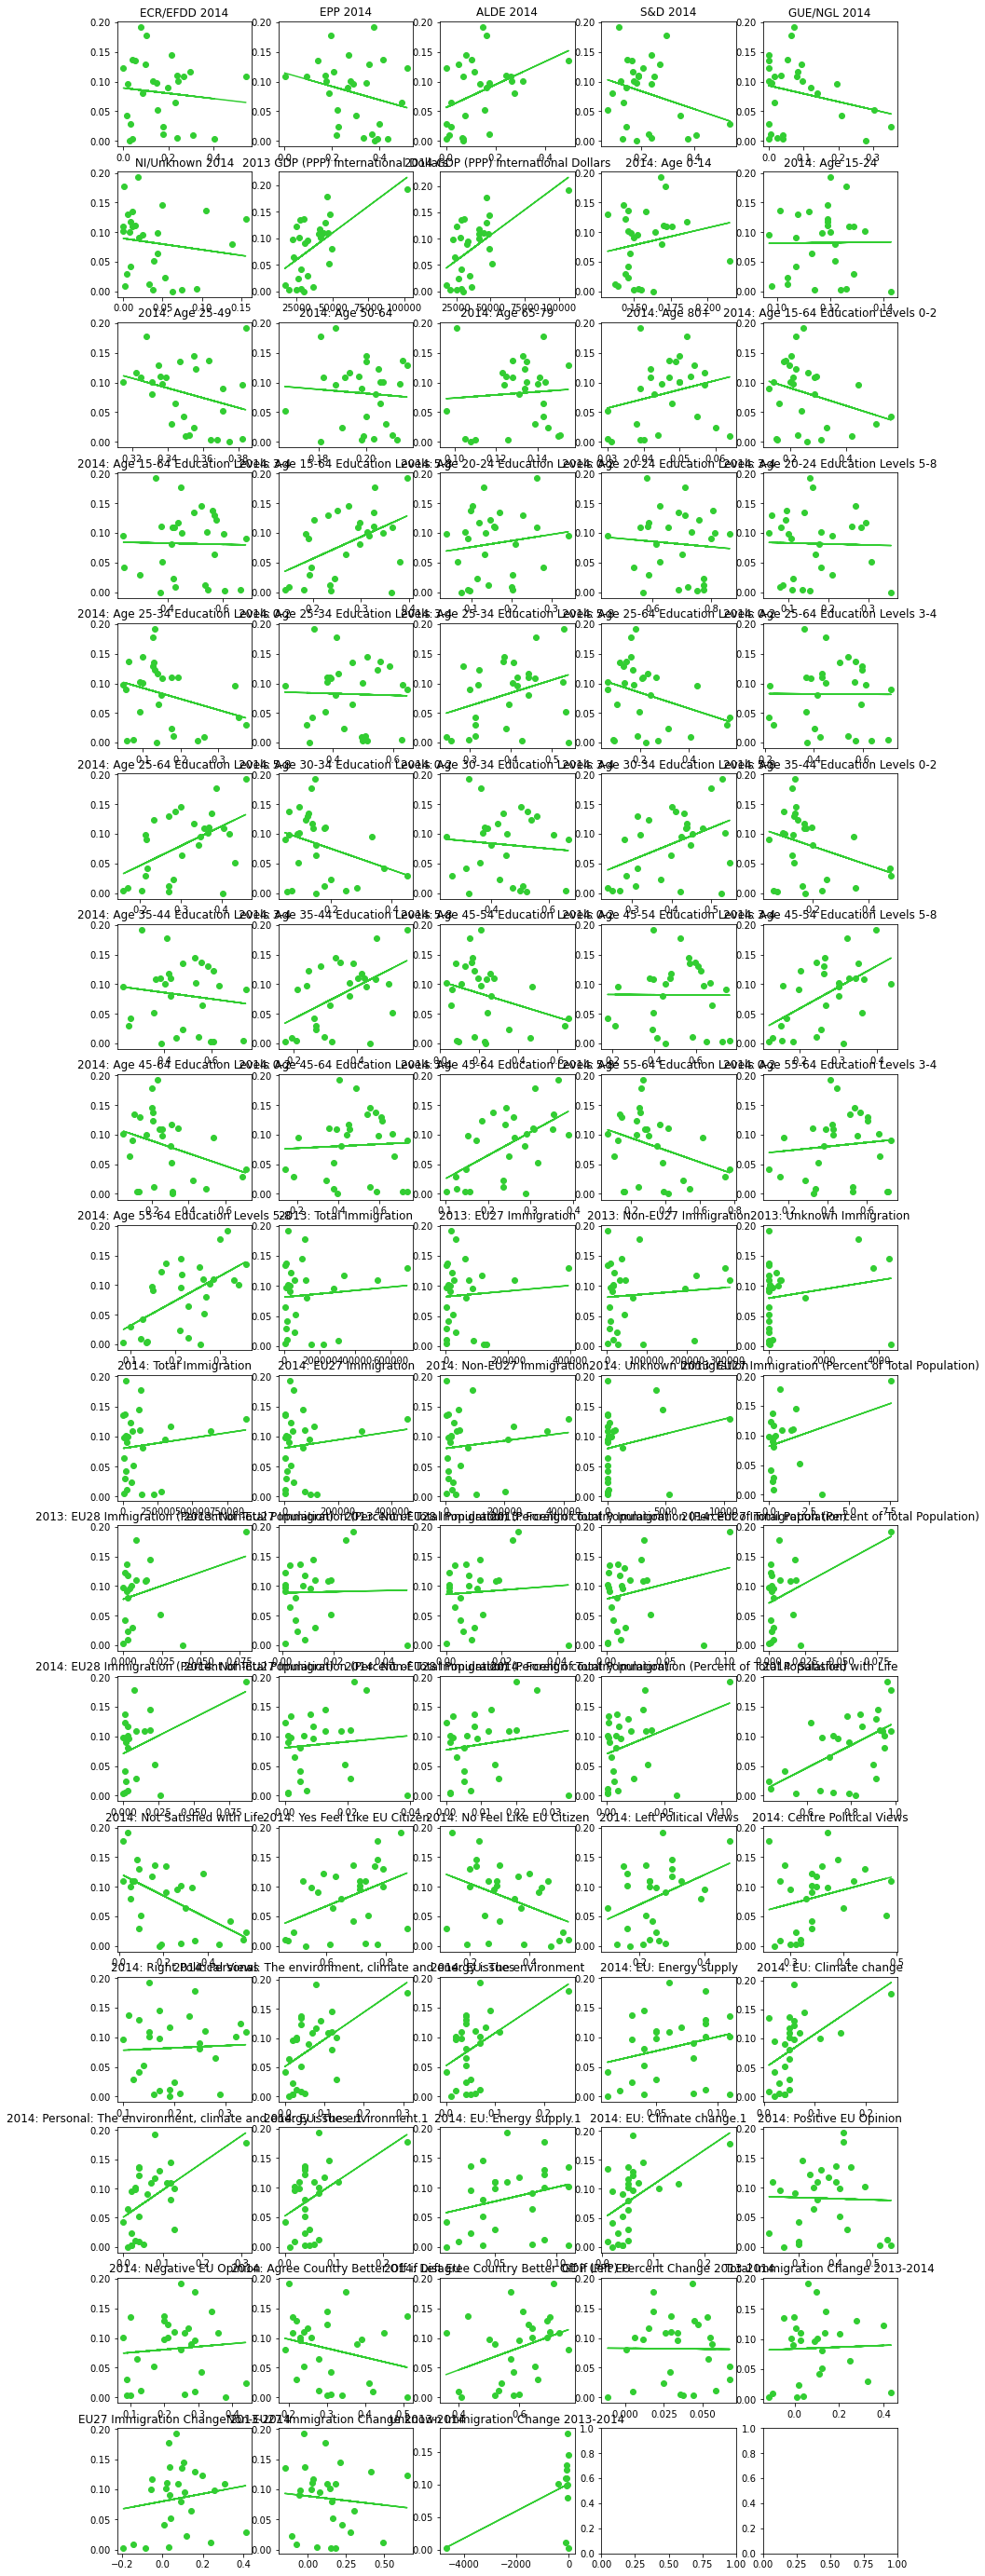

In [1695]:
Data2014Plots = Data2014.copy()

fig, axs = plt.subplots(17, 5, figsize=(15, 50))

x = 0
y = 0

for col in Data2014Plots.columns:
    if col == 'Greens/EFA 2014' or col == 'COUNTRY:' or col == 'CODE:':
        continue
    axs[x,y].scatter(Data2014Plots[col],Data2014Plots['Greens/EFA 2014'],color='limegreen')
    if Data2014Plots[col].isnull().values.any():
        TempData2014Plots = Data2014Plots[['Greens/EFA 2014', col]]
        TempData2014Plots = TempData2014Plots.dropna()
        a, b = np.polyfit(TempData2014Plots[col], TempData2014Plots['Greens/EFA 2014'], 1)
        axs[x,y].plot(TempData2014Plots[col], a*TempData2014Plots[col]+b,color='limegreen')  
    else:
        a, b = np.polyfit(Data2014Plots[col], Data2014Plots['Greens/EFA 2014'], 1)
        axs[x,y].plot(Data2014Plots[col], a*Data2014Plots[col]+b,color='limegreen')  
    
    axs[x, y].set_title(col)
    y+=1
    if y > 4:
        y = 0
        x+=1

**S&D**

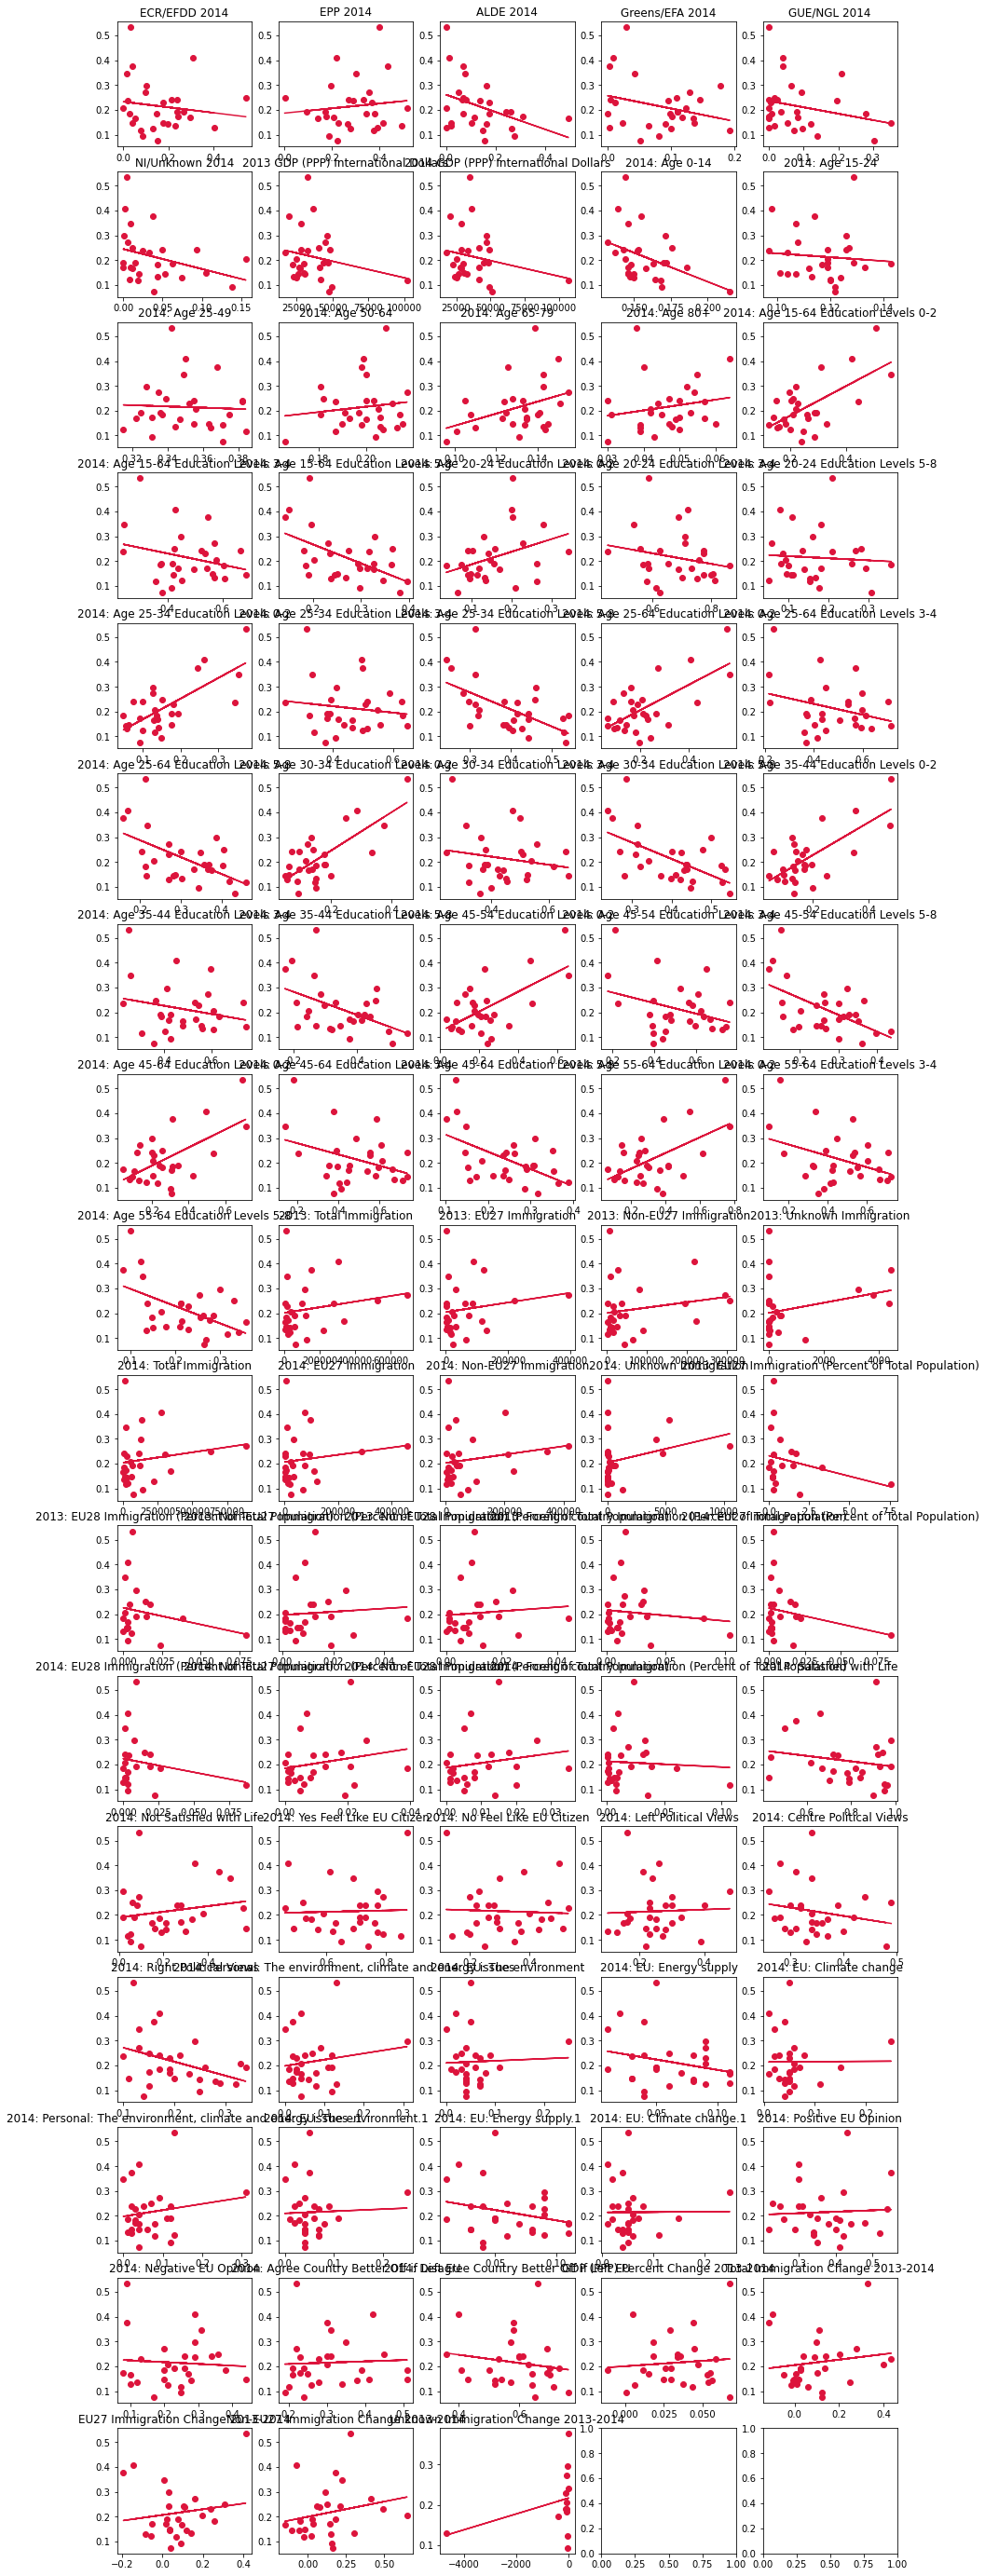

In [1696]:
Data2014Plots = Data2014.copy()

fig, axs = plt.subplots(17, 5, figsize=(15, 50))

x = 0
y = 0

for col in Data2014Plots.columns:
    if col == 'S&D 2014' or col == 'COUNTRY:' or col == 'CODE:':
        continue
    axs[x,y].scatter(Data2014Plots[col],Data2014Plots['S&D 2014'],color='crimson')
    if Data2014Plots[col].isnull().values.any():
        TempData2014Plots = Data2014Plots[['S&D 2014', col]]
        TempData2014Plots = TempData2014Plots.dropna()
        a, b = np.polyfit(TempData2014Plots[col], TempData2014Plots['S&D 2014'], 1)
        axs[x,y].plot(TempData2014Plots[col], a*TempData2014Plots[col]+b,color='crimson')  
    else:
        a, b = np.polyfit(Data2014Plots[col], Data2014Plots['S&D 2014'], 1)
        axs[x,y].plot(Data2014Plots[col], a*Data2014Plots[col]+b,color='crimson')  
    
    axs[x, y].set_title(col)
    y+=1
    if y > 4:
        y = 0
        x+=1

**GUE/NGL**

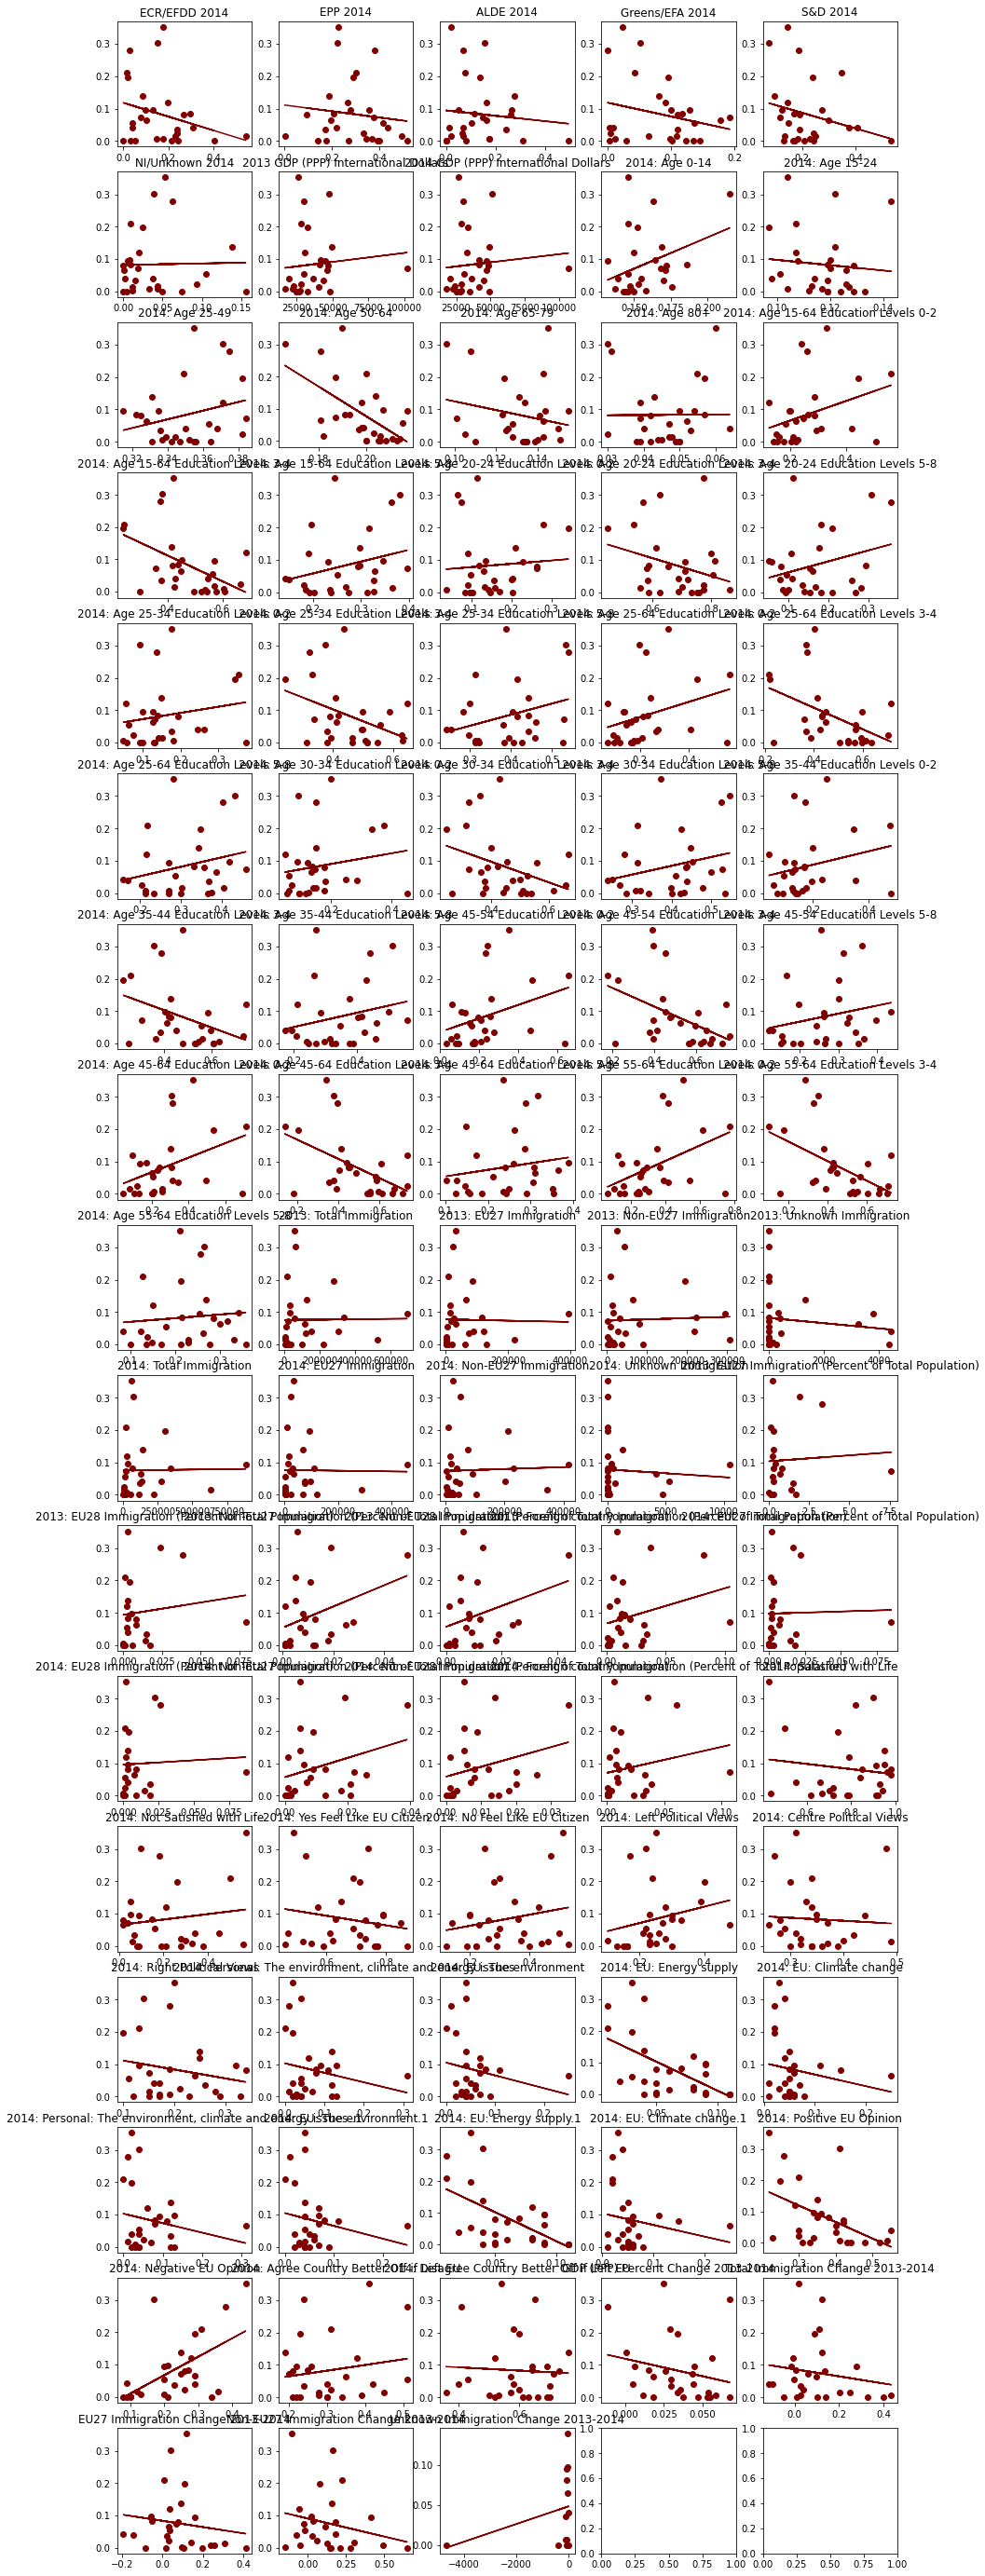

In [1697]:
Data2014Plots = Data2014.copy()

fig, axs = plt.subplots(17, 5, figsize=(15, 50))

x = 0
y = 0

for col in Data2014Plots.columns:
    if col == 'GUE/NGL 2014' or col == 'COUNTRY:' or col == 'CODE:':
        continue
    axs[x,y].scatter(Data2014Plots[col],Data2014Plots['GUE/NGL 2014'],color='maroon')
    if Data2014Plots[col].isnull().values.any():
        TempData2014Plots = Data2014Plots[['GUE/NGL 2014', col]]
        TempData2014Plots = TempData2014Plots.dropna()
        a, b = np.polyfit(TempData2014Plots[col], TempData2014Plots['GUE/NGL 2014'], 1)
        axs[x,y].plot(TempData2014Plots[col], a*TempData2014Plots[col]+b,color='maroon')  
    else:
        a, b = np.polyfit(Data2014Plots[col], Data2014Plots['GUE/NGL 2014'], 1)
        axs[x,y].plot(Data2014Plots[col], a*Data2014Plots[col]+b,color='maroon')  
    
    axs[x, y].set_title(col)
    y+=1
    if y > 4:
        y = 0
        x+=1

**All at Once**

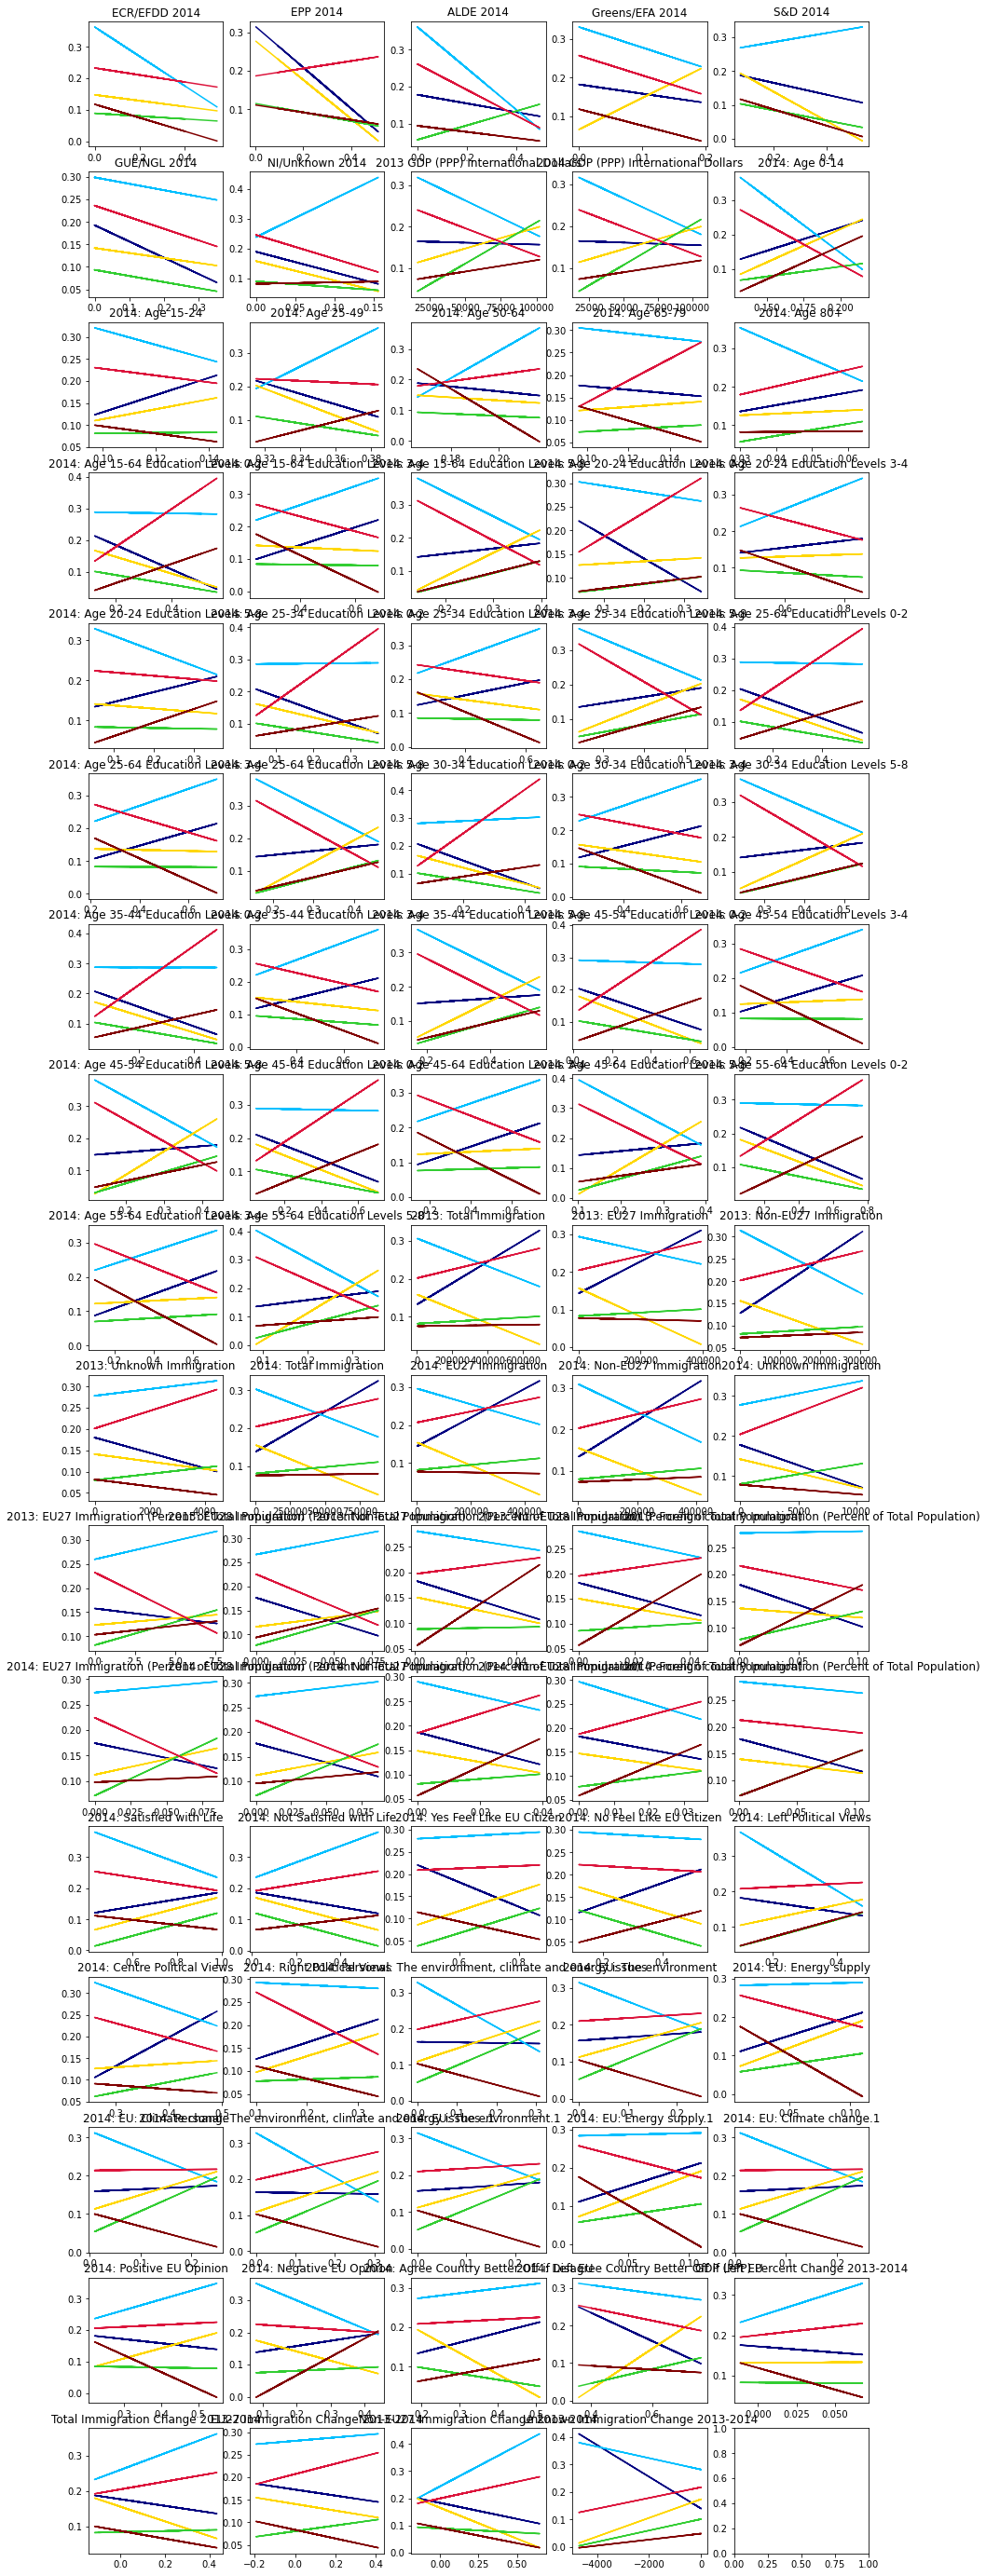

In [1698]:
Data2014Plots = Data2014.copy()

fig, axs = plt.subplots(17, 5, figsize=(15, 50))

x = 0
y = 0

for col in Data2014Plots.columns:
    if col == 'COUNTRY:' or col == 'CODE:':
        continue
    if col != 'ECR/EFDD 2014':
        if Data2014Plots[col].isnull().values.any():
            TempData2014Plots = Data2014Plots[['ECR/EFDD 2014', col]]
            TempData2014Plots = TempData2014Plots.dropna()
            a, b = np.polyfit(TempData2014Plots[col], TempData2014Plots['ECR/EFDD 2014'], 1)
            axs[x,y].plot(TempData2014Plots[col], a*TempData2014Plots[col]+b,color='navy')  
        else:
            a, b = np.polyfit(Data2014Plots[col], Data2014Plots['ECR/EFDD 2014'], 1)
            axs[x,y].plot(Data2014Plots[col], a*Data2014Plots[col]+b,color='navy') 
    if col != 'EPP 2014':
        if Data2014Plots[col].isnull().values.any():
            TempData2014Plots = Data2014Plots[['EPP 2014', col]]
            TempData2014Plots = TempData2014Plots.dropna()
            a, b = np.polyfit(TempData2014Plots[col], TempData2014Plots['EPP 2014'], 1)
            axs[x,y].plot(TempData2014Plots[col], a*TempData2014Plots[col]+b,color='deepskyblue')  
        else:
            a, b = np.polyfit(Data2014Plots[col], Data2014Plots['EPP 2014'], 1)
            axs[x,y].plot(Data2014Plots[col], a*Data2014Plots[col]+b,color='deepskyblue') 
    if col != 'ALDE 2014':
        if Data2014Plots[col].isnull().values.any():
            TempData2014Plots = Data2014Plots[['ALDE 2014', col]]
            TempData2014Plots = TempData2014Plots.dropna()
            a, b = np.polyfit(TempData2014Plots[col], TempData2014Plots['ALDE 2014'], 1)
            axs[x,y].plot(TempData2014Plots[col], a*TempData2014Plots[col]+b,color='gold')  
        else:
            a, b = np.polyfit(Data2014Plots[col], Data2014Plots['ALDE 2014'], 1)
            axs[x,y].plot(Data2014Plots[col], a*Data2014Plots[col]+b,color='gold') 
    if col != 'Greens/EFA 2014':
        if Data2014Plots[col].isnull().values.any():
            TempData2014Plots = Data2014Plots[['Greens/EFA 2014', col]]
            TempData2014Plots = TempData2014Plots.dropna()
            a, b = np.polyfit(TempData2014Plots[col], TempData2014Plots['Greens/EFA 2014'], 1)
            axs[x,y].plot(TempData2014Plots[col], a*TempData2014Plots[col]+b,color='limegreen')  
        else:
            a, b = np.polyfit(Data2014Plots[col], Data2014Plots['Greens/EFA 2014'], 1)
            axs[x,y].plot(Data2014Plots[col], a*Data2014Plots[col]+b,color='limegreen') 
    if col != 'S&D 2014':
        if Data2014Plots[col].isnull().values.any():
            TempData2014Plots = Data2014Plots[['S&D 2014', col]]
            TempData2014Plots = TempData2014Plots.dropna()
            a, b = np.polyfit(TempData2014Plots[col], TempData2014Plots['S&D 2014'], 1)
            axs[x,y].plot(TempData2014Plots[col], a*TempData2014Plots[col]+b,color='crimson')  
        else:
            a, b = np.polyfit(Data2014Plots[col], Data2014Plots['S&D 2014'], 1)
            axs[x,y].plot(Data2014Plots[col], a*Data2014Plots[col]+b,color='crimson') 
    if col != 'GUE/NGL 2014':
        if Data2014Plots[col].isnull().values.any():
            TempData2014Plots = Data2014Plots[['GUE/NGL 2014', col]]
            TempData2014Plots = TempData2014Plots.dropna()
            a, b = np.polyfit(TempData2014Plots[col], TempData2014Plots['GUE/NGL 2014'], 1)
            axs[x,y].plot(TempData2014Plots[col], a*TempData2014Plots[col]+b,color='maroon')  
        else:
            a, b = np.polyfit(Data2014Plots[col], Data2014Plots['GUE/NGL 2014'], 1)
            axs[x,y].plot(Data2014Plots[col], a*Data2014Plots[col]+b,color='maroon') 
    
    axs[x, y].set_title(col)
    y+=1
    if y > 4:
        y = 0
        x+=1

## 2019

**ECR/ID**

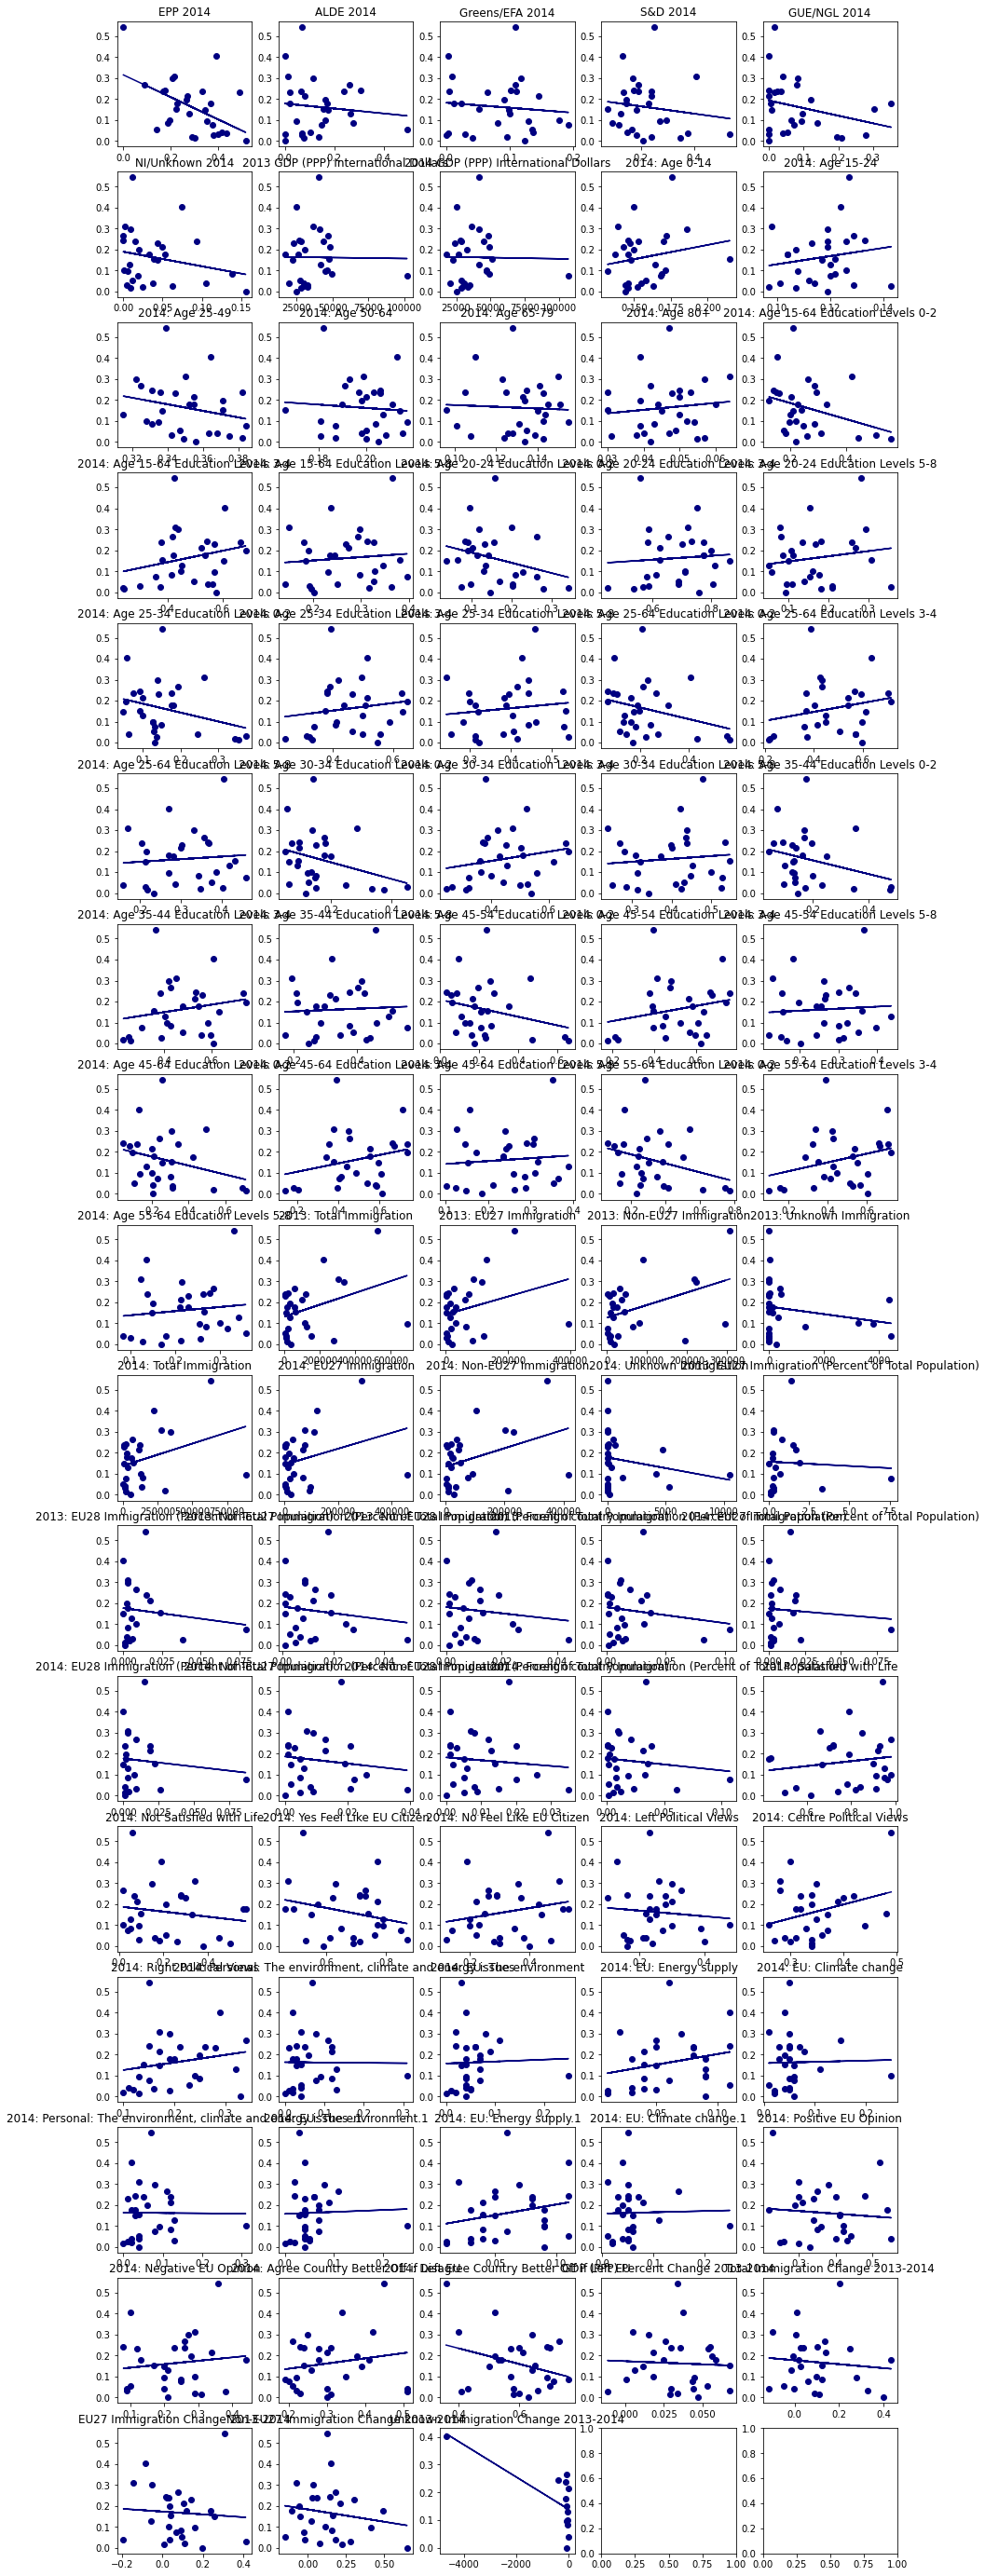

In [1692]:
Data2019Plots = Data2019.copy()

fig, axs = plt.subplots(17, 5, figsize=(15, 50))

x = 0
y = 0

for col in Data2019Plots.columns:
    if col == 'ECR/ID 2019' or col == 'COUNTRY:' or col == 'CODE:':
        continue
    axs[x,y].scatter(Data2019Plots[col],Data2019Plots['ECR/ID 2019'],color='navy')
    if Data2019Plots[col].isnull().values.any():
        TempData2019Plots = Data2019Plots[['ECR/ID 2019', col]]
        TempData2019Plots = TempData2019Plots.dropna()
        a, b = np.polyfit(TempData2019Plots[col], TempData2019Plots['ECR/ID 2019'], 1)
        axs[x,y].plot(TempData2019Plots[col], a*TempData2019Plots[col]+b,color='navy')  
    else:
        a, b = np.polyfit(Data2019Plots[col], Data2019Plots['ECR/ID 2019'], 1)
        axs[x,y].plot(Data2019Plots[col], a*Data2019Plots[col]+b,color='navy')  
    
    axs[x, y].set_title(col)
    y+=1
    if y > 4:
        y = 0
        x+=1

**EPP**

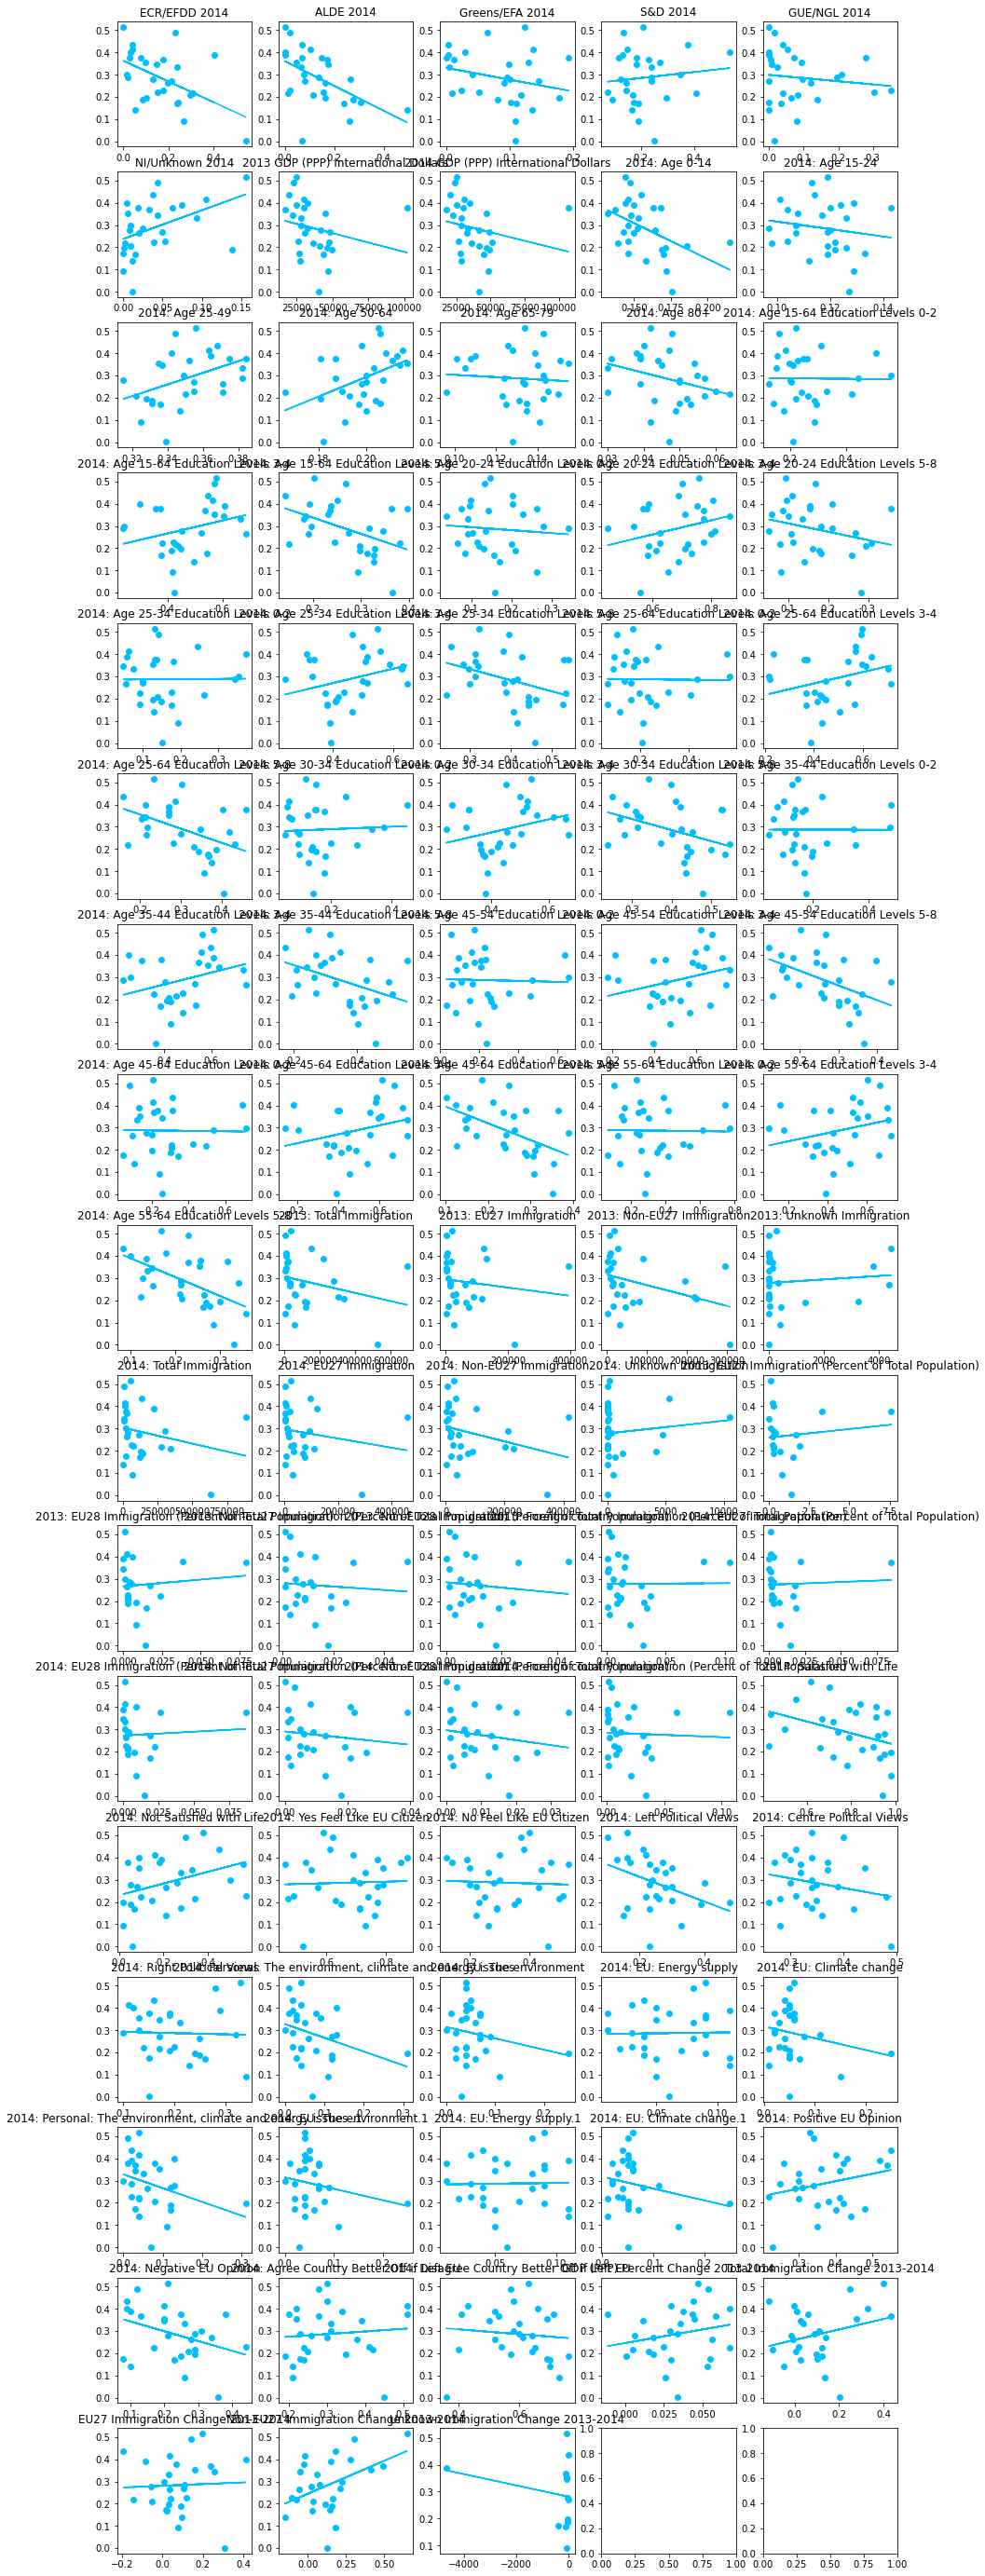

In [1693]:
Data2019Plots = Data2019.copy()

fig, axs = plt.subplots(17, 5, figsize=(15, 50))

x = 0
y = 0

for col in Data2019Plots.columns:
    if col == 'EPP 2019' or col == 'COUNTRY:' or col == 'CODE:':
        continue
    axs[x,y].scatter(Data2019Plots[col],Data2019Plots['EPP 2019'],color='deepskyblue')
    if Data2019Plots[col].isnull().values.any():
        TempData2019Plots = Data2019Plots[['EPP 2019', col]]
        TempData2019Plots = TempData2019Plots.dropna()
        a, b = np.polyfit(TempData2019Plots[col], TempData2019Plots['EPP 2019'], 1)
        axs[x,y].plot(TempData2019Plots[col], a*TempData2019Plots[col]+b,color='deepskyblue')  
    else:
        a, b = np.polyfit(Data2019Plots[col], Data2019Plots['EPP 2019'], 1)
        axs[x,y].plot(Data2019Plots[col], a*Data2019Plots[col]+b,color='deepskyblue')  
    
    axs[x, y].set_title(col)
    y+=1
    if y > 4:
        y = 0
        x+=1

**RE**

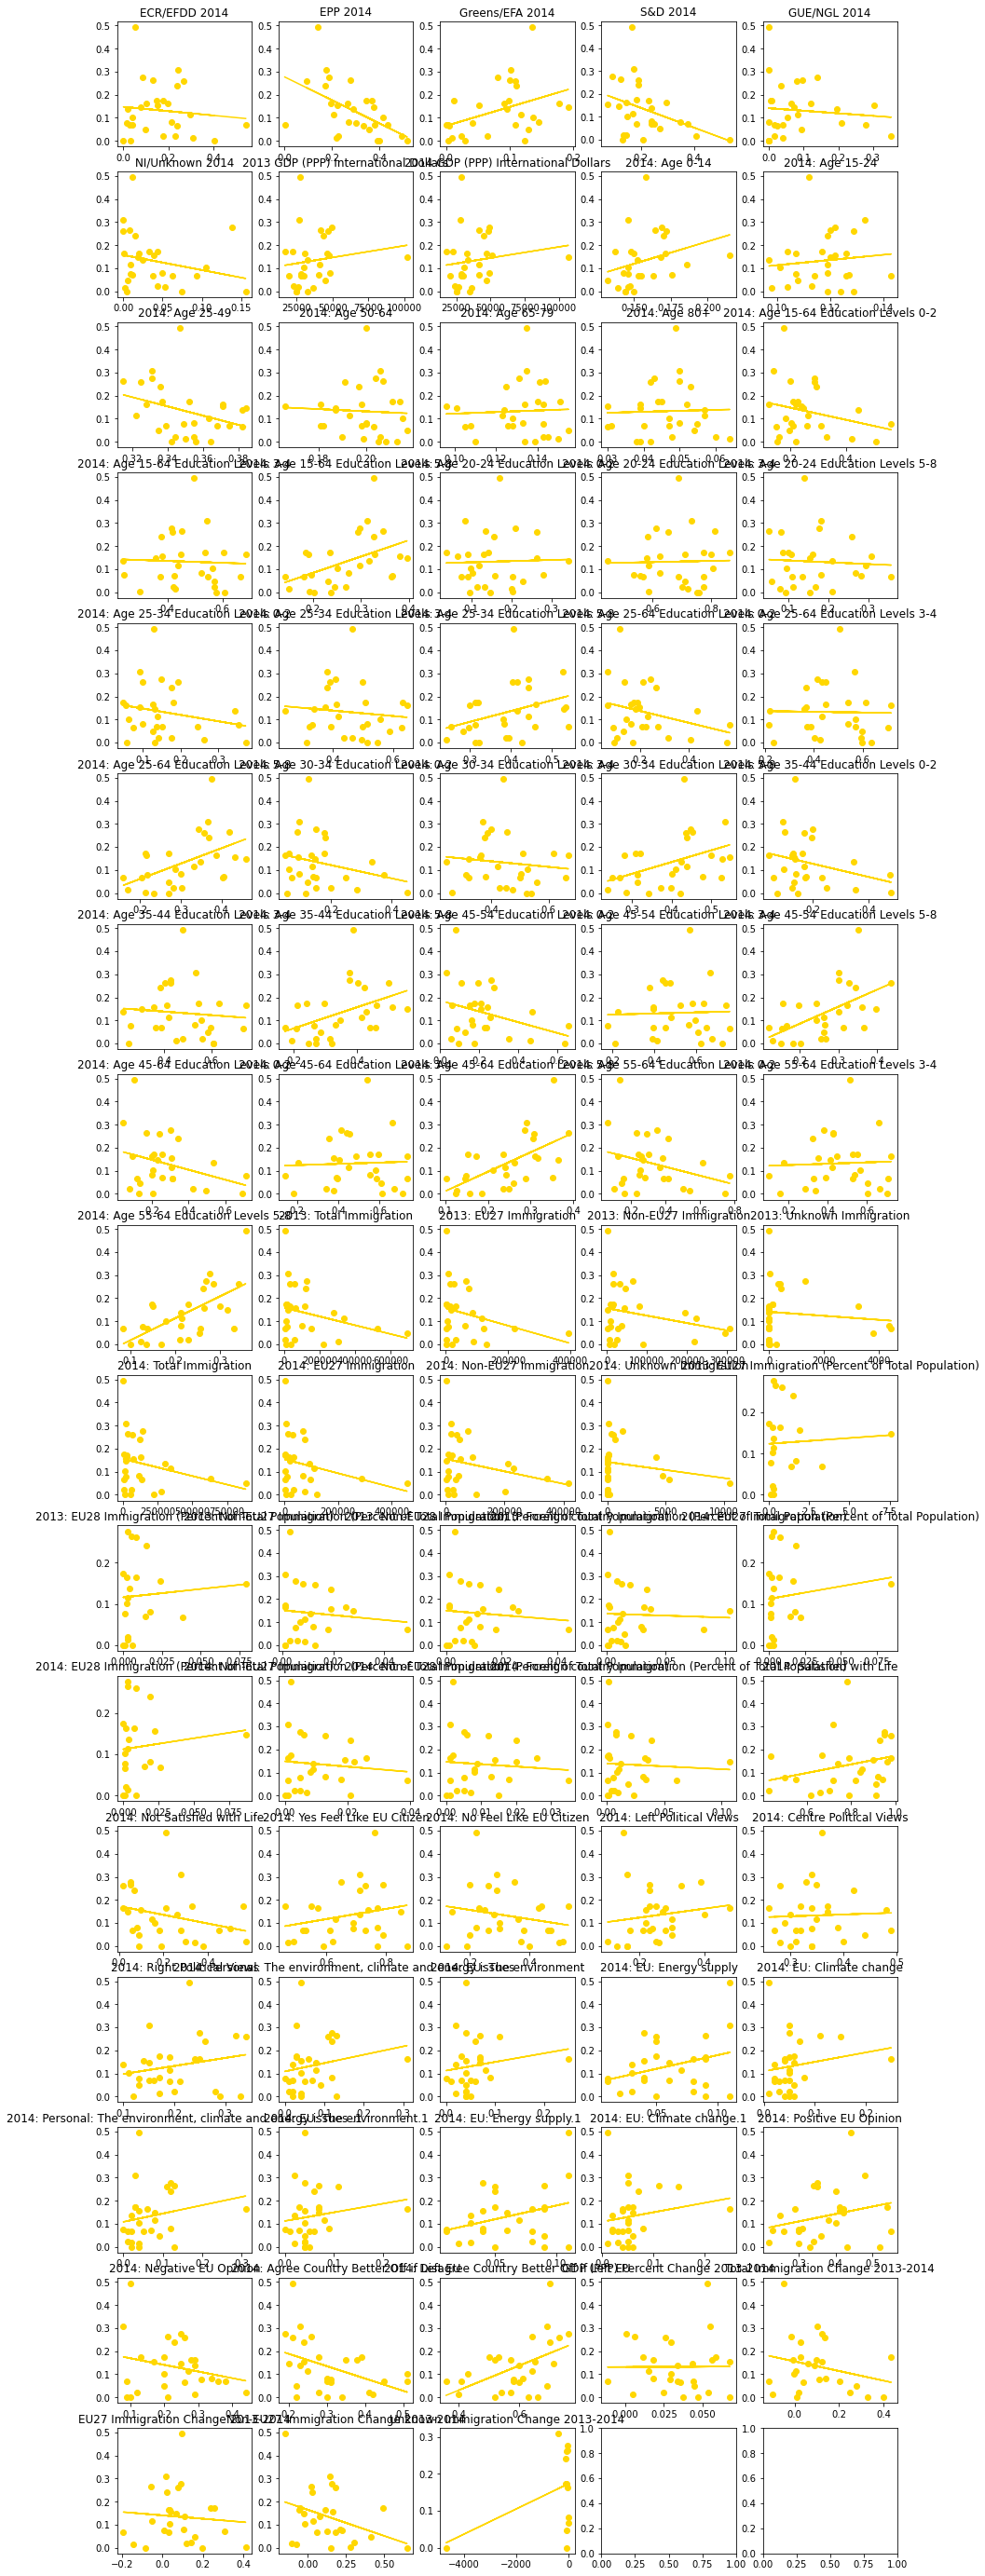

In [1694]:
Data2019Plots = Data2019.copy()

fig, axs = plt.subplots(17, 5, figsize=(15, 50))

x = 0
y = 0

for col in Data2019Plots.columns:
    if col == 'RE 2019' or col == 'COUNTRY:' or col == 'CODE:':
        continue
    axs[x,y].scatter(Data2019Plots[col],Data2019Plots['RE 2019'],color='gold')
    if Data2019Plots[col].isnull().values.any():
        TempData2019Plots = Data2019Plots[['RE 2019', col]]
        TempData2019Plots = TempData2019Plots.dropna()
        a, b = np.polyfit(TempData2019Plots[col], TempData2019Plots['RE 2019'], 1)
        axs[x,y].plot(TempData2019Plots[col], a*TempData2019Plots[col]+b,color='gold')  
    else:
        a, b = np.polyfit(Data2019Plots[col], Data2019Plots['RE 2019'], 1)
        axs[x,y].plot(Data2019Plots[col], a*Data2019Plots[col]+b,color='gold')  
    
    axs[x, y].set_title(col)
    y+=1
    if y > 4:
        y = 0
        x+=1

**Greens/EFA**

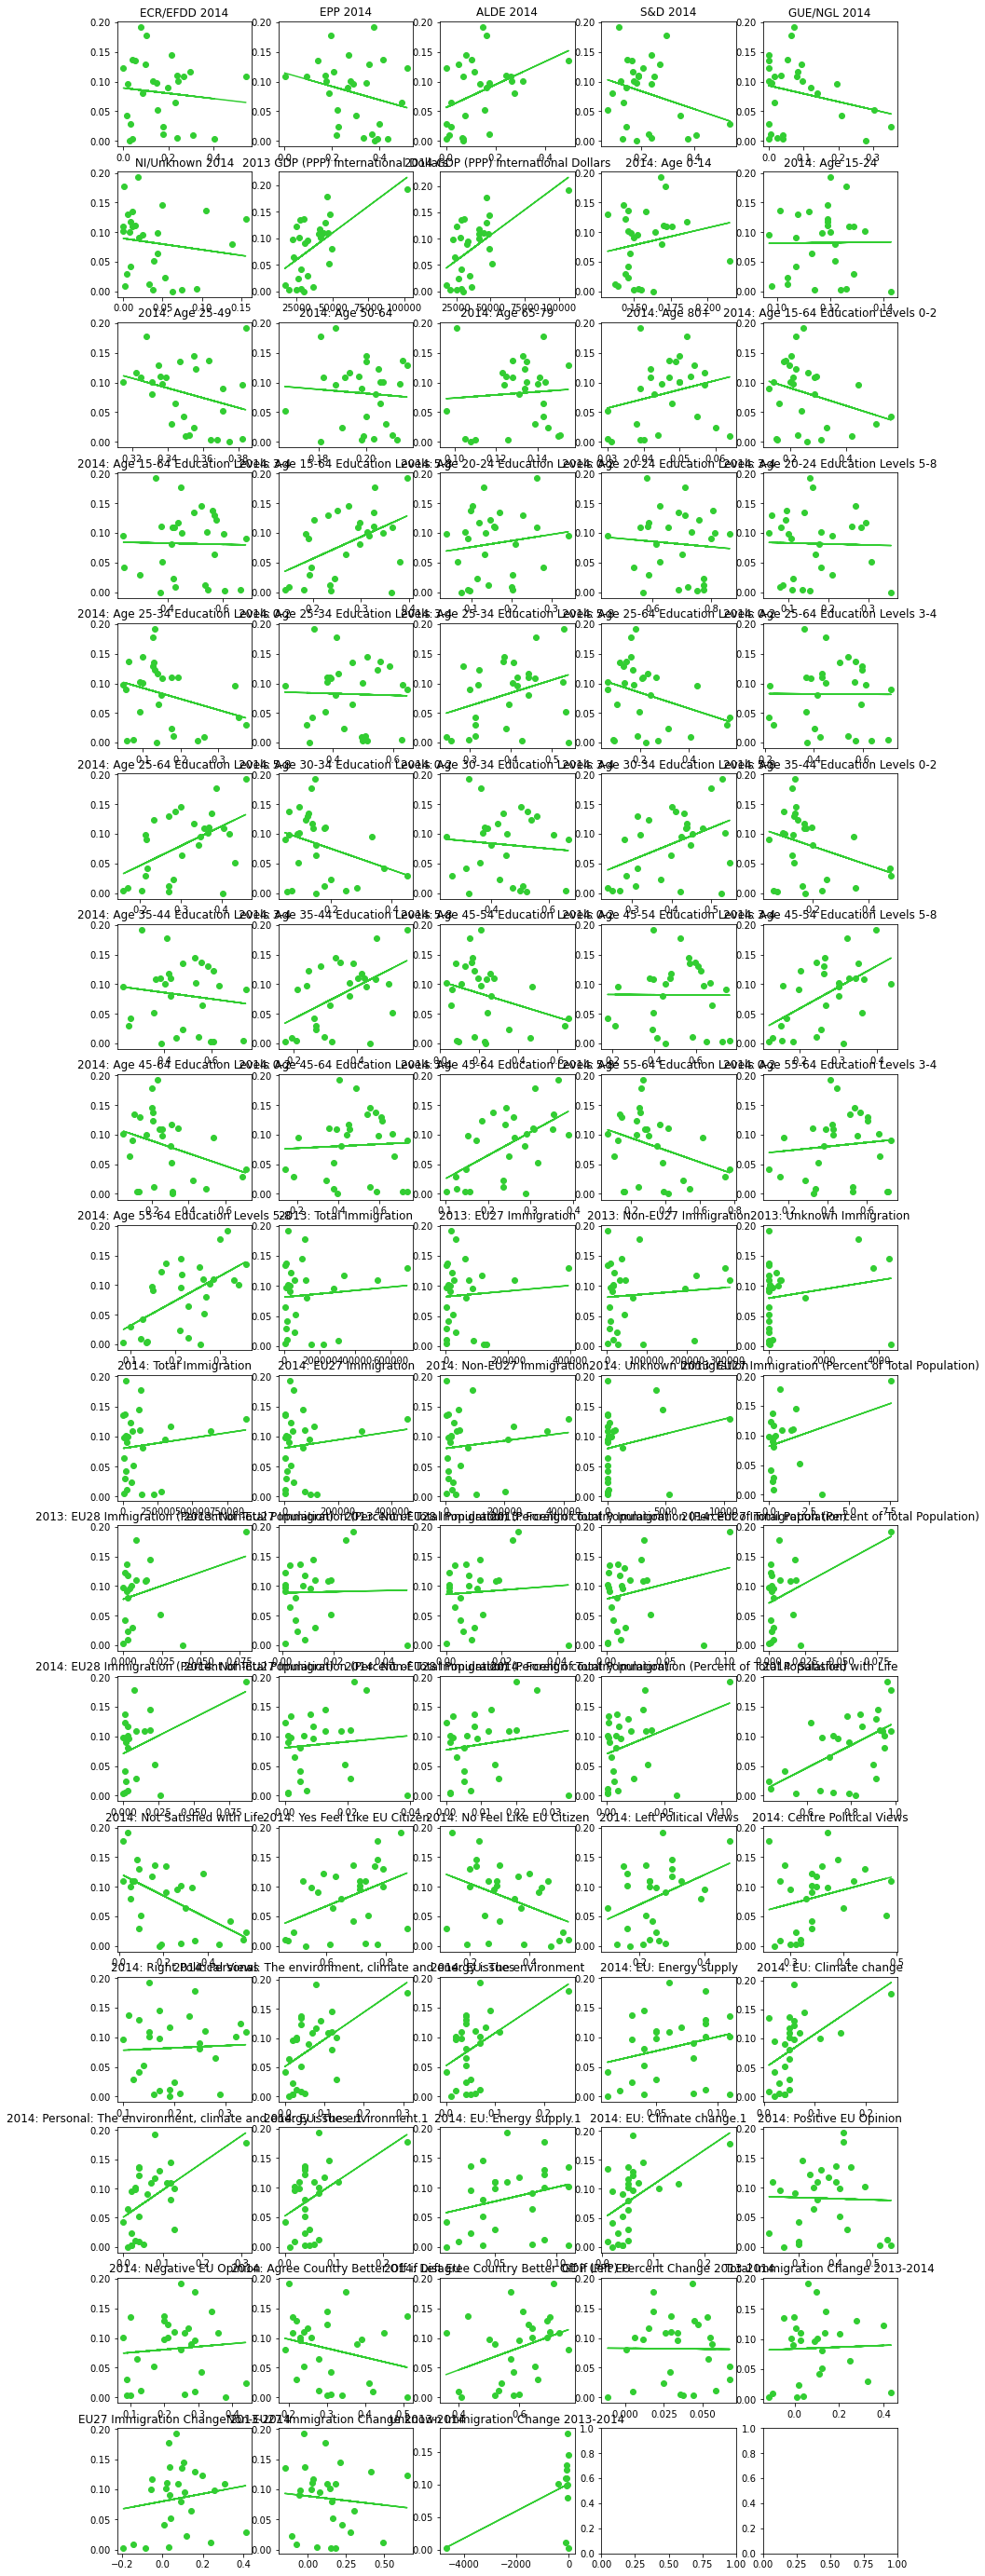

In [1695]:
Data2019Plots = Data2019.copy()

fig, axs = plt.subplots(17, 5, figsize=(15, 50))

x = 0
y = 0

for col in Data2019Plots.columns:
    if col == 'Greens/EFA 2019' or col == 'COUNTRY:' or col == 'CODE:':
        continue
    axs[x,y].scatter(Data2019Plots[col],Data2019Plots['Greens/EFA 2019'],color='limegreen')
    if Data2019Plots[col].isnull().values.any():
        TempData2019Plots = Data2019Plots[['Greens/EFA 2019', col]]
        TempData2019Plots = TempData2019Plots.dropna()
        a, b = np.polyfit(TempData2019Plots[col], TempData2019Plots['Greens/EFA 2019'], 1)
        axs[x,y].plot(TempData2019Plots[col], a*TempData2019Plots[col]+b,color='limegreen')  
    else:
        a, b = np.polyfit(Data2019Plots[col], Data2019Plots['Greens/EFA 2019'], 1)
        axs[x,y].plot(Data2019Plots[col], a*Data2019Plots[col]+b,color='limegreen')  
    
    axs[x, y].set_title(col)
    y+=1
    if y > 4:
        y = 0
        x+=1

**S&D**

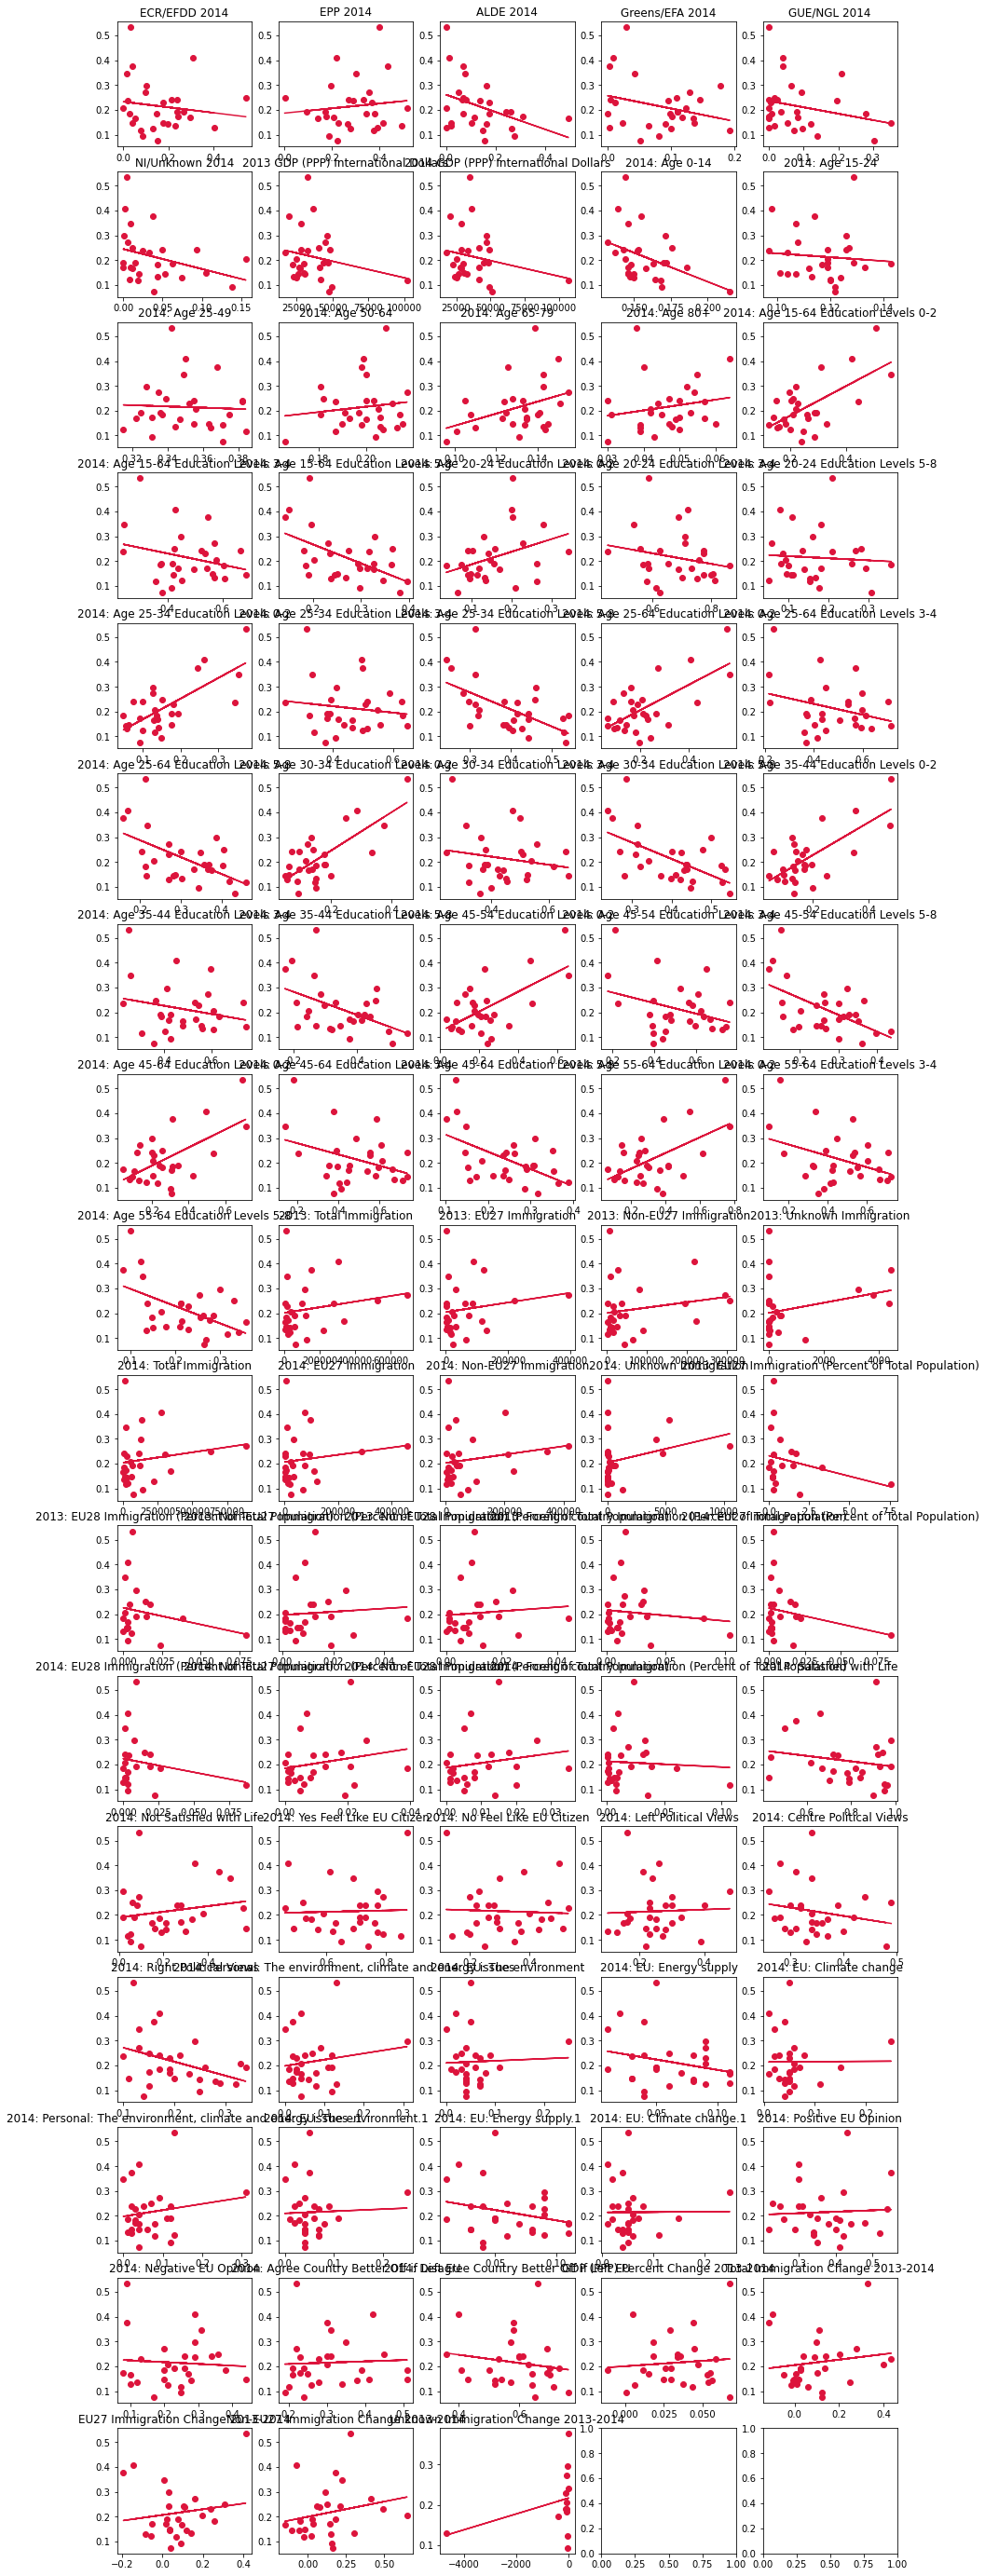

In [1696]:
Data2019Plots = Data2019.copy()

fig, axs = plt.subplots(17, 5, figsize=(15, 50))

x = 0
y = 0

for col in Data2019Plots.columns:
    if col == 'S&D 2019' or col == 'COUNTRY:' or col == 'CODE:':
        continue
    axs[x,y].scatter(Data2019Plots[col],Data2019Plots['S&D 2019'],color='crimson')
    if Data2019Plots[col].isnull().values.any():
        TempData2019Plots = Data2019Plots[['S&D 2019', col]]
        TempData2019Plots = TempData2019Plots.dropna()
        a, b = np.polyfit(TempData2019Plots[col], TempData2019Plots['S&D 2019'], 1)
        axs[x,y].plot(TempData2019Plots[col], a*TempData2019Plots[col]+b,color='crimson')  
    else:
        a, b = np.polyfit(Data2019Plots[col], Data2019Plots['S&D 2019'], 1)
        axs[x,y].plot(Data2019Plots[col], a*Data2019Plots[col]+b,color='crimson')  
    
    axs[x, y].set_title(col)
    y+=1
    if y > 4:
        y = 0
        x+=1

**GUE/NGL**

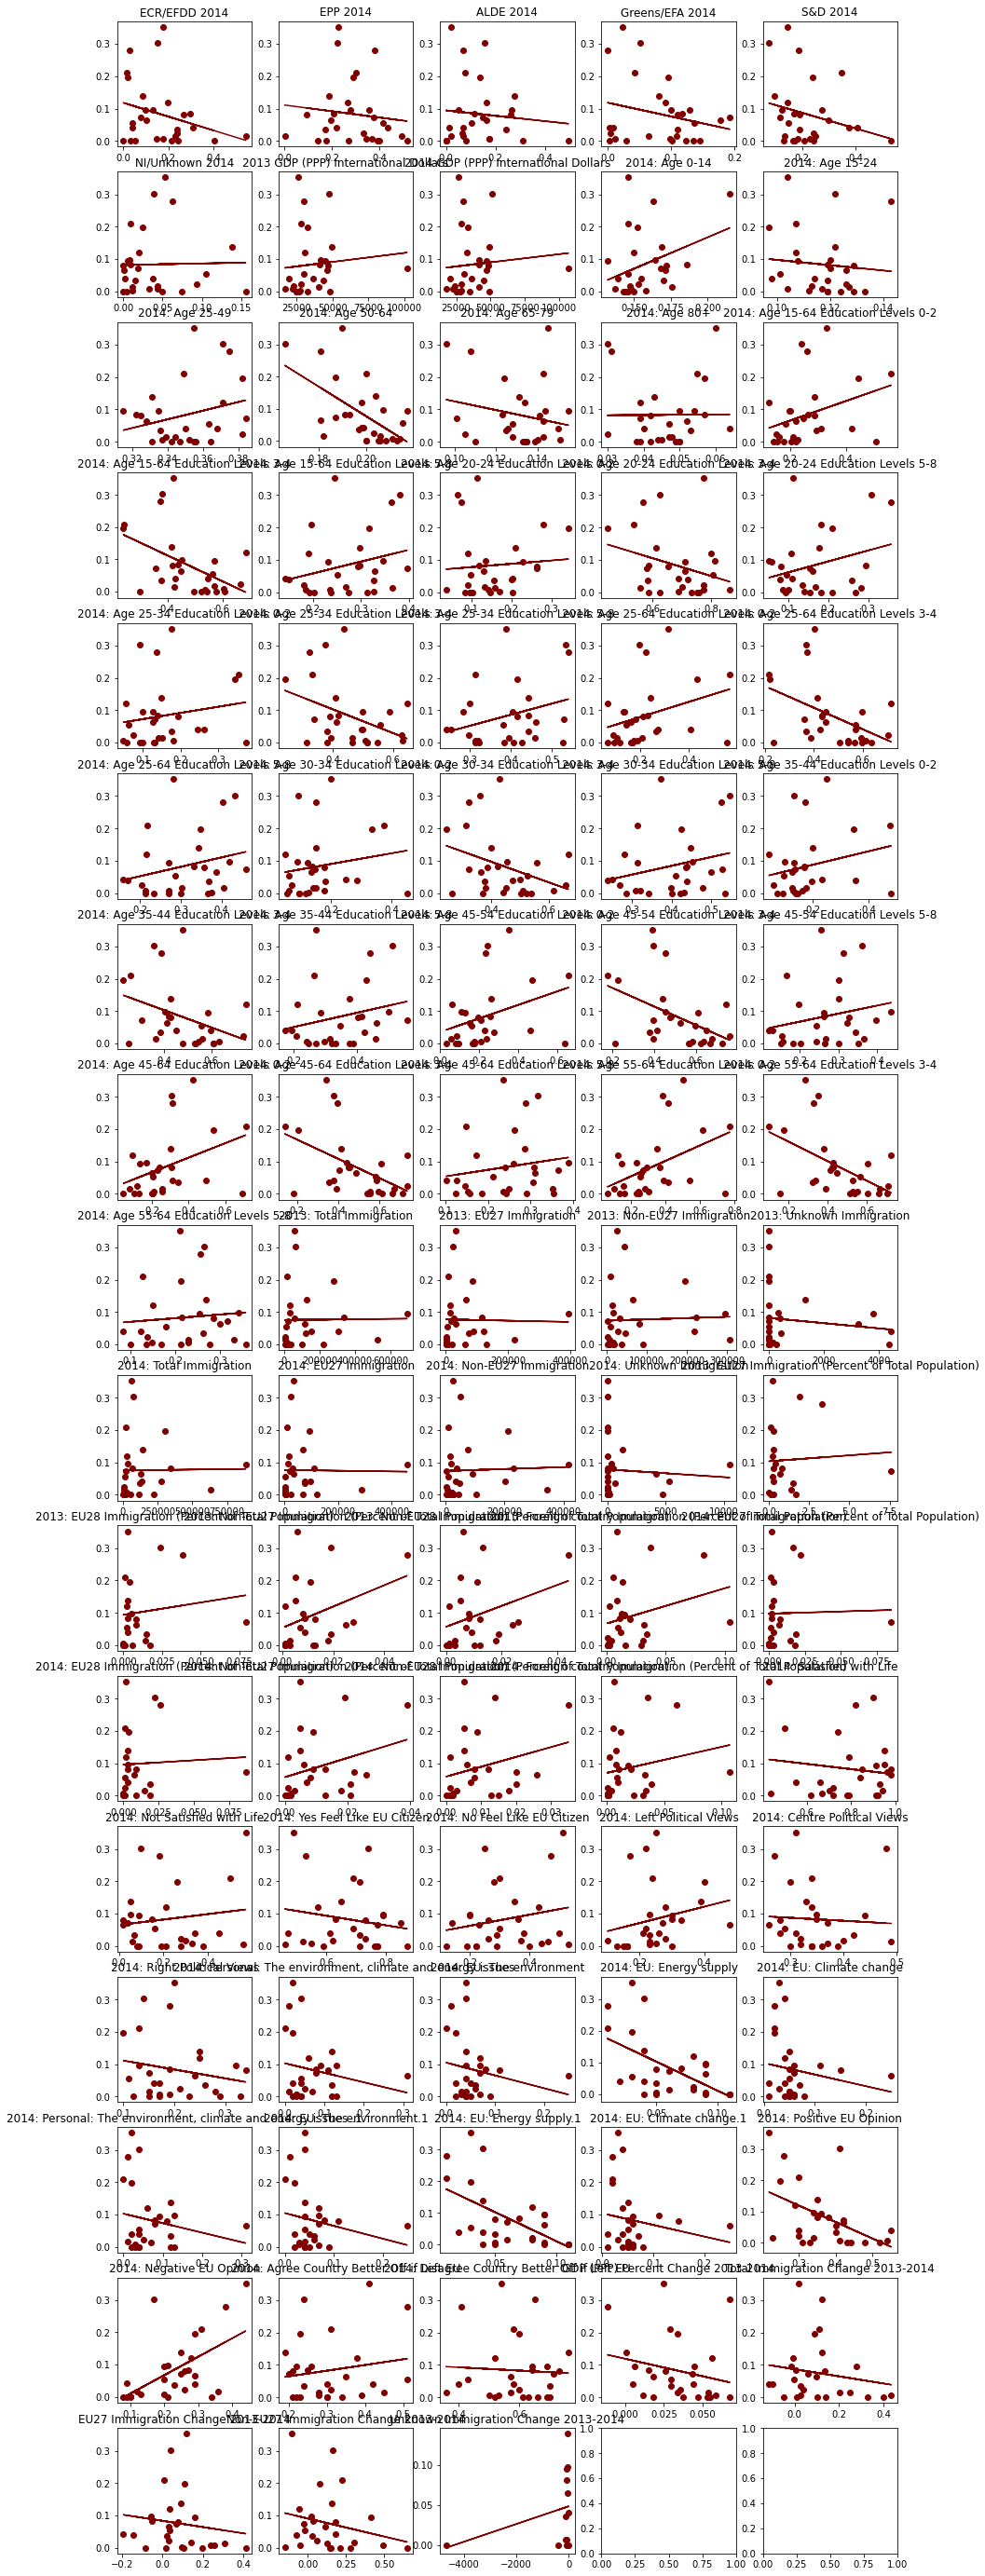

In [1697]:
Data2019Plots = Data2019.copy()

fig, axs = plt.subplots(17, 5, figsize=(15, 50))

x = 0
y = 0

for col in Data2019Plots.columns:
    if col == 'GUE/NGL 2019' or col == 'COUNTRY:' or col == 'CODE:':
        continue
    axs[x,y].scatter(Data2019Plots[col],Data2019Plots['GUE/NGL 2019'],color='maroon')
    if Data2019Plots[col].isnull().values.any():
        TempData2019Plots = Data2019Plots[['GUE/NGL 2019', col]]
        TempData2019Plots = TempData2019Plots.dropna()
        a, b = np.polyfit(TempData2019Plots[col], TempData2019Plots['GUE/NGL 2019'], 1)
        axs[x,y].plot(TempData2019Plots[col], a*TempData2019Plots[col]+b,color='maroon')  
    else:
        a, b = np.polyfit(Data2019Plots[col], Data2019Plots['GUE/NGL 2019'], 1)
        axs[x,y].plot(Data2019Plots[col], a*Data2019Plots[col]+b,color='maroon')  
    
    axs[x, y].set_title(col)
    y+=1
    if y > 4:
        y = 0
        x+=1

**All at Once**

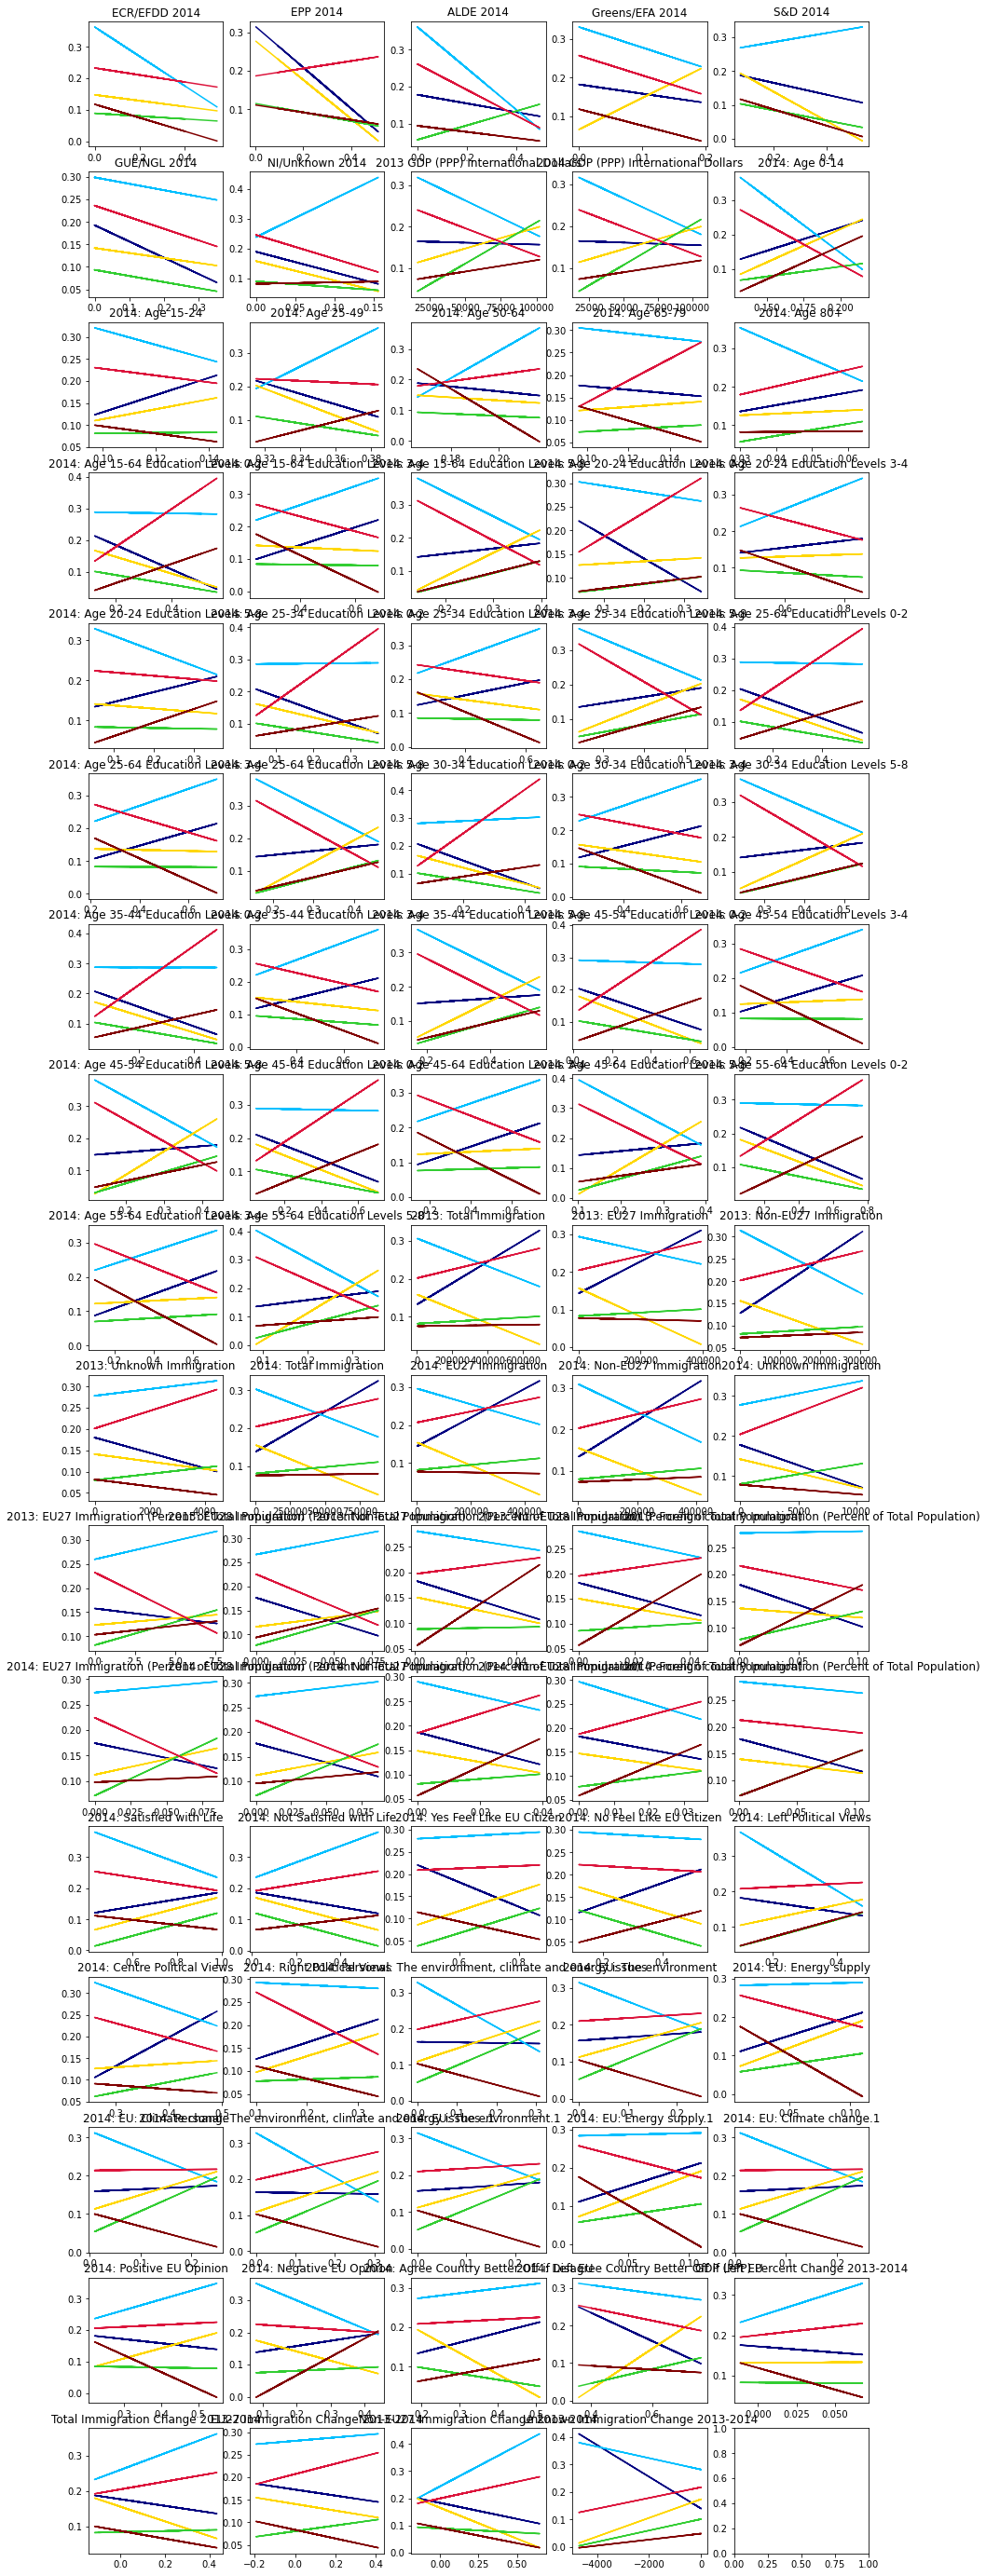

In [1698]:
Data2019Plots = Data2019.copy()

fig, axs = plt.subplots(17, 5, figsize=(15, 50))

x = 0
y = 0

for col in Data2019Plots.columns:
    if col == 'COUNTRY:' or col == 'CODE:':
        continue
    if col != 'ECR/ID 2019':
        if Data2019Plots[col].isnull().values.any():
            TempData2019Plots = Data2019Plots[['ECR/ID 2019', col]]
            TempData2019Plots = TempData2019Plots.dropna()
            a, b = np.polyfit(TempData2019Plots[col], TempData2019Plots['ECR/ID 2019'], 1)
            axs[x,y].plot(TempData2019Plots[col], a*TempData2019Plots[col]+b,color='navy')  
        else:
            a, b = np.polyfit(Data2019Plots[col], Data2019Plots['ECR/ID 2019'], 1)
            axs[x,y].plot(Data2019Plots[col], a*Data2019Plots[col]+b,color='navy') 
    if col != 'EPP 2019':
        if Data2019Plots[col].isnull().values.any():
            TempData2019Plots = Data2019Plots[['EPP 2019', col]]
            TempData2019Plots = TempData2019Plots.dropna()
            a, b = np.polyfit(TempData2019Plots[col], TempData2019Plots['EPP 2019'], 1)
            axs[x,y].plot(TempData2019Plots[col], a*TempData2019Plots[col]+b,color='deepskyblue')  
        else:
            a, b = np.polyfit(Data2019Plots[col], Data2019Plots['EPP 2019'], 1)
            axs[x,y].plot(Data2019Plots[col], a*Data2019Plots[col]+b,color='deepskyblue') 
    if col != 'RE 2019':
        if Data2019Plots[col].isnull().values.any():
            TempData2019Plots = Data2019Plots[['RE 2019', col]]
            TempData2019Plots = TempData2019Plots.dropna()
            a, b = np.polyfit(TempData2019Plots[col], TempData2019Plots['RE 2019'], 1)
            axs[x,y].plot(TempData2019Plots[col], a*TempData2019Plots[col]+b,color='gold')  
        else:
            a, b = np.polyfit(Data2019Plots[col], Data2019Plots['RE 2019'], 1)
            axs[x,y].plot(Data2019Plots[col], a*Data2019Plots[col]+b,color='gold') 
    if col != 'Greens/EFA 2019':
        if Data2019Plots[col].isnull().values.any():
            TempData2019Plots = Data2019Plots[['Greens/EFA 2019', col]]
            TempData2019Plots = TempData2019Plots.dropna()
            a, b = np.polyfit(TempData2019Plots[col], TempData2019Plots['Greens/EFA 2019'], 1)
            axs[x,y].plot(TempData2019Plots[col], a*TempData2019Plots[col]+b,color='limegreen')  
        else:
            a, b = np.polyfit(Data2019Plots[col], Data2019Plots['Greens/EFA 2019'], 1)
            axs[x,y].plot(Data2019Plots[col], a*Data2019Plots[col]+b,color='limegreen') 
    if col != 'S&D 2019':
        if Data2019Plots[col].isnull().values.any():
            TempData2019Plots = Data2019Plots[['S&D 2019', col]]
            TempData2019Plots = TempData2019Plots.dropna()
            a, b = np.polyfit(TempData2019Plots[col], TempData2019Plots['S&D 2019'], 1)
            axs[x,y].plot(TempData2019Plots[col], a*TempData2019Plots[col]+b,color='crimson')  
        else:
            a, b = np.polyfit(Data2019Plots[col], Data2019Plots['S&D 2019'], 1)
            axs[x,y].plot(Data2019Plots[col], a*Data2019Plots[col]+b,color='crimson') 
    if col != 'GUE/NGL 2019':
        if Data2019Plots[col].isnull().values.any():
            TempData2019Plots = Data2019Plots[['GUE/NGL 2019', col]]
            TempData2019Plots = TempData2019Plots.dropna()
            a, b = np.polyfit(TempData2019Plots[col], TempData2019Plots['GUE/NGL 2019'], 1)
            axs[x,y].plot(TempData2019Plots[col], a*TempData2019Plots[col]+b,color='maroon')  
        else:
            a, b = np.polyfit(Data2019Plots[col], Data2019Plots['GUE/NGL 2019'], 1)
            axs[x,y].plot(Data2019Plots[col], a*Data2019Plots[col]+b,color='maroon') 
    
    axs[x, y].set_title(col)
    y+=1
    if y > 4:
        y = 0
        x+=1

## Comparing 2014-2019

**ECR/EFDD & ECR/ID**

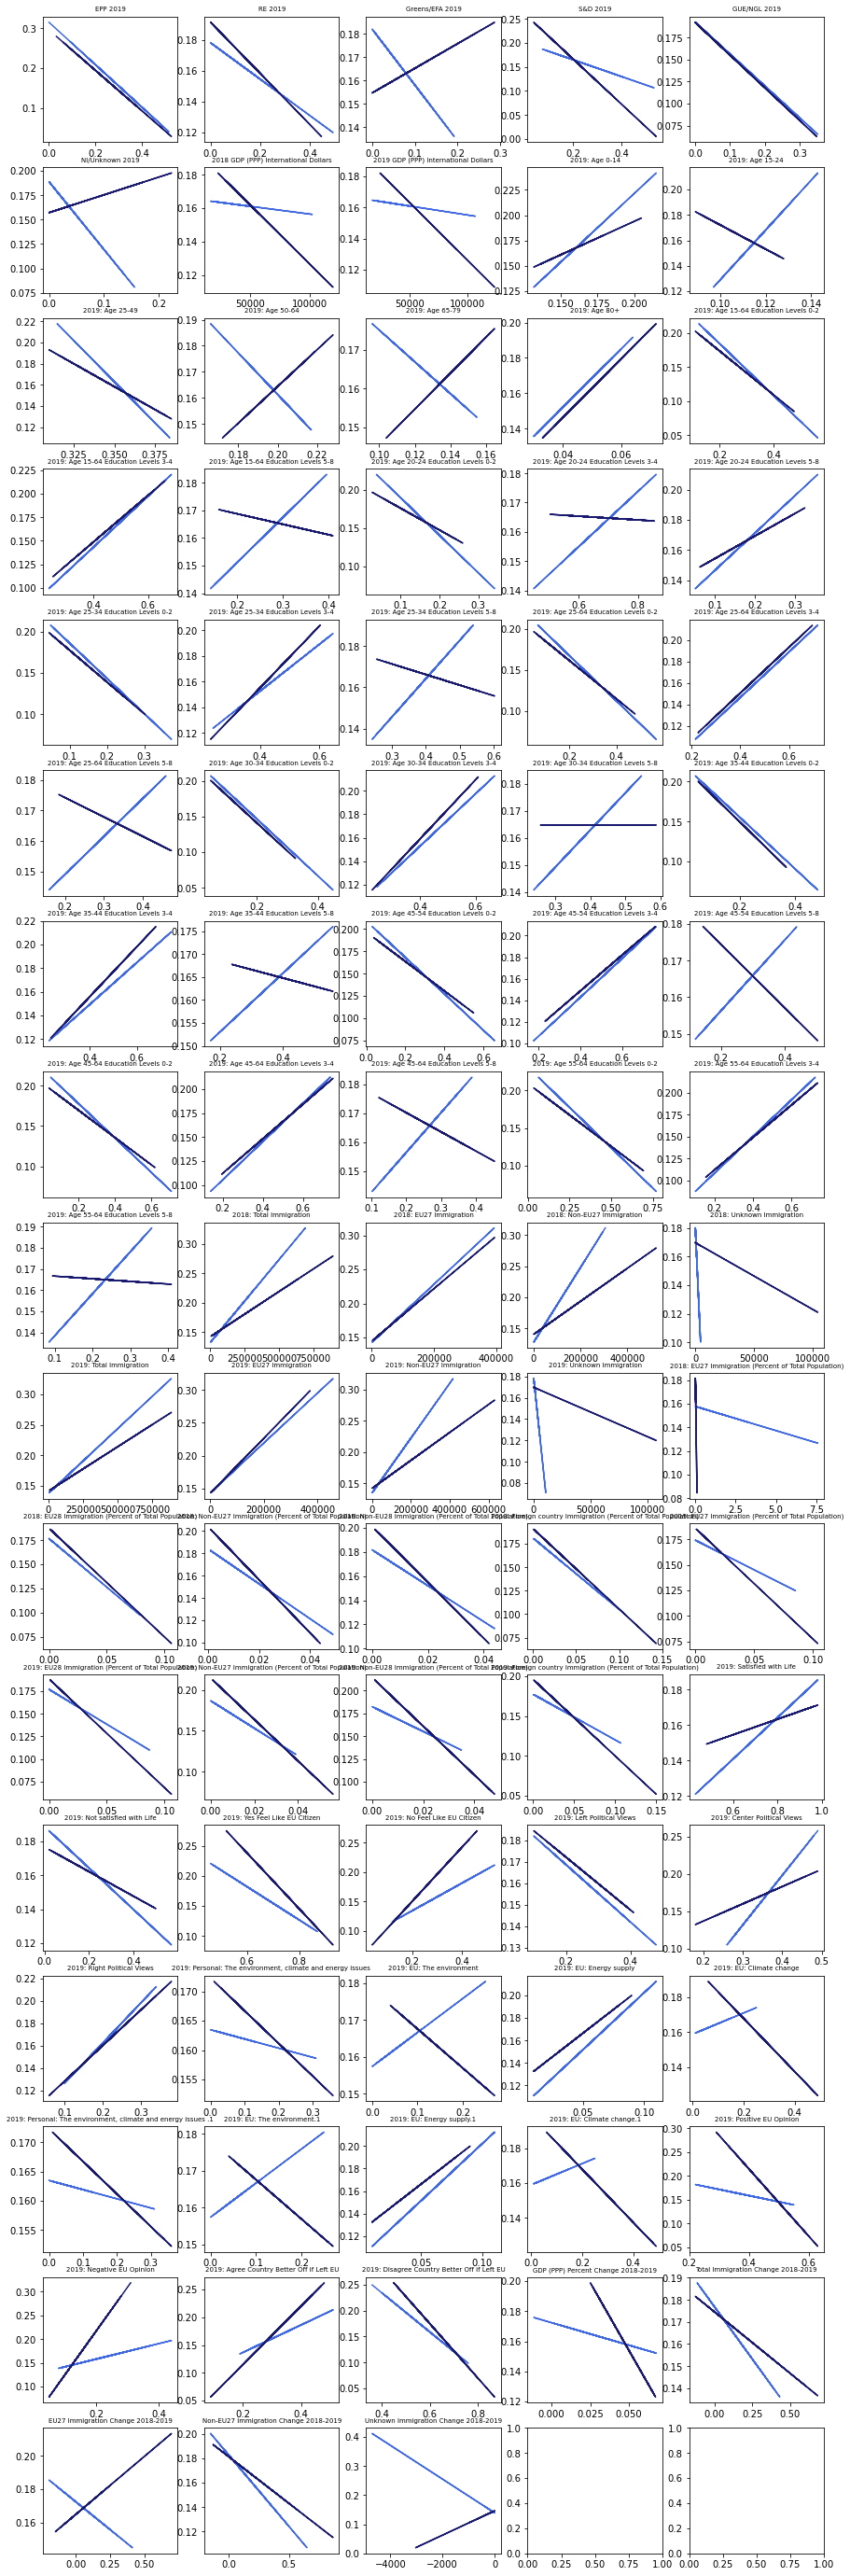

In [1721]:
Data2014Plots = Data2014.copy()

fig, axs = plt.subplots(17, 5, figsize=(15, 50))

x = 0
y = 0

for col in Data2014Plots.columns:
    if col == 'ECR/EFDD 2014' or col == 'COUNTRY:' or col == 'CODE:':
        continue
    #axs[x,y].scatter(Data2014Plots[col],Data2014Plots['ECR/EFDD 2014'],color='royalblue')
    if Data2014Plots[col].isnull().values.any():
        TempData2014Plots = Data2014Plots[['ECR/EFDD 2014', col]]
        TempData2014Plots = TempData2014Plots.dropna()
        a, b = np.polyfit(TempData2014Plots[col], TempData2014Plots['ECR/EFDD 2014'], 1)
        axs[x,y].plot(TempData2014Plots[col], a*TempData2014Plots[col]+b,color='royalblue')  
    else:
        a, b = np.polyfit(Data2014Plots[col], Data2014Plots['ECR/EFDD 2014'], 1)
        axs[x,y].plot(Data2014Plots[col], a*Data2014Plots[col]+b,color='royalblue')  
    
    axs[x, y].set_title(col)
    y+=1
    if y > 4:
        y = 0
        x+=1
        
Data2019Plots = Data2019.copy()


x = 0
y = 0

for col in Data2019Plots.columns:
    if col == 'ECR/ID 2019' or col == 'COUNTRY:' or col == 'CODE:':
        continue
    #axs[x,y].scatter(Data2019Plots[col],Data2019Plots['ECR/ID 2019'],color='midnightblue')
    if Data2019Plots[col].isnull().values.any():
        TempData2019Plots = Data2019Plots[['ECR/ID 2019', col]]
        TempData2019Plots = TempData2019Plots.dropna()
        a, b = np.polyfit(TempData2019Plots[col], TempData2019Plots['ECR/ID 2019'], 1)
        axs[x,y].plot(TempData2019Plots[col], a*TempData2019Plots[col]+b,color='midnightblue')  
    else:
        a, b = np.polyfit(Data2019Plots[col], Data2019Plots['ECR/ID 2019'], 1)
        axs[x,y].plot(Data2019Plots[col], a*Data2019Plots[col]+b,color='midnightblue')  
    
    axs[x, y].set_title(col,fontsize=7)
    y+=1
    if y > 4:
        y = 0
        x+=1

**EPP**

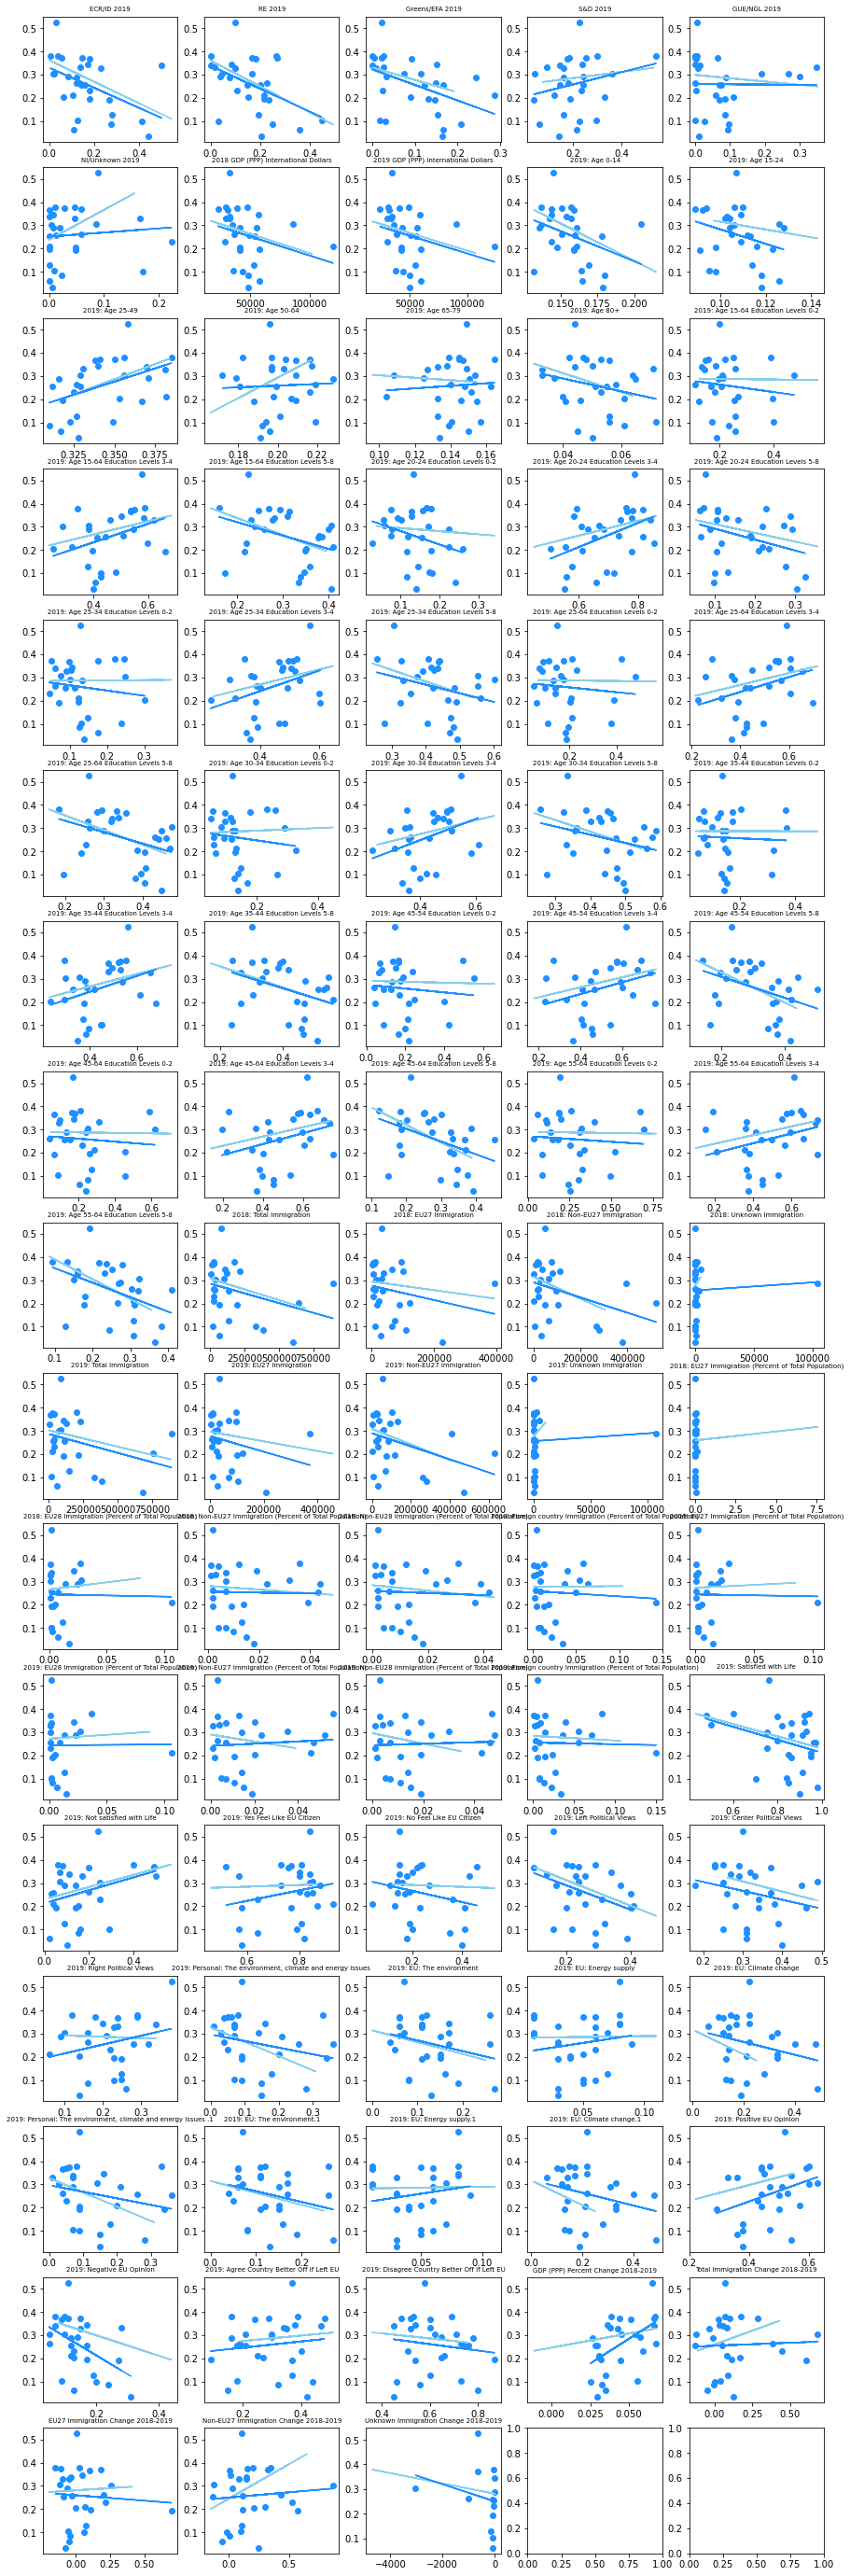

In [1722]:
Data2014Plots = Data2014.copy()

fig, axs = plt.subplots(17, 5, figsize=(15, 50))

x = 0
y = 0

for col in Data2014Plots.columns:
    if col == 'EPP 2014' or col == 'COUNTRY:' or col == 'CODE:':
        continue
    #axs[x,y].scatter(Data2014Plots[col],Data2014Plots['EPP 2014'],color='skyblue')
    if Data2014Plots[col].isnull().values.any():
        TempData2014Plots = Data2014Plots[['EPP 2014', col]]
        TempData2014Plots = TempData2014Plots.dropna()
        a, b = np.polyfit(TempData2014Plots[col], TempData2014Plots['EPP 2014'], 1)
        axs[x,y].plot(TempData2014Plots[col], a*TempData2014Plots[col]+b,color='skyblue')  
    else:
        a, b = np.polyfit(Data2014Plots[col], Data2014Plots['EPP 2014'], 1)
        axs[x,y].plot(Data2014Plots[col], a*Data2014Plots[col]+b,color='skyblue')  
    
    axs[x, y].set_title(col)
    y+=1
    if y > 4:
        y = 0
        x+=1

Data2019Plots = Data2019.copy()

x = 0
y = 0

for col in Data2019Plots.columns:
    if col == 'EPP 2019' or col == 'COUNTRY:' or col == 'CODE:':
        continue
    axs[x,y].scatter(Data2019Plots[col],Data2019Plots['EPP 2019'],color='dodgerblue')
    if Data2019Plots[col].isnull().values.any():
        TempData2019Plots = Data2019Plots[['EPP 2019', col]]
        TempData2019Plots = TempData2019Plots.dropna()
        a, b = np.polyfit(TempData2019Plots[col], TempData2019Plots['EPP 2019'], 1)
        axs[x,y].plot(TempData2019Plots[col], a*TempData2019Plots[col]+b,color='dodgerblue')  
    else:
        a, b = np.polyfit(Data2019Plots[col], Data2019Plots['EPP 2019'], 1)
        axs[x,y].plot(Data2019Plots[col], a*Data2019Plots[col]+b,color='dodgerblue')  
    
    axs[x, y].set_title(col,fontsize=7)
    y+=1
    if y > 4:
        y = 0
        x+=1

**ALDE & RE**

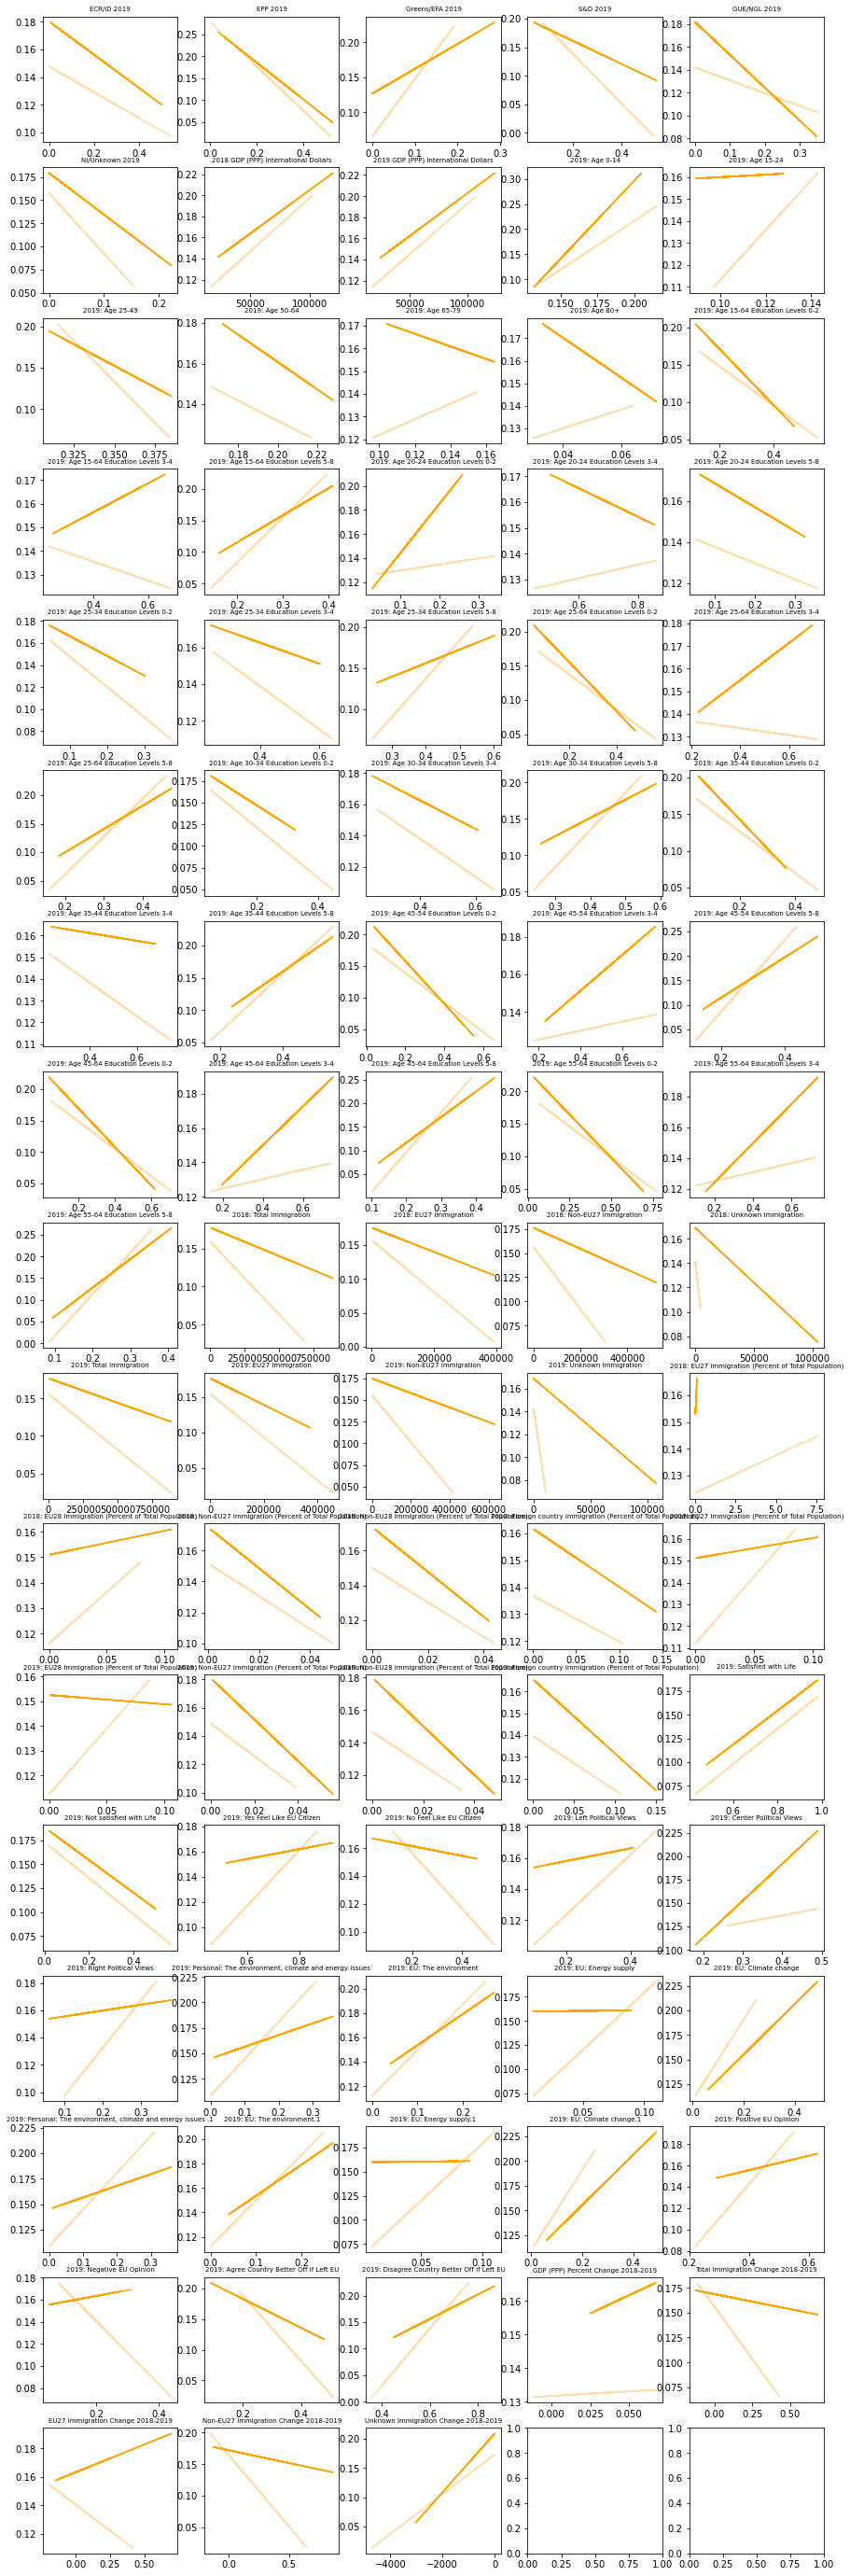

In [1719]:
Data2014Plots = Data2014.copy()

fig, axs = plt.subplots(17, 5, figsize=(15, 50))

x = 0
y = 0

for col in Data2014Plots.columns:
    if col == 'ALDE 2014' or col == 'COUNTRY:' or col == 'CODE:':
        continue
    #axs[x,y].scatter(Data2014Plots[col],Data2014Plots['ALDE 2014'],color='navajowhite')
    if Data2014Plots[col].isnull().values.any():
        TempData2014Plots = Data2014Plots[['ALDE 2014', col]]
        TempData2014Plots = TempData2014Plots.dropna()
        a, b = np.polyfit(TempData2014Plots[col], TempData2014Plots['ALDE 2014'], 1)
        axs[x,y].plot(TempData2014Plots[col], a*TempData2014Plots[col]+b,color='navajowhite')  
    else:
        a, b = np.polyfit(Data2014Plots[col], Data2014Plots['ALDE 2014'], 1)
        axs[x,y].plot(Data2014Plots[col], a*Data2014Plots[col]+b,color='navajowhite')  
    
    axs[x, y].set_title(col)
    y+=1
    if y > 4:
        y = 0
        x+=1

Data2019Plots = Data2019.copy()

x = 0
y = 0

for col in Data2019Plots.columns:
    if col == 'RE 2019' or col == 'COUNTRY:' or col == 'CODE:':
        continue
    #axs[x,y].scatter(Data2019Plots[col],Data2019Plots['RE 2019'],color='orange')
    if Data2019Plots[col].isnull().values.any():
        TempData2019Plots = Data2019Plots[['RE 2019', col]]
        TempData2019Plots = TempData2019Plots.dropna()
        a, b = np.polyfit(TempData2019Plots[col], TempData2019Plots['RE 2019'], 1)
        axs[x,y].plot(TempData2019Plots[col], a*TempData2019Plots[col]+b,color='orange')  
    else:
        a, b = np.polyfit(Data2019Plots[col], Data2019Plots['RE 2019'], 1)
        axs[x,y].plot(Data2019Plots[col], a*Data2019Plots[col]+b,color='orange')  
    
    axs[x, y].set_title(col,fontsize=7)
    y+=1
    if y > 4:
        y = 0
        x+=1        

**Greens/EFA**

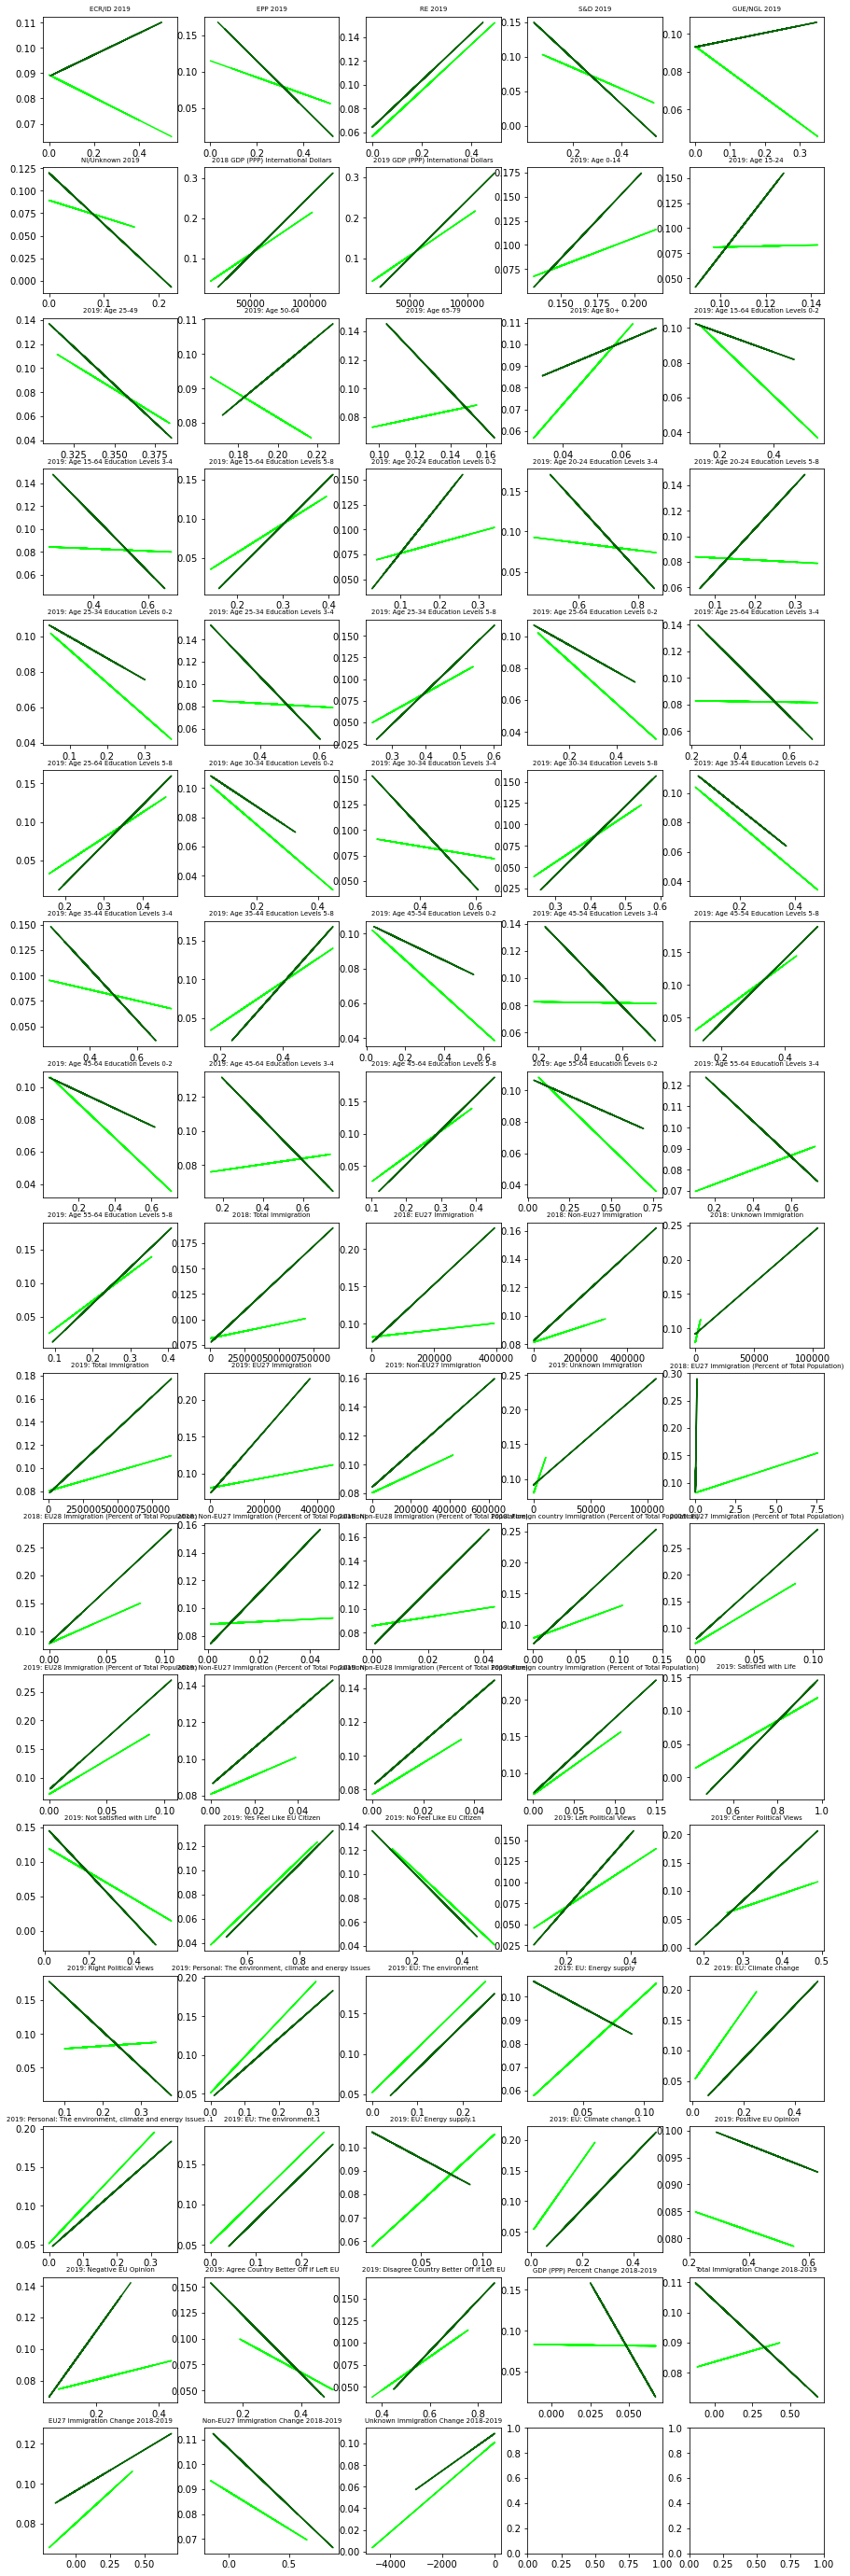

In [1757]:
Data2014Plots = Data2014.copy()

fig, axs = plt.subplots(17, 5, figsize=(15, 50))

x = 0
y = 0

for col in Data2014Plots.columns:
    if col == 'Greens/EFA 2014' or col == 'COUNTRY:' or col == 'CODE:':
        continue
    #axs[x,y].scatter(Data2014Plots[col],Data2014Plots['Greens/EFA 2014'],color='lime')
    if Data2014Plots[col].isnull().values.any():
        TempData2014Plots = Data2014Plots[['Greens/EFA 2014', col]]
        TempData2014Plots = TempData2014Plots.dropna()
        a, b = np.polyfit(TempData2014Plots[col], TempData2014Plots['Greens/EFA 2014'], 1)
        axs[x,y].plot(TempData2014Plots[col], a*TempData2014Plots[col]+b,color='lime')  
    else:
        a, b = np.polyfit(Data2014Plots[col], Data2014Plots['Greens/EFA 2014'], 1)
        axs[x,y].plot(Data2014Plots[col], a*Data2014Plots[col]+b,color='lime')  
    
    axs[x, y].set_title(col)
    y+=1
    if y > 4:
        y = 0
        x+=1
        
Data2019Plots = Data2019.copy()

x = 0
y = 0

for col in Data2019Plots.columns:
    if col == 'Greens/EFA 2019' or col == 'COUNTRY:' or col == 'CODE:':
        continue
    #axs[x,y].scatter(Data2019Plots[col],Data2019Plots['Greens/EFA 2019'],color='darkgreen')
    if Data2019Plots[col].isnull().values.any():
        TempData2019Plots = Data2019Plots[['Greens/EFA 2019', col]]
        TempData2019Plots = TempData2019Plots.dropna()
        a, b = np.polyfit(TempData2019Plots[col], TempData2019Plots['Greens/EFA 2019'], 1)
        axs[x,y].plot(TempData2019Plots[col], a*TempData2019Plots[col]+b,color='darkgreen')  
    else:
        a, b = np.polyfit(Data2019Plots[col], Data2019Plots['Greens/EFA 2019'], 1)
        axs[x,y].plot(Data2019Plots[col], a*Data2019Plots[col]+b,color='darkgreen')  
    
    axs[x, y].set_title(col,fontsize=7)
    y+=1
    if y > 4:
        y = 0
        x+=1

**S&D**

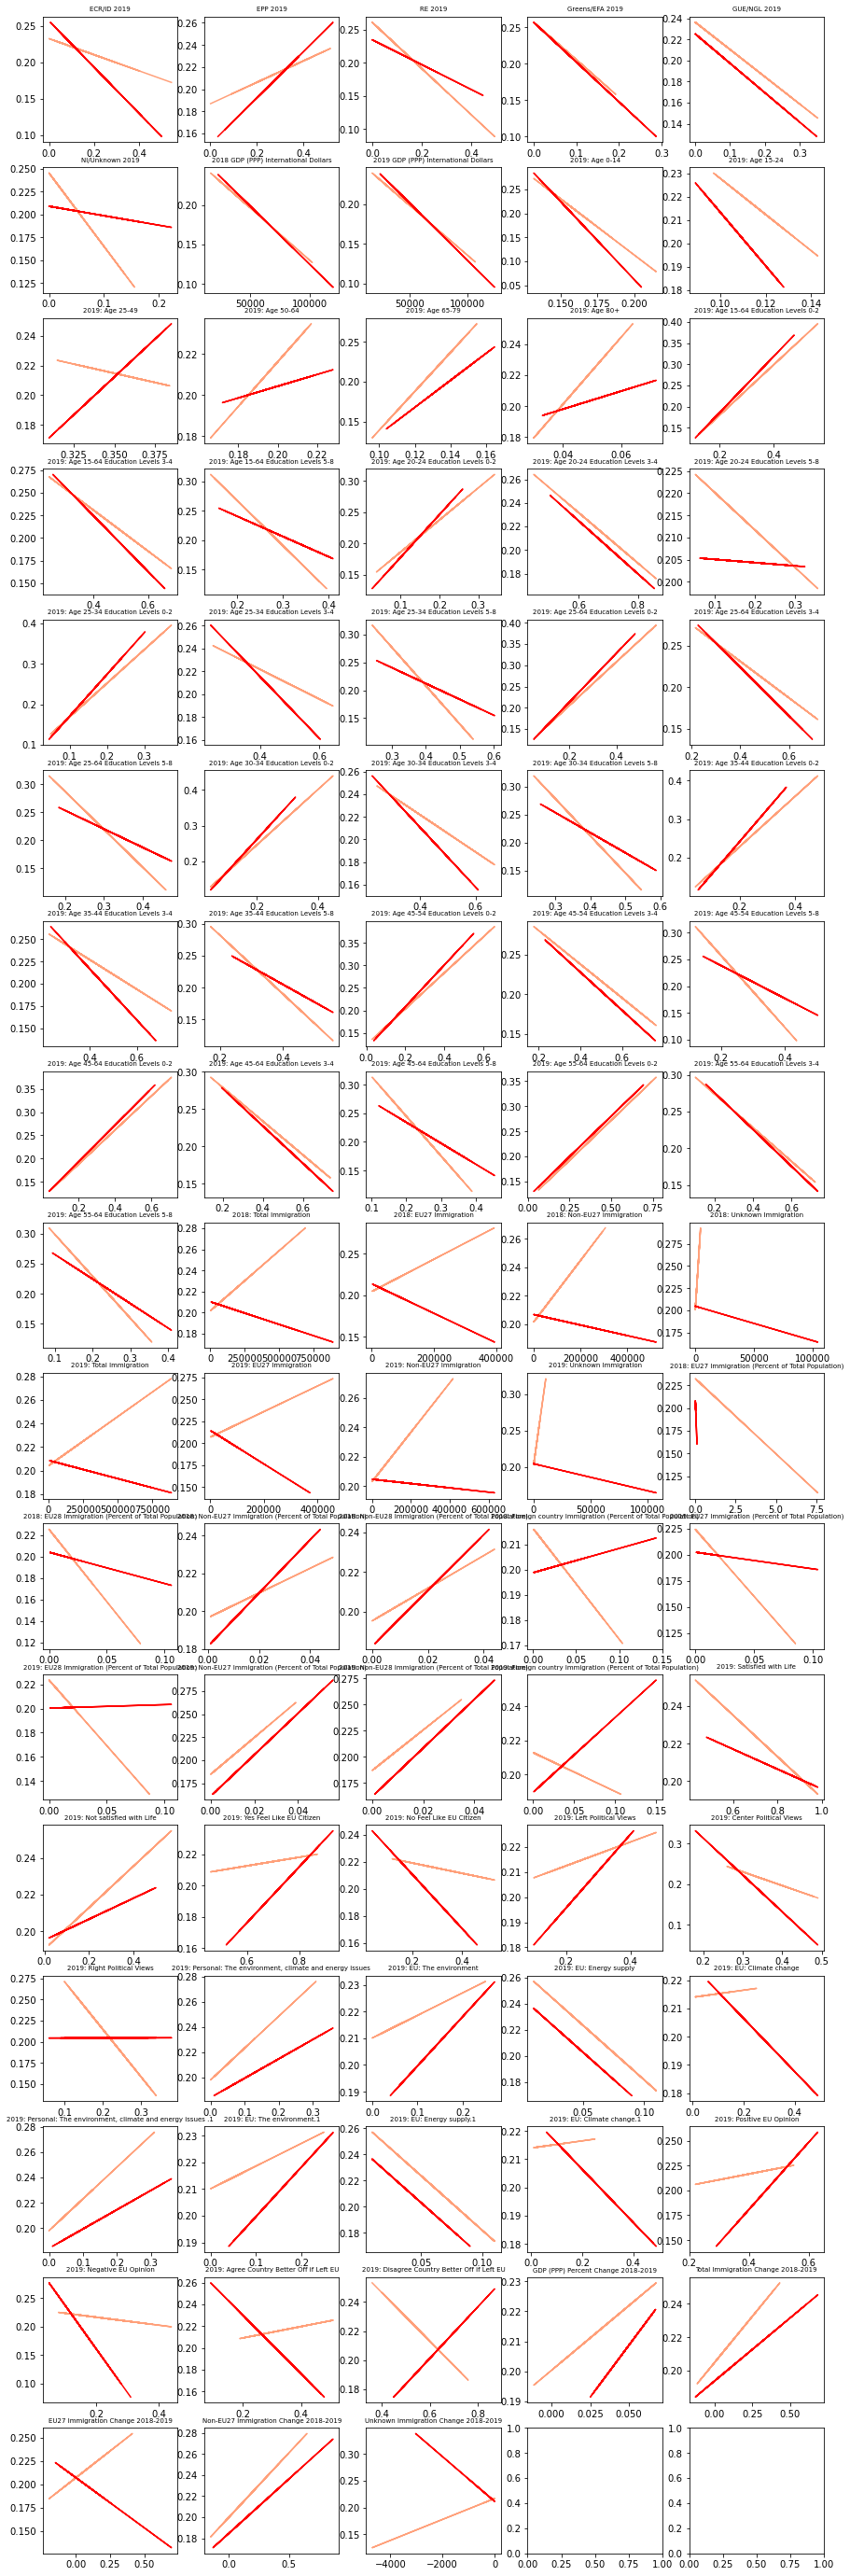

In [1758]:
Data2014Plots = Data2014.copy()

fig, axs = plt.subplots(17, 5, figsize=(15, 50))

x = 0
y = 0

for col in Data2014Plots.columns:
    if col == 'S&D 2014' or col == 'COUNTRY:' or col == 'CODE:':
        continue
    #axs[x,y].scatter(Data2014Plots[col],Data2014Plots['S&D 2014'],color='lightsalmon')
    if Data2014Plots[col].isnull().values.any():
        TempData2014Plots = Data2014Plots[['S&D 2014', col]]
        TempData2014Plots = TempData2014Plots.dropna()
        a, b = np.polyfit(TempData2014Plots[col], TempData2014Plots['S&D 2014'], 1)
        axs[x,y].plot(TempData2014Plots[col], a*TempData2014Plots[col]+b,color='lightsalmon')  
    else:
        a, b = np.polyfit(Data2014Plots[col], Data2014Plots['S&D 2014'], 1)
        axs[x,y].plot(Data2014Plots[col], a*Data2014Plots[col]+b,color='lightsalmon')  
    
    axs[x, y].set_title(col)
    y+=1
    if y > 4:
        y = 0
        x+=1
        
Data2019Plots = Data2019.copy()

x = 0
y = 0

for col in Data2019Plots.columns:
    if col == 'S&D 2019' or col == 'COUNTRY:' or col == 'CODE:':
        continue
    #axs[x,y].scatter(Data2019Plots[col],Data2019Plots['S&D 2019'],color='red')
    if Data2019Plots[col].isnull().values.any():
        TempData2019Plots = Data2019Plots[['S&D 2019', col]]
        TempData2019Plots = TempData2019Plots.dropna()
        a, b = np.polyfit(TempData2019Plots[col], TempData2019Plots['S&D 2019'], 1)
        axs[x,y].plot(TempData2019Plots[col], a*TempData2019Plots[col]+b,color='red')  
    else:
        a, b = np.polyfit(Data2019Plots[col], Data2019Plots['S&D 2019'], 1)
        axs[x,y].plot(Data2019Plots[col], a*Data2019Plots[col]+b,color='red')  
    
    axs[x, y].set_title(col,fontsize=7)
    y+=1
    if y > 4:
        y = 0
        x+=1

**GUE/NGL**

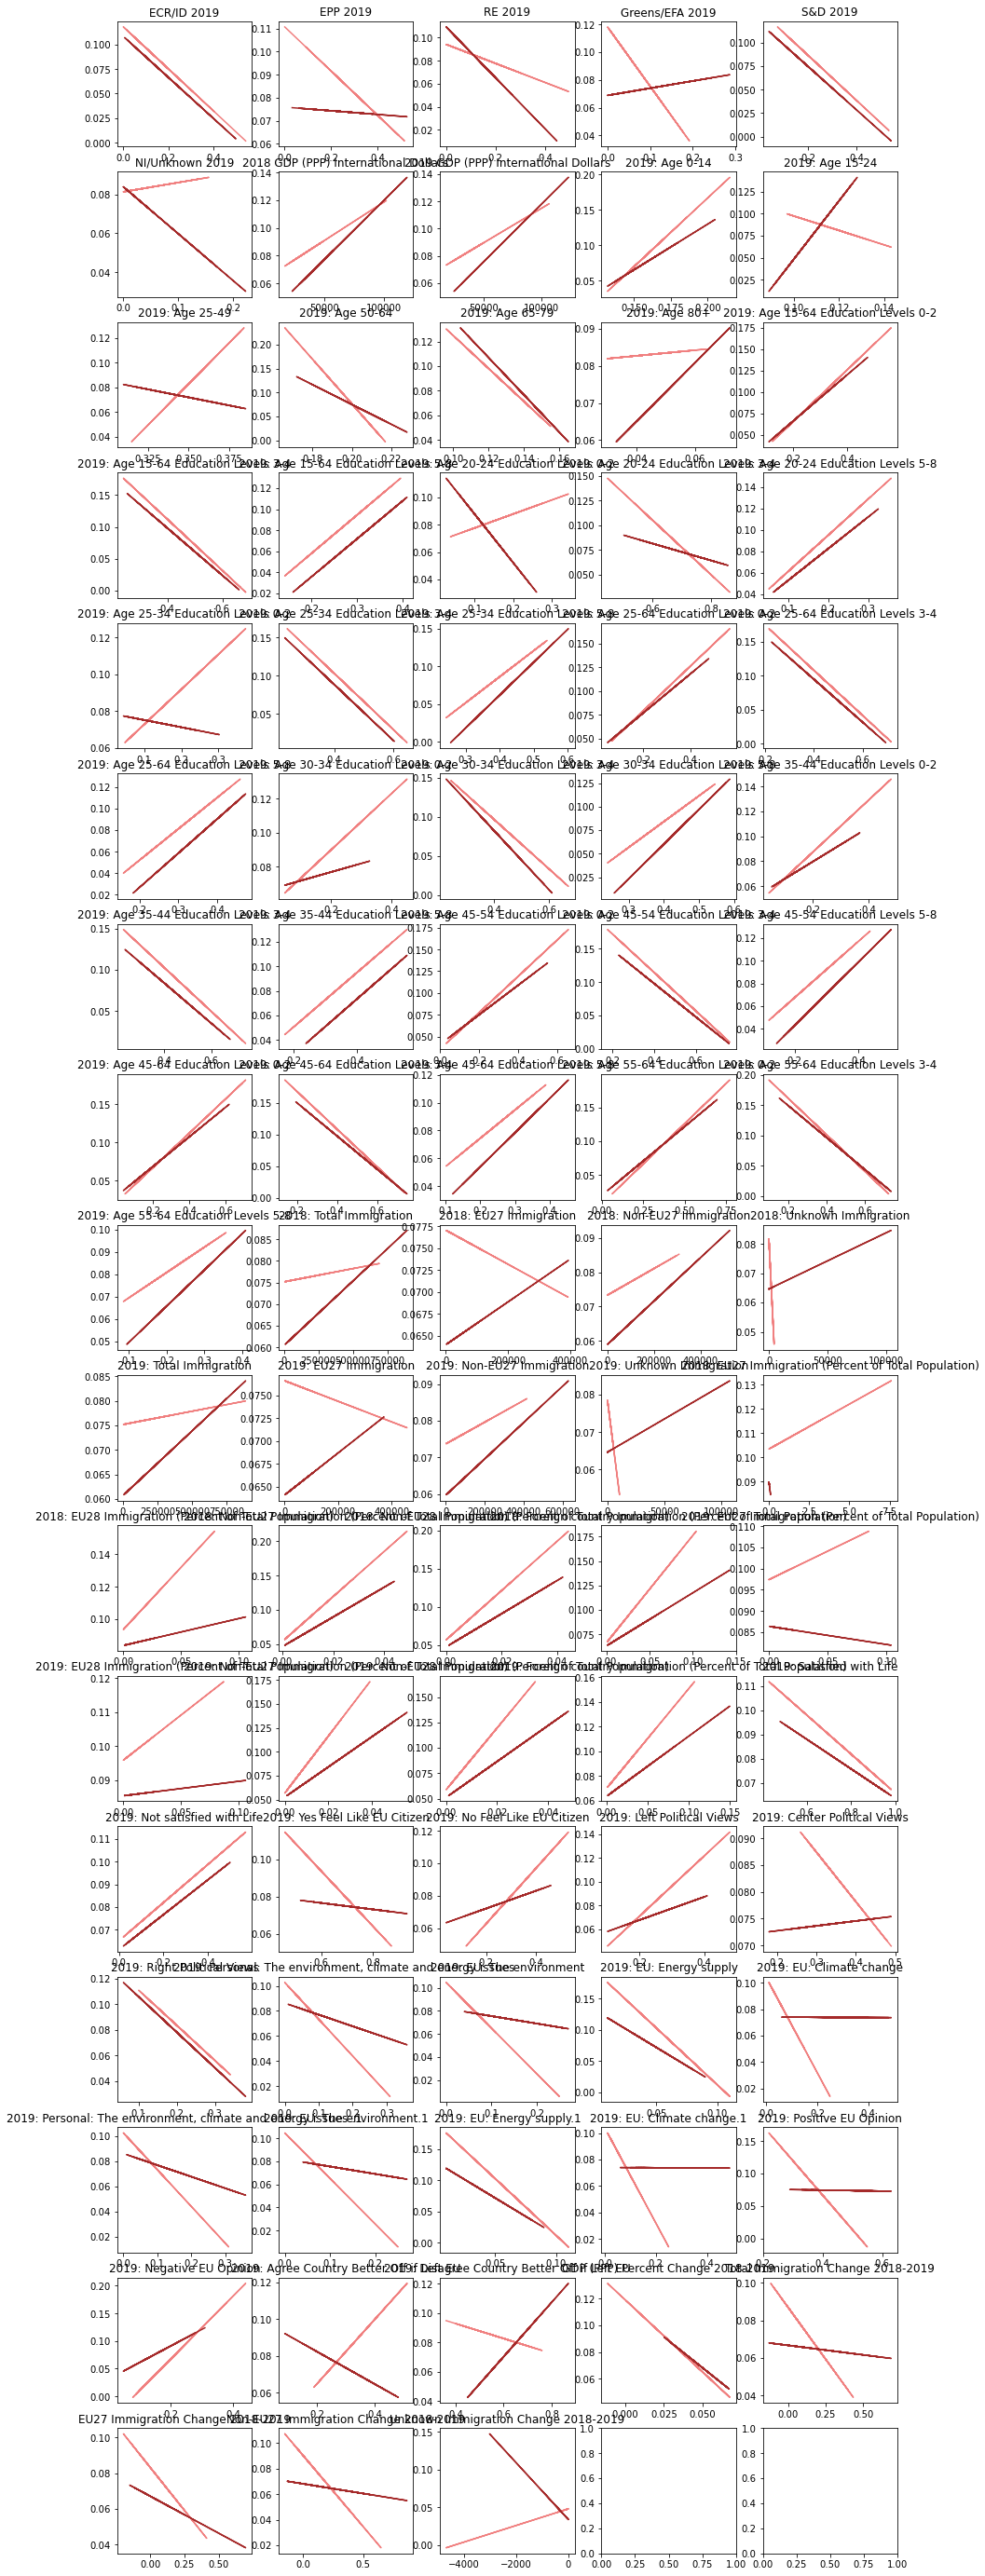

In [1709]:
Data2014Plots = Data2014.copy()

fig, axs = plt.subplots(17, 5, figsize=(15, 50))

x = 0
y = 0

for col in Data2014Plots.columns:
    if col == 'GUE/NGL 2014' or col == 'COUNTRY:' or col == 'CODE:':
        continue
    #axs[x,y].scatter(Data2014Plots[col],Data2014Plots['GUE/NGL 2014'],color='lightcoral')
    if Data2014Plots[col].isnull().values.any():
        TempData2014Plots = Data2014Plots[['GUE/NGL 2014', col]]
        TempData2014Plots = TempData2014Plots.dropna()
        a, b = np.polyfit(TempData2014Plots[col], TempData2014Plots['GUE/NGL 2014'], 1)
        axs[x,y].plot(TempData2014Plots[col], a*TempData2014Plots[col]+b,color='lightcoral')  
    else:
        a, b = np.polyfit(Data2014Plots[col], Data2014Plots['GUE/NGL 2014'], 1)
        axs[x,y].plot(Data2014Plots[col], a*Data2014Plots[col]+b,color='lightcoral')  
    
    axs[x, y].set_title(col)
    y+=1
    if y > 4:
        y = 0
        x+=1

Data2019Plots = Data2019.copy()

x = 0
y = 0

for col in Data2019Plots.columns:
    if col == 'GUE/NGL 2019' or col == 'COUNTRY:' or col == 'CODE:':
        continue
    #axs[x,y].scatter(Data2019Plots[col],Data2019Plots['GUE/NGL 2019'],color='brown')
    if Data2019Plots[col].isnull().values.any():
        TempData2019Plots = Data2019Plots[['GUE/NGL 2019', col]]
        TempData2019Plots = TempData2019Plots.dropna()
        a, b = np.polyfit(TempData2019Plots[col], TempData2019Plots['GUE/NGL 2019'], 1)
        axs[x,y].plot(TempData2019Plots[col], a*TempData2019Plots[col]+b,color='brown')  
    else:
        a, b = np.polyfit(Data2019Plots[col], Data2019Plots['GUE/NGL 2019'], 1)
        axs[x,y].plot(Data2019Plots[col], a*Data2019Plots[col]+b,color='brown')  
    
    axs[x, y].set_title(col)
    y+=1
    if y > 4:
        y = 0
        x+=1